# Titanic Competition

## 1. Goal description

**Goal**:

* Build model, to classify if titanic's passenger would survive / not survive
* Undestand relation between passenger features and survival status
* Compare different classification models and find one with best performance vs. complication ration

**Evaluation**:

* Supervised machine learning model will be used

* **Models**:
    * Naive Bayes classifier
    * K-nearest neighbors
    * Logistic regression
    * Linear discriminant analysis
    * Quadratic discriminant analysis
    * Decision tree
    * Random forest

* **Metrics**:
    * Precision
    * Recall
    * F1-metric
    * ROC-AUC 
    * Training time
    * Testing time
    * Accuracy

* **Technics**:
    * Forward selection
    * Cross validation
    * Grid search

## 2. Data collection

**Data**:

* Publicy available dataset from Kaggle competition
* Already divided into train and test set
* Contains information about passengers and their survival status
* Number of train observations: $891$
* Number of train columns: $12$
* Dependent variable: `Survived`

**Features**:

* `PassengerId`
* `Survival`
* `Pclass` - ticket class
* `Name`
* `Sex`
* `Age` - in years	
* `SibSp` - number of siblings / spouses aboard the Titanic	
* `Parch`	- number of parents / children aboard the Titanic	
* `Ticket` - ticket number	
* `Fare`
* `Cabin` - cabin number
* `Embarked` - port of embarkation

**Source**: https://www.kaggle.com/c/titanic/overview

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
train = pd.read_csv("data/train.csv")

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

## 3. Data review

### 3.1 General analysis

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.select_dtypes(["int64", "float64"]).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.select_dtypes(["object"]).describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [9]:
train.select_dtypes(["int64", "float64"]).agg(["skew", "kurtosis"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
skew,0.0,0.478523,-0.630548,0.389108,3.695352,2.749117,4.787317
kurtosis,-1.2,-1.775005,-1.280015,0.178274,17.880420,9.778125,33.398141


In [10]:
for col in train.columns:
    print(f"Columns: {col}\n{train[col].value_counts()}\n")

Columns: PassengerId
PassengerId
1      1
2      1
3      1
4      1
5      1
      ..
887    1
888    1
889    1
890    1
891    1
Name: count, Length: 891, dtype: int64

Columns: Survived
Survived
0    549
1    342
Name: count, dtype: int64

Columns: Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Columns: Name
Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
                                                      ..
Montvila, Rev. Juozas                                  1
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    1
Name: count, Length: 891, dtype: 

In [11]:
for col in train.columns:
    print(f"Columns: {col}\nUnique values: {len(train[col].unique())}\n")

Columns: PassengerId
Unique values: 891

Columns: Survived
Unique values: 2

Columns: Pclass
Unique values: 3

Columns: Name
Unique values: 891

Columns: Sex
Unique values: 2

Columns: Age
Unique values: 89

Columns: SibSp
Unique values: 7

Columns: Parch
Unique values: 7

Columns: Ticket
Unique values: 681

Columns: Fare
Unique values: 248

Columns: Cabin
Unique values: 148

Columns: Embarked
Unique values: 4



In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 3.2 Visual analysis

#### 3.2.1 Survived analysis

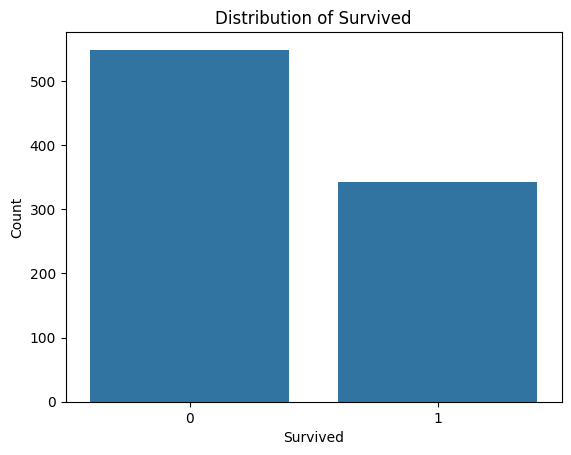

In [13]:
survived = train["Survived"].value_counts()

sns.barplot(
    x=survived.index,
    y=survived.values
)
plt.title("Distribution of Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

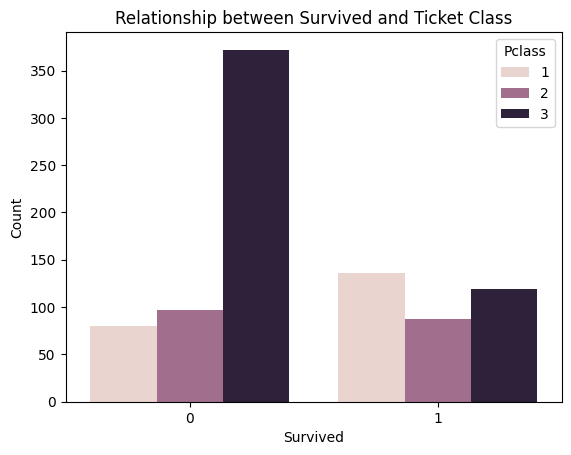

In [14]:
sns.countplot(
    data=train,
    x="Survived",
    hue="Pclass"
)
plt.title("Relationship between Survived and Ticket Class")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

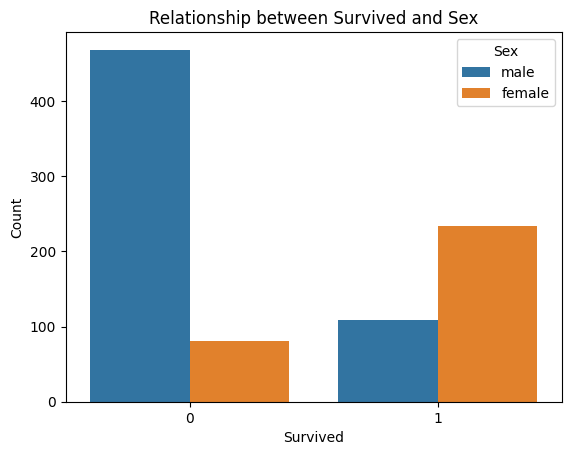

In [15]:
sns.countplot(
    data=train,
    x="Survived",
    hue="Sex"
)
plt.title("Relationship between Survived and Sex")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

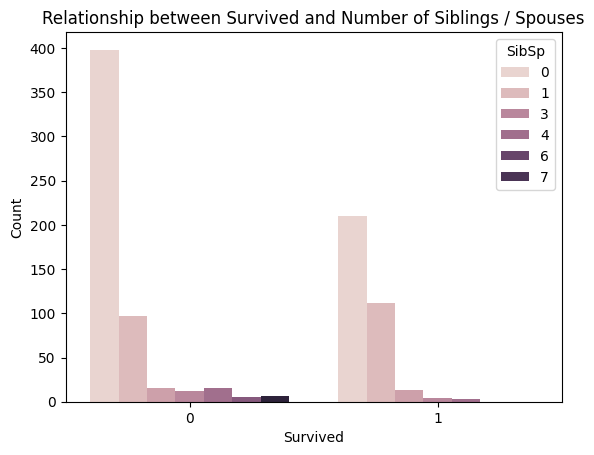

In [16]:
sns.countplot(
    data=train,
    x="Survived",
    hue="SibSp"
)
plt.title("Relationship between Survived and Number of Siblings / Spouses")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

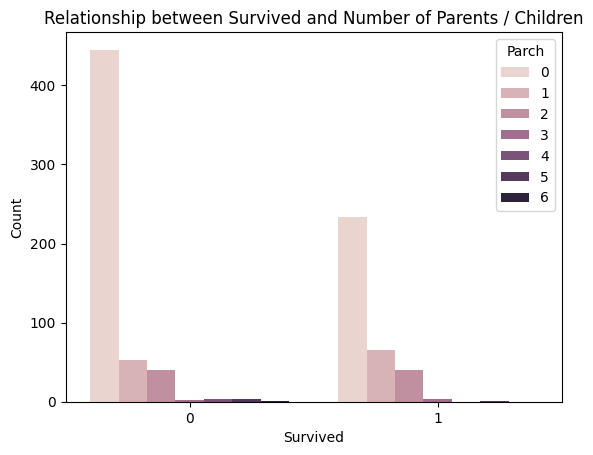

In [17]:
sns.countplot(
    data=train,
    x="Survived",
    hue="Parch"
)
plt.title("Relationship between Survived and Number of Parents / Children")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

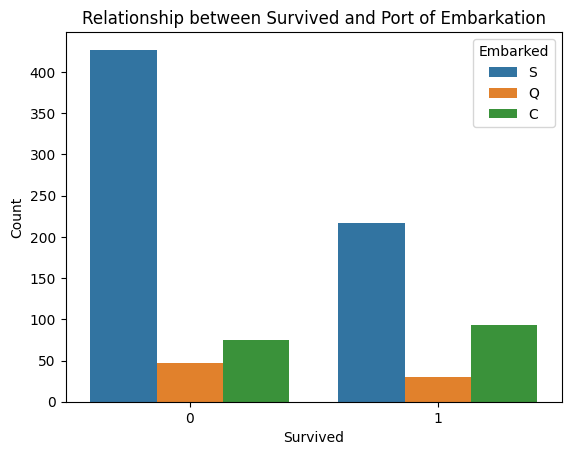

In [18]:
sns.countplot(
    data=train,
    x="Survived",
    hue="Embarked"
)
plt.title("Relationship between Survived and Port of Embarkation")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

#### 3.2.2 Ticket class analysis

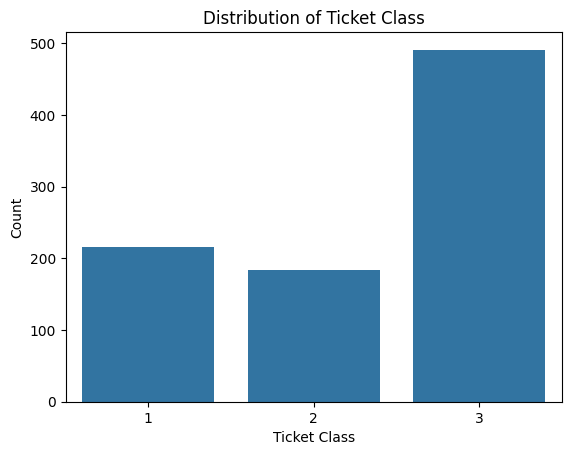

In [19]:
pclass = train["Pclass"].value_counts()

sns.barplot(
    x=pclass.index,
    y=pclass.values
)
plt.title("Distribution of Ticket Class")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

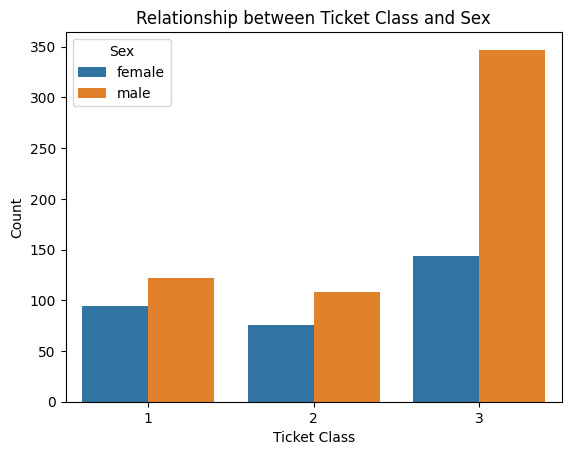

In [20]:
sns.countplot(
    data=train,
    x="Pclass",
    hue="Sex"
)
plt.title("Relationship between Ticket Class and Sex")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

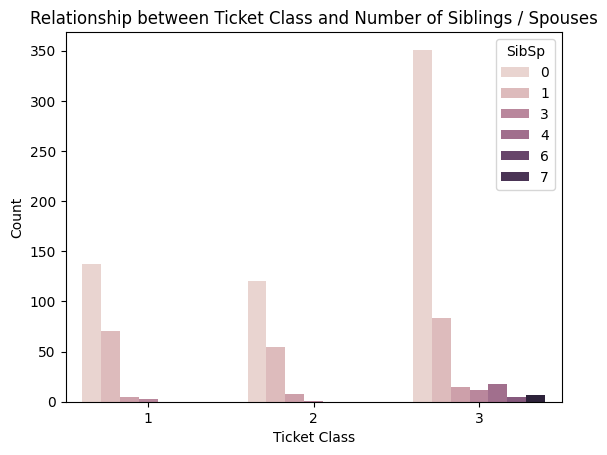

In [21]:
sns.countplot(
    data=train,
    x="Pclass",
    hue="SibSp"
)
plt.title("Relationship between Ticket Class and Number of Siblings / Spouses")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

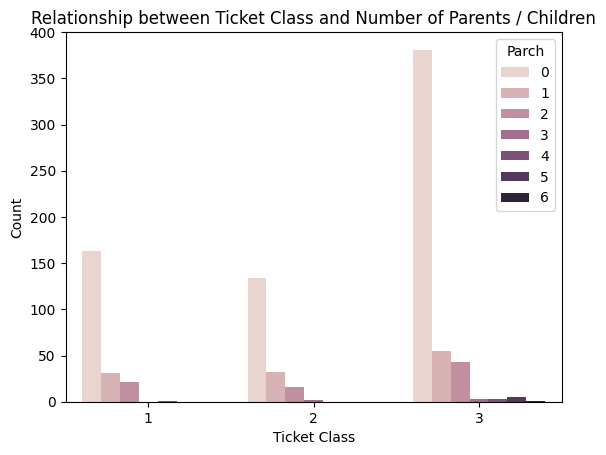

In [22]:
sns.countplot(
    data=train,
    x="Pclass",
    hue="Parch"
)
plt.title("Relationship between Ticket Class and Number of Parents / Children")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

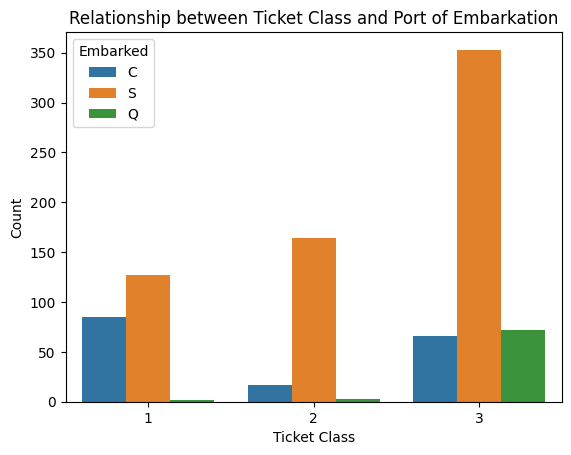

In [23]:
sns.countplot(
    data=train,
    x="Pclass",
    hue="Embarked"
)
plt.title("Relationship between Ticket Class and Port of Embarkation")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

#### 3.2.3 Sex analysis

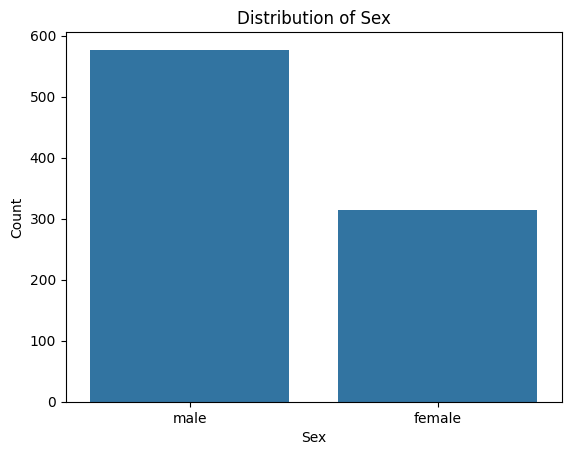

In [24]:
sex = train["Sex"].value_counts()

sns.barplot(
    x=sex.index,
    y=sex.values
)
plt.title("Distribution of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

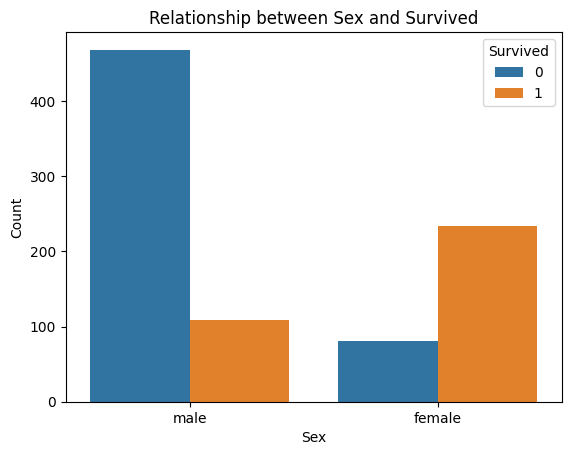

In [25]:
sns.countplot(
    data=train,
    x="Sex",
    hue="Survived"
)
plt.title("Relationship between Sex and Survived")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

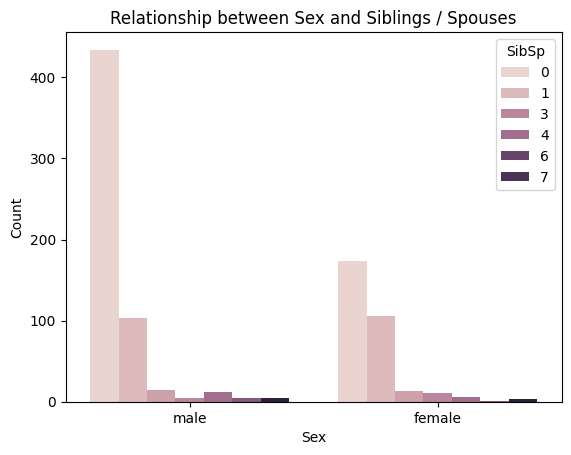

In [26]:
sns.countplot(
    data=train,
    x="Sex",
    hue="SibSp"
)
plt.title("Relationship between Sex and Siblings / Spouses")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

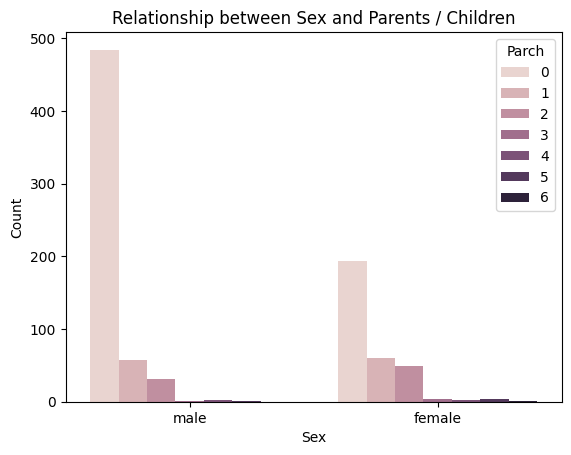

In [27]:
sns.countplot(
    data=train,
    x="Sex",
    hue="Parch"
)
plt.title("Relationship between Sex and Parents / Children")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

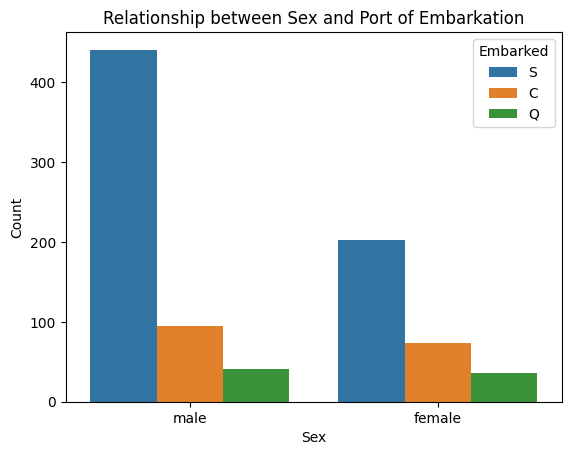

In [28]:
sns.countplot(
    data=train,
    x="Sex",
    hue="Embarked"
)
plt.title("Relationship between Sex and Port of Embarkation")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

#### 3.2.4 Age analysis

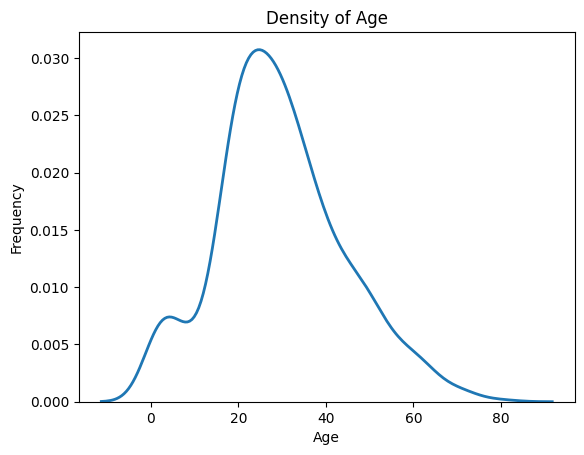

In [29]:
sns.kdeplot(
    data=train,
    x="Age",
    linewidth=2,
)

plt.title("Density of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

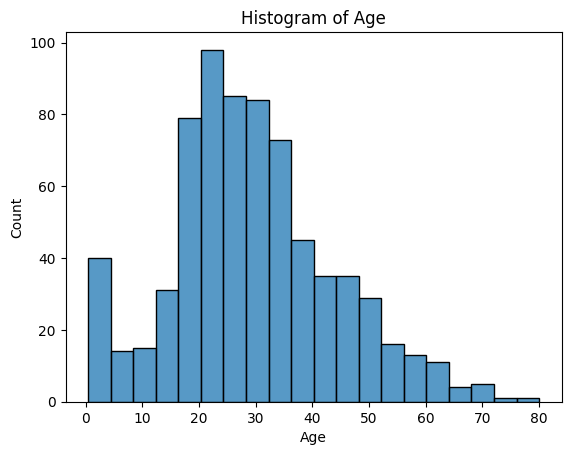

In [30]:
sns.histplot(
    data=train,
    x="Age",
    bins="auto",
)

plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

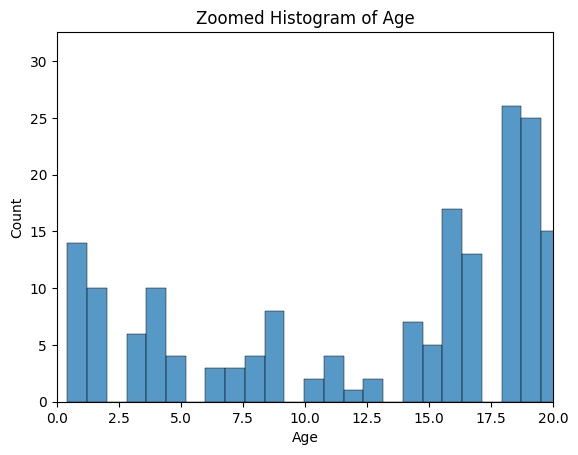

In [31]:
sns.histplot(
    data=train,
    x="Age",
    bins=100
)

plt.title("Zoomed Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xlim([0, 20])
plt.show()

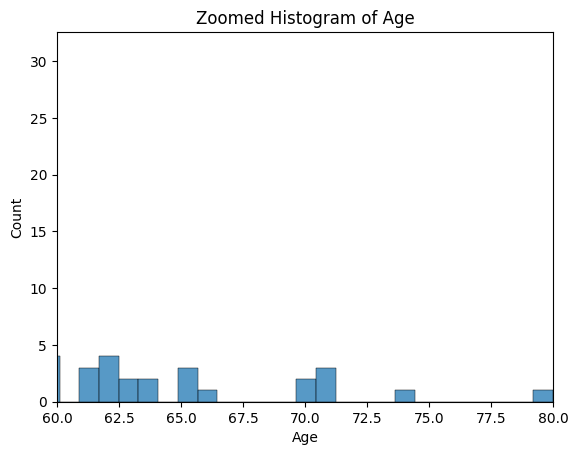

In [32]:
sns.histplot(
    data=train,
    x="Age",
    bins=100
)

plt.title("Zoomed Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xlim([60, 80])
plt.show()

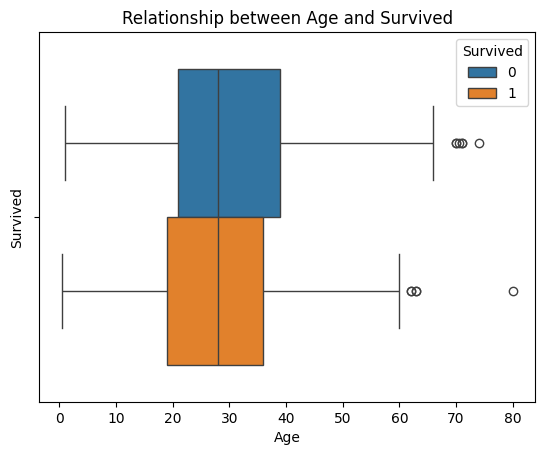

In [33]:
sns.boxplot(
    data=train,
    x="Age",
    hue="Survived",
)

plt.title("Relationship between Age and Survived")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

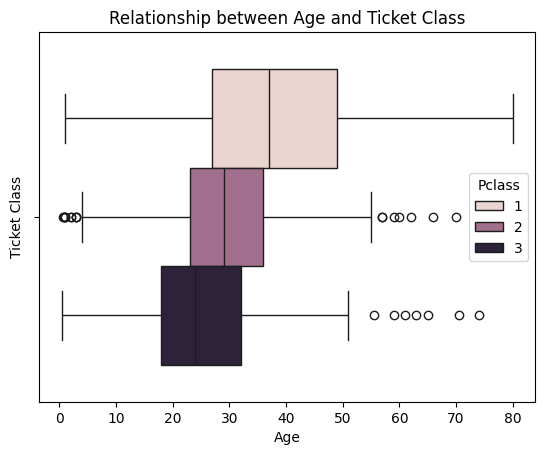

In [34]:
sns.boxplot(
    data=train,
    x="Age",
    hue="Pclass",
)

plt.title("Relationship between Age and Ticket Class")
plt.xlabel("Age")
plt.ylabel("Ticket Class")
plt.show()

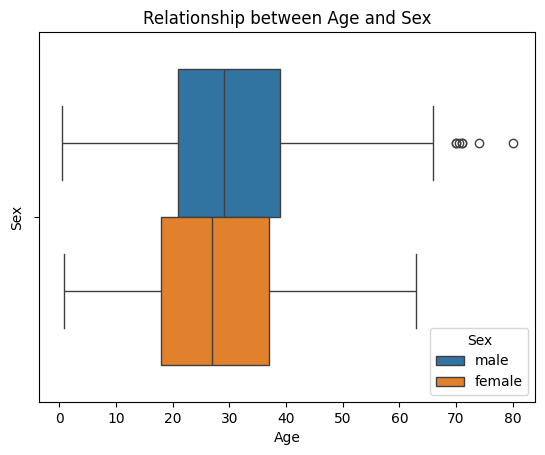

In [35]:
sns.boxplot(
    data=train,
    x="Age",
    hue="Sex",
)

plt.title("Relationship between Age and Sex")
plt.xlabel("Age")
plt.ylabel("Sex")
plt.show()

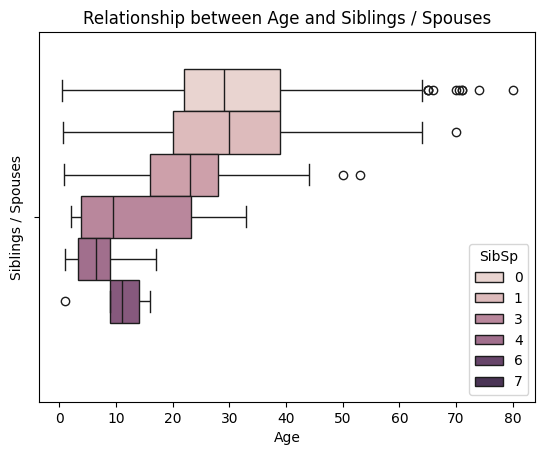

In [36]:
sns.boxplot(
    data=train,
    x="Age",
    hue="SibSp",
)

plt.title("Relationship between Age and Siblings / Spouses")
plt.xlabel("Age")
plt.ylabel("Siblings / Spouses")
plt.show()

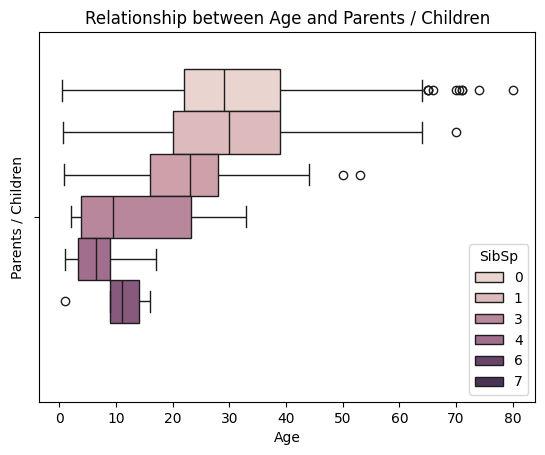

In [37]:
sns.boxplot(
    data=train,
    x="Age",
    hue="SibSp",
)

plt.title("Relationship between Age and Parents / Children")
plt.xlabel("Age")
plt.ylabel("Parents / Children")
plt.show()

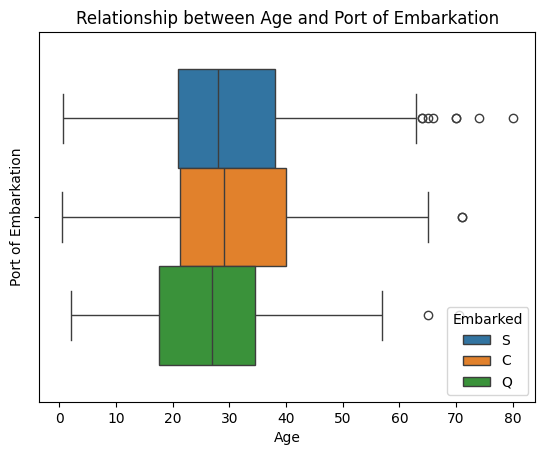

In [38]:
sns.boxplot(
    data=train,
    x="Age",
    hue="Embarked",
)

plt.title("Relationship between Age and Port of Embarkation")
plt.xlabel("Age")
plt.ylabel("Port of Embarkation")
plt.show()

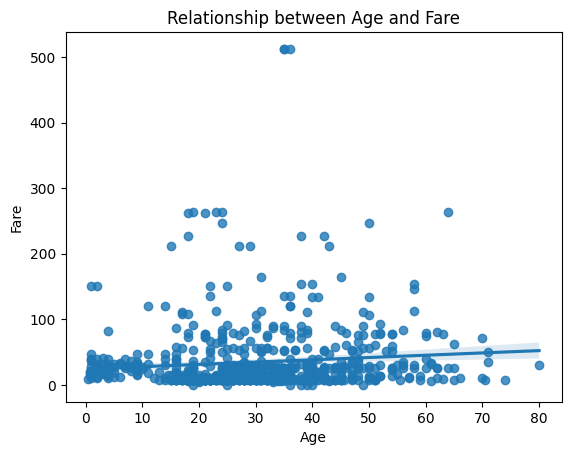

In [39]:
sns.regplot(
    data=train,
    x="Age",
    y="Fare"
)

plt.title("Relationship between Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

#### 3.2.5 Siblings / Spouses analysis

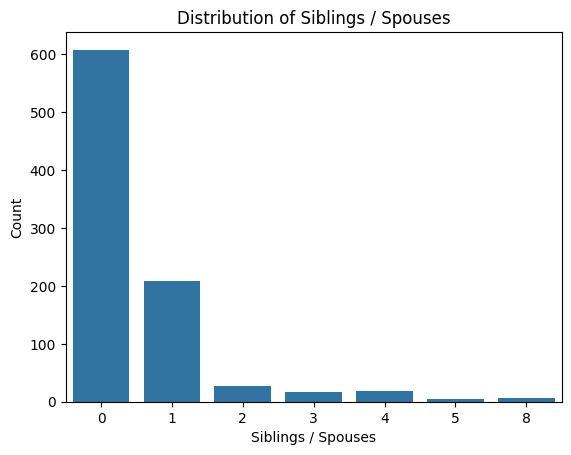

In [40]:
sibsp = train["SibSp"].value_counts()

sns.barplot(
    x=sibsp.index,
    y=sibsp.values
)
plt.title("Distribution of Siblings / Spouses")
plt.xlabel("Siblings / Spouses")
plt.ylabel("Count")
plt.show()

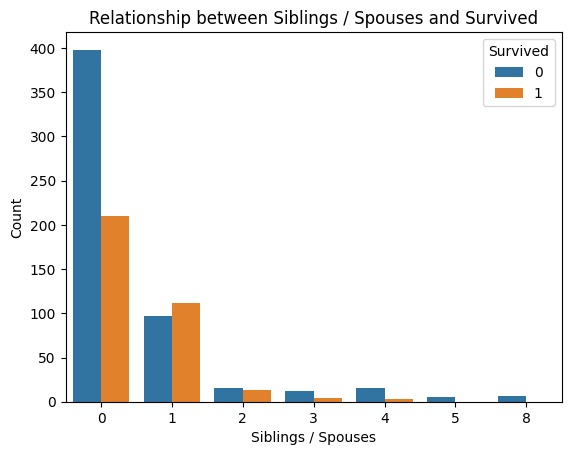

In [41]:
sns.countplot(
    data=train,
    x="SibSp",
    hue="Survived"
)
plt.title("Relationship between Siblings / Spouses and Survived")
plt.xlabel("Siblings / Spouses")
plt.ylabel("Count")
plt.show()

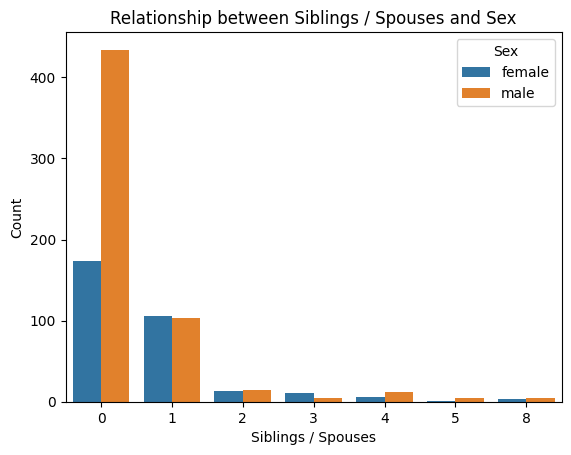

In [42]:
sns.countplot(
    data=train,
    x="SibSp",
    hue="Sex"
)
plt.title("Relationship between Siblings / Spouses and Sex")
plt.xlabel("Siblings / Spouses")
plt.ylabel("Count")
plt.show()

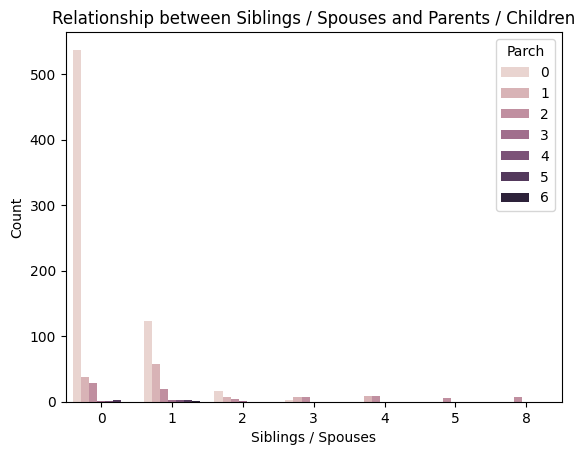

In [43]:
sns.countplot(
    data=train,
    x="SibSp",
    hue="Parch"
)
plt.title("Relationship between Siblings / Spouses and Parents / Children")
plt.xlabel("Siblings / Spouses")
plt.ylabel("Count")
plt.show()

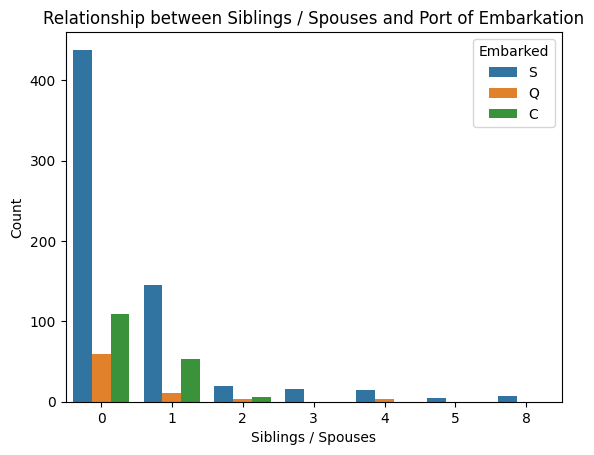

In [44]:
sns.countplot(
    data=train,
    x="SibSp",
    hue="Embarked"
)
plt.title("Relationship between Siblings / Spouses and Port of Embarkation")
plt.xlabel("Siblings / Spouses")
plt.ylabel("Count")
plt.show()

#### 3.2.6 Parents / Children analysis

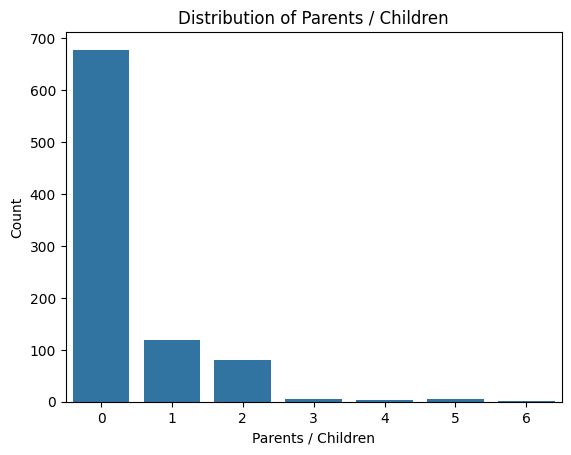

In [45]:
parch = train["Parch"].value_counts()

sns.barplot(
    x=parch.index,
    y=parch.values
)
plt.title("Distribution of Parents / Children")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

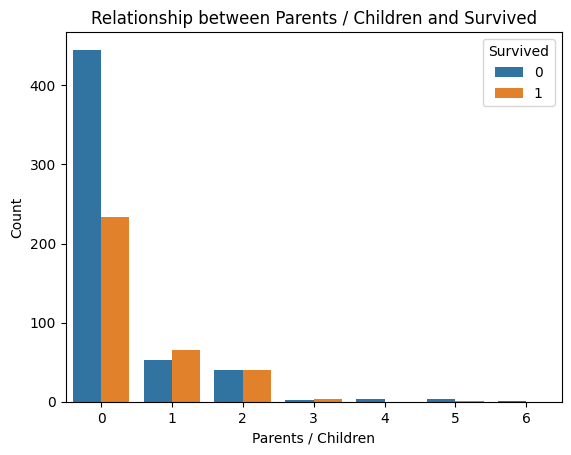

In [46]:
sns.countplot(
    data=train,
    x="Parch",
    hue="Survived"
)
plt.title("Relationship between Parents / Children and Survived")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

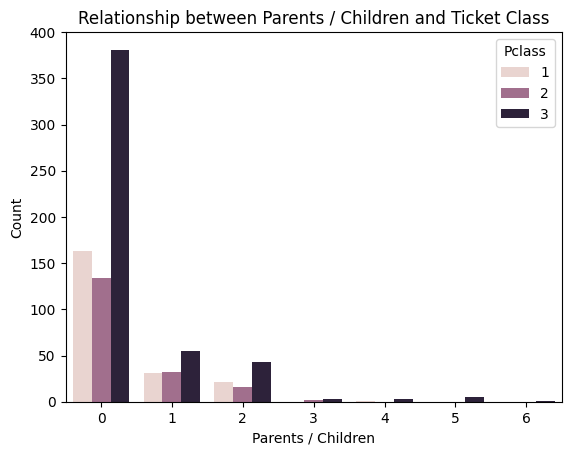

In [47]:
sns.countplot(
    data=train,
    x="Parch",
    hue="Pclass"
)
plt.title("Relationship between Parents / Children and Ticket Class")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

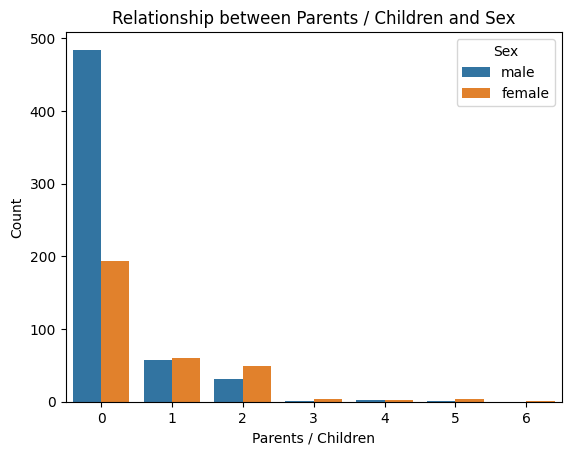

In [48]:
sns.countplot(
    data=train,
    x="Parch",
    hue="Sex"
)
plt.title("Relationship between Parents / Children and Sex")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

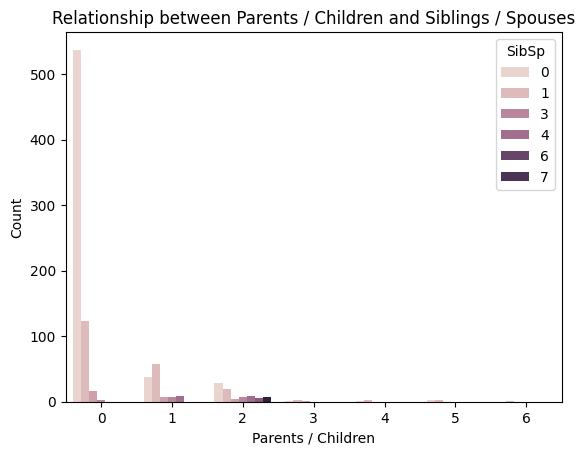

In [49]:
sns.countplot(
    data=train,
    x="Parch",
    hue="SibSp"
)
plt.title("Relationship between Parents / Children and Siblings / Spouses")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

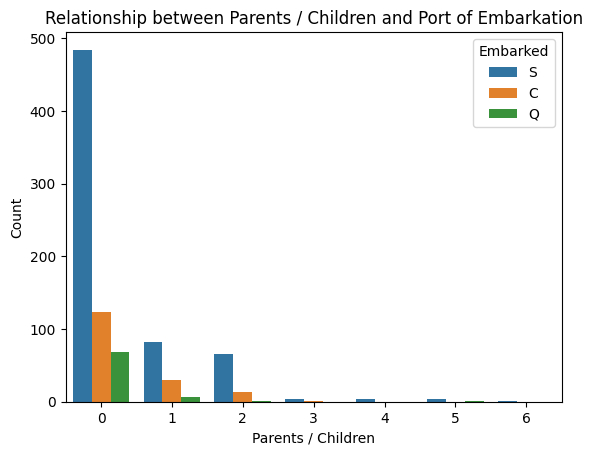

In [50]:
sns.countplot(
    data=train,
    x="Parch",
    hue="Embarked"
)
plt.title("Relationship between Parents / Children and Port of Embarkation")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

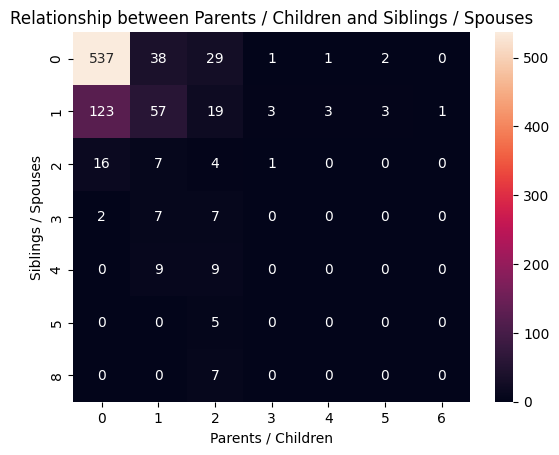

In [51]:
cross_table = pd.crosstab(train["SibSp"], train["Parch"])

sns.heatmap(cross_table, annot=True, fmt="d")

plt.title("Relationship between Parents / Children and Siblings / Spouses")
plt.xlabel("Parents / Children")
plt.ylabel("Siblings / Spouses")
plt.show()

#### 3.2.7 Fare analysis

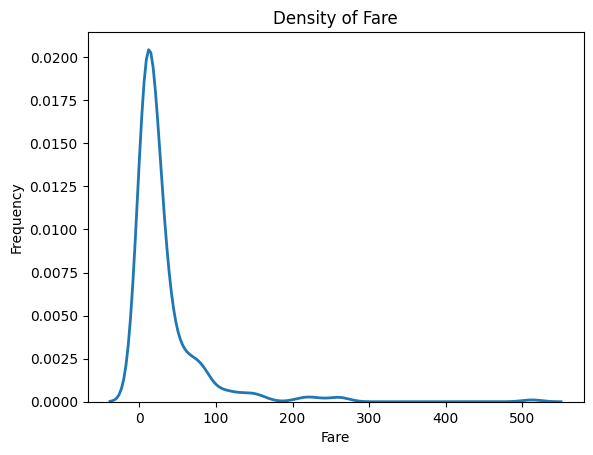

In [52]:
sns.kdeplot(
    data=train,
    x="Fare",
    linewidth=2,
)

plt.title("Density of Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

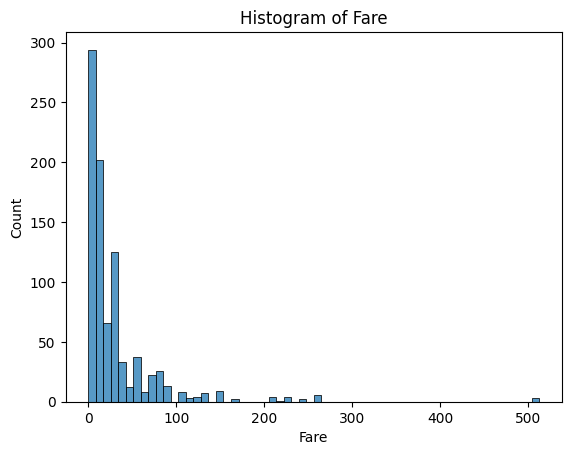

In [53]:
sns.histplot(
    data=train,
    x="Fare",
    bins="auto",
)

plt.title("Histogram of Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

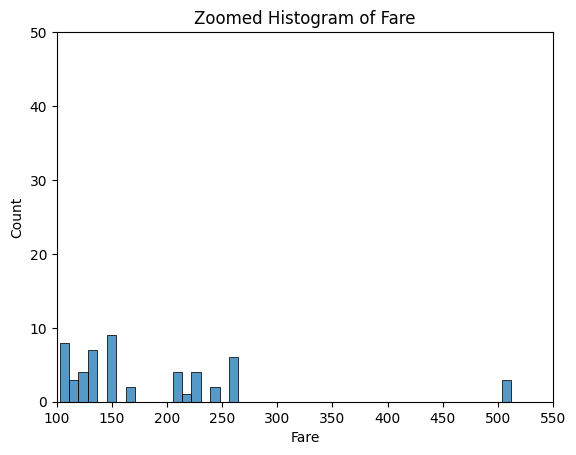

In [54]:
sns.histplot(
    data=train,
    x="Fare",
    bins="auto",
)

plt.title("Zoomed Histogram of Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.xlim([100, 550])
plt.ylim([0, 50])
plt.show()

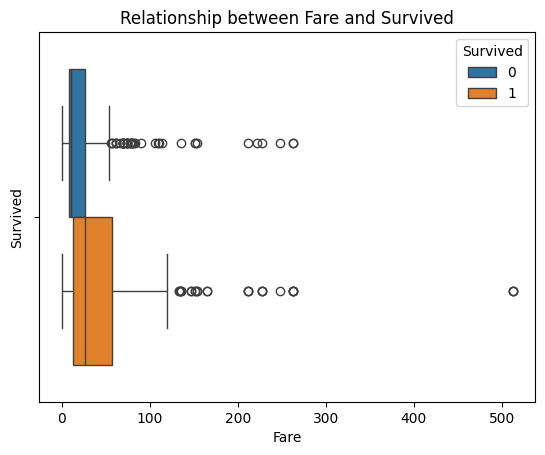

In [55]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="Survived",
)

plt.title("Relationship between Fare and Survived")
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.show()

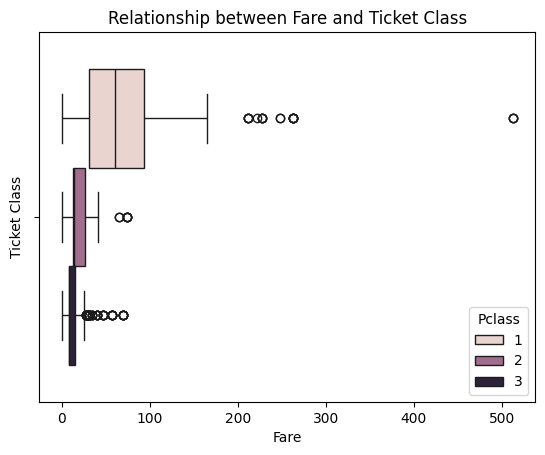

In [56]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="Pclass",
)

plt.title("Relationship between Fare and Ticket Class")
plt.xlabel("Fare")
plt.ylabel("Ticket Class")
plt.show()

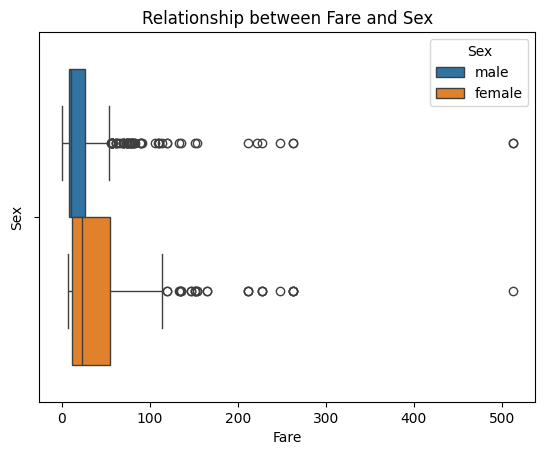

In [57]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="Sex",
)

plt.title("Relationship between Fare and Sex")
plt.xlabel("Fare")
plt.ylabel("Sex")
plt.show()

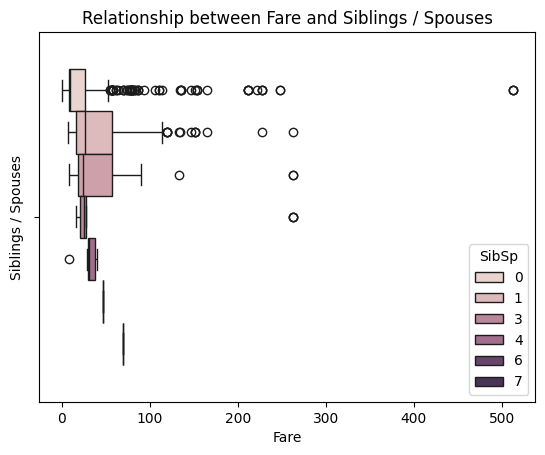

In [58]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="SibSp",
)

plt.title("Relationship between Fare and Siblings / Spouses")
plt.xlabel("Fare")
plt.ylabel("Siblings / Spouses")
plt.show()

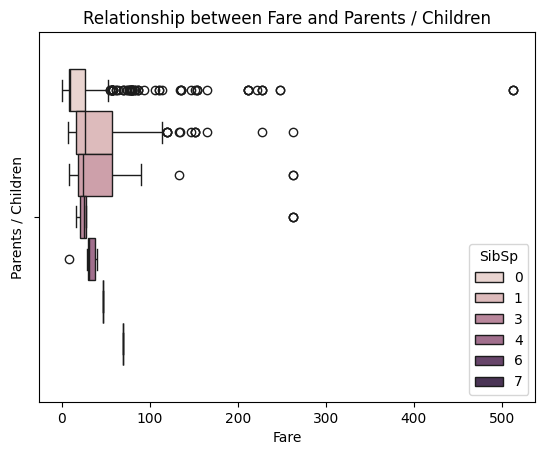

In [59]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="SibSp",
)

plt.title("Relationship between Fare and Parents / Children")
plt.xlabel("Fare")
plt.ylabel("Parents / Children")
plt.show()

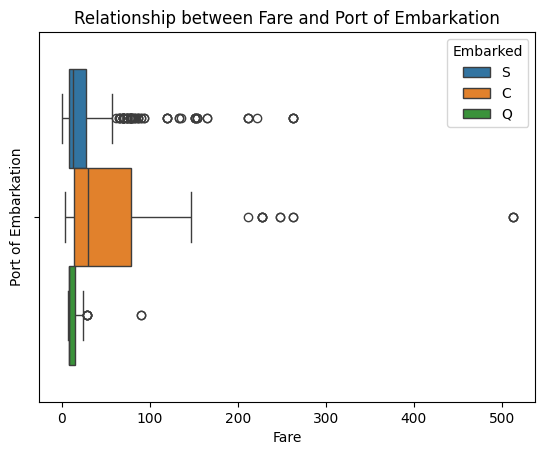

In [60]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="Embarked",
)

plt.title("Relationship between Fare and Port of Embarkation")
plt.xlabel("Fare")
plt.ylabel("Port of Embarkation")
plt.show()

#### 3.2.8 Port of embarkation analysis

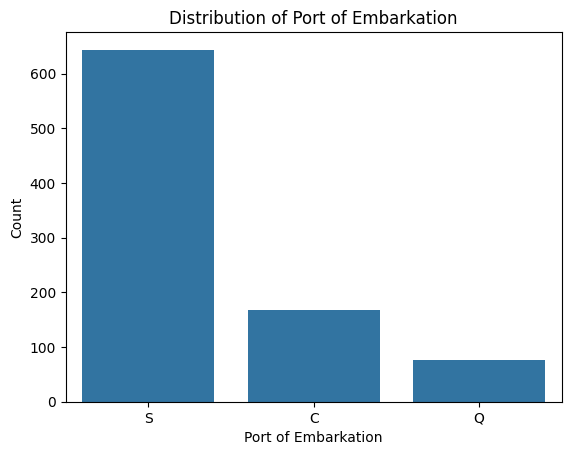

In [61]:
embarked = train["Embarked"].value_counts()

sns.barplot(
    x=embarked.index,
    y=embarked.values
)
plt.title("Distribution of Port of Embarkation")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

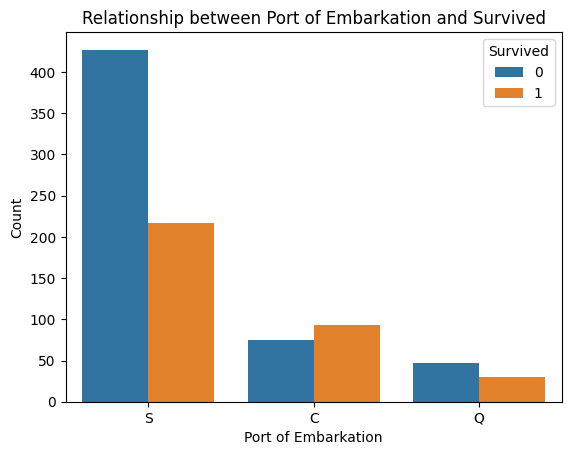

In [62]:
sns.countplot(
    data=train,
    x="Embarked",
    hue="Survived"
)
plt.title("Relationship between Port of Embarkation and Survived")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

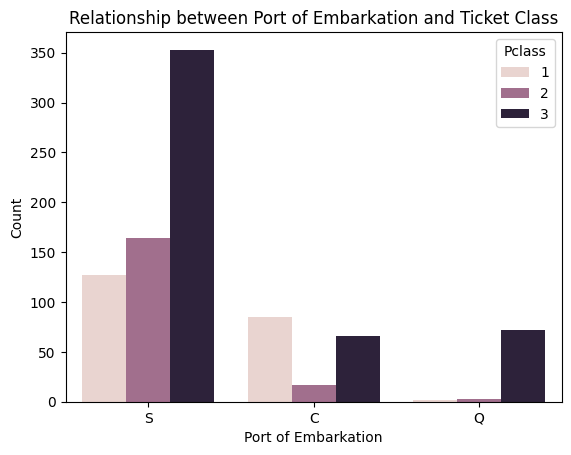

In [63]:
sns.countplot(
    data=train,
    x="Embarked",
    hue="Pclass"
)
plt.title("Relationship between Port of Embarkation and Ticket Class")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

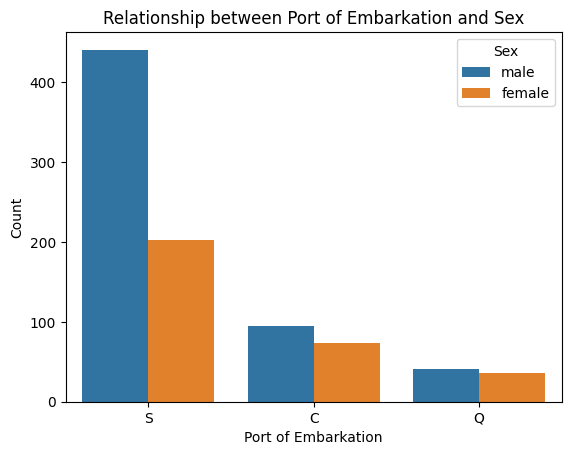

In [64]:
sns.countplot(
    data=train,
    x="Embarked",
    hue="Sex"
)
plt.title("Relationship between Port of Embarkation and Sex")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

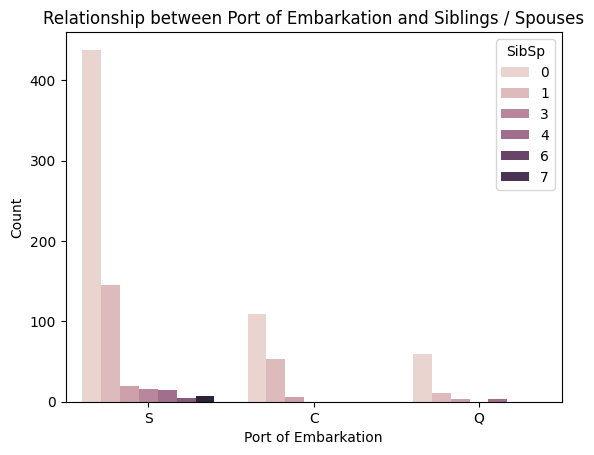

In [65]:
sns.countplot(
    data=train,
    x="Embarked",
    hue="SibSp"
)
plt.title("Relationship between Port of Embarkation and Siblings / Spouses")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

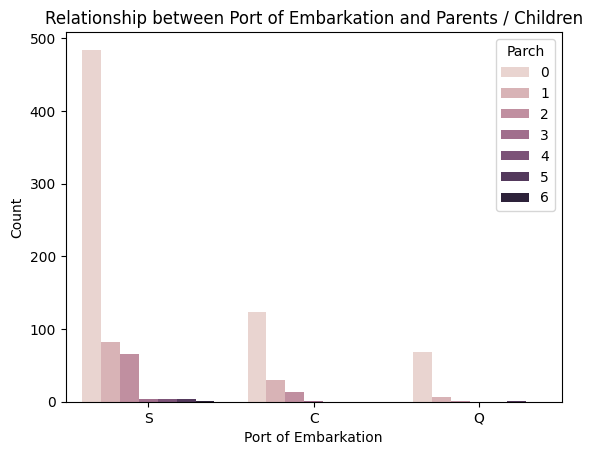

In [66]:
sns.countplot(
    data=train,
    x="Embarked",
    hue="Parch"
)
plt.title("Relationship between Port of Embarkation and Parents / Children")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

## 4. Data preparation

### 4.1 Delete textual columns

In [67]:
train_clean = train[
    # Delete PassengerId, Name, Ticket, Cabin
    ["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "SibSp", "Parch"]
]

In [68]:
train_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SibSp',
       'Parch'],
      dtype='object')

### 4.2 Fill out empty observations

In [69]:
train_clean["Age"].isna().sum()

np.int64(177)

In [70]:
GROUP_MEDIAN = train_clean.groupby(["Sex", "Pclass"])["Age"].median()
GROUP_MEDIAN

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [71]:
def fill_age(row):
    if pd.isnull(row["Age"]):
        return GROUP_MEDIAN.loc[row["Sex"], row["Pclass"]]
    else:
        return row["Age"]

In [72]:
train_clean["Age"] = train_clean.apply(fill_age, axis=1)

/tmp/ipykernel_227816/4283509575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean["Age"] = train_clean.apply(fill_age, axis=1)


In [73]:
train_clean["Age"].isna().sum()

np.int64(0)

### 4.3 Delete missing observations

In [74]:
train_clean["Embarked"].isna().sum()

np.int64(2)

In [75]:
train_clean = train_clean[~train_clean["Embarked"].isna()]

In [76]:
train_clean["Embarked"].isna().sum()

np.int64(0)

### 4.4 Create dummy variables

#### 4.4.1 Create dummy variable from Port of Embarkation

In [77]:
embarked = pd.get_dummies(
    data=train_clean["Embarked"],
    prefix="Embarked",
    prefix_sep="",
    drop_first=False
).astype(int)

In [78]:
embarked

,EmbarkedC,EmbarkedQ,EmbarkedS
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [79]:
train_clean[["EmbarkedC", "EmbarkedQ", "EmbarkedS"]] = embarked

In [80]:
train_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SibSp',
       'Parch', 'EmbarkedC', 'EmbarkedQ', 'EmbarkedS'],
      dtype='object')

In [81]:
train_clean = train_clean.drop(labels=["Embarked"], axis=1)

In [82]:
train_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch',
       'EmbarkedC', 'EmbarkedQ', 'EmbarkedS'],
      dtype='object')

#### 4.4.2 Create dummy variable from Sex

In [83]:
train_clean["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object

In [84]:
train_clean["Sex"] = train_clean["Sex"].map(
    lambda x: 1 if x == "male" else 0
)

In [85]:
train_clean["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int64

#### 4.4.3 Create dummy variable from Ticket Class

In [86]:
pclass = pd.get_dummies(
    data=train_clean["Pclass"],
    prefix="Pclass",
    prefix_sep="",
    drop_first=False
).astype(int)

In [87]:
pclass

,Pclass1,Pclass2,Pclass3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [88]:
train_clean[["Pclass1", "Pclass2", "Pclass3"]] = pclass

In [89]:
train_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch',
       'EmbarkedC', 'EmbarkedQ', 'EmbarkedS', 'Pclass1', 'Pclass2', 'Pclass3'],
      dtype='object')

In [90]:
train_clean = train_clean.drop(labels=["Pclass"], axis=1)

In [91]:
train_clean.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'EmbarkedC',
       'EmbarkedQ', 'EmbarkedS', 'Pclass1', 'Pclass2', 'Pclass3'],
      dtype='object')

### 4.5 Scale numerical columns

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

#### 4.5.1 Scale Age

In [94]:
train_clean["Age"].mean(), train_clean["Age"].std()

(np.float64(29.06543307086614), np.float64(13.27016179195023))

In [95]:
train_clean["Age"] = scaler.fit_transform(train_clean[["Age"]])

In [96]:
train_clean["Age"].mean(), train_clean["Age"].std()

(np.float64(2.6375602114829364e-16), np.float64(1.0005629046322506))

#### 4.5.2 Scale Fare

In [97]:
train_clean["Fare"].mean(), train_clean["Fare"].std()

(np.float64(32.09668087739032), np.float64(49.697504316707956))

In [98]:
train_clean["Fare"] = scaler.fit_transform(train_clean[["Fare"]])

In [99]:
train_clean["Fare"].mean(), train_clean["Fare"].std()

(np.float64(1.3987061727561027e-16), np.float64(1.0005629046322506))

### 4.6 Delete numerical columns

In [100]:
train_clean = train_clean.drop(["Parch", "SibSp"], axis=1)

### 4.7 Save data

In [101]:
train_clean.head()

,Survived,Sex,Age,Fare,EmbarkedC,EmbarkedQ,EmbarkedS,Pclass1,Pclass2,Pclass3
0,0,1,-0.532730,-0.500240,0,0,1,0,0,1
1,1,0,0.673661,0.788947,1,0,0,1,0,0
2,1,0,-0.231132,-0.486650,0,0,1,0,0,1
3,1,0,0.447463,0.422861,0,0,1,1,0,0
4,0,1,0.447463,-0.484133,0,0,1,0,0,1


In [102]:
train_clean.to_csv("data/train_clean.csv", index=False)

## 5. Modeling

### 5.1 Create helper functions

In [103]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [104]:
from itertools import chain, combinations
from typing import List

def powerset(columns: List[str]) -> List[List[str]]:
    all_subsets = chain.from_iterable(
        combinations(columns, r) for r in range(1, len(columns) + 1)
    )
    
    valid_subsets = []
    for subset in all_subsets:
        subset = set(subset)
        
        if "EmbarkedA" in subset and not {"EmbarkedB", "EmbarkedC"}.issubset(subset):
            continue
        
        if "Pclass1" in subset and not {"Pclass2", "Pclass3"}.issubset(subset):
            continue
        
        valid_subsets.append(list(subset))
    
    return valid_subsets

In [105]:
models_and_params = {
    "GaussianNB": {
        "model": GaussianNB(),
        "params": {},
    },
    "KNeighborsClassifier": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],
        },
    },
    "LogisticRegression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.001, 0.01, 0.1, 1, 10, 100],
            "max_iter": [100, 200, 500, 1000]
        },
    },
    "LinearDiscriminantAnalysis": {
        "model": LinearDiscriminantAnalysis(),
        "params": {},   
    },
    "QuadraticDiscriminantAnalysis": {
        "model": QuadraticDiscriminantAnalysis(),
        "params": {},
    },
    "DecisionTreeClassifier": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
        }
    },
    "RandomForestClassifier": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
        },
    },
    # "SVC": {
    #     "model": SVC(),
    #     "params": {
    #         "C": [0.1, 1, 10],
    #         "kernel": ["rbf", "poly", "linear"],
    #         "degree": [2, 3, 4],
    #     }
    # }
}

In [106]:
from typing import Dict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import time

def evaluate_model(grid_search, X_test: pd.DataFrame, y_test: pd.DataFrame) -> Dict:
    print(f"\nEvaluating model: {grid_search.best_estimator_.__class__.__name__}")
    
    fit_times = grid_search.cv_results_['mean_fit_time']
    mean_fit_time = np.mean(fit_times)
    
    start_time = time.time()
    y_pred = grid_search.predict(X_test)
    predict_time = time.time() - start_time
    
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1] if hasattr(grid_search, "predict_proba") else None

    metrics = {
        'accuracy': np.round(
            accuracy_score(y_test, y_pred), 4
        ),
        'precision': np.round(
            precision_score(y_test, y_pred, zero_division=0), 4
        ),
        'recall': np.round(
            recall_score(y_test, y_pred, zero_division=0), 3
        ),
        'f1': np.round(
            f1_score(y_test, y_pred, zero_division=0), 3
        ),
        'roc_auc': np.round(
            roc_auc_score(y_test, y_pred_proba), 3
        ) if y_pred_proba is not None else None,
        'mean_fit_time': np.round(
            mean_fit_time, 3
        ),
        'predict_time': np.round(
            predict_time, 3
        ),
    }
    
    print("Metrics obtained:")
    for metric, value in metrics.items():
        print(f"- {metric}: {value}")
    
    return metrics

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [107]:
from sklearn.model_selection import GridSearchCV

def evaluate_models(models_and_params: Dict, X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> List:
    print(f"\nStarting evaluation of {len(models_and_params)} models")
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")
    
    results = []
    for name, info in models_and_params.items():
        print(f"\n{'='*50}")
        print(f"Training model: {name}")
        print(f"Parameter grid: {info['params']}")
        
        model = info["model"]
        params = info["params"]
        
        try:
            start_time = time.time()
            
            grid_search = GridSearchCV(
                estimator=model, 
                param_grid=params,
                cv=5,
                scoring='f1',
                n_jobs=-1,
                verbose=1,
                return_train_score=True
            )
            
            grid_search.fit(X_train, y_train)
            
            metrics = evaluate_model(grid_search, X_test, y_test)
            training_time = time.time() - start_time
            
            print(f"Best parameters found: {grid_search.best_params_}")
            print(f"Training time: {training_time:.2f} seconds")
            
            result = {
                'model': name,
                'columns': X_train.columns.tolist(),
                'best_params': str(grid_search.best_params_),
                'training_time': training_time,
                **metrics
            }
            results.append(result)
            
            
        except Exception as e:
            print(f"Error training {name}: {str(e)}")
    
    return results

In [108]:
def evaluate(models_and_params: Dict, columns: List[str], X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    results = []
    total_combinations = len(list(powerset(columns)))
    
    print(f"Starting evaluation with {len(columns)} features")
    print(f"Total feature combinations to evaluate: {total_combinations}")
    
    for i, cols in enumerate(tqdm(powerset(columns)), 1):
        print(f"\nEvaluating combination {i}/{total_combinations}")
        print(f"Selected features: {cols}")
        
        X_train_sub = X_train[list(cols)]
        X_test_sub = X_test[list(cols)]
        
        results.append(evaluate_models(models_and_params, X_train_sub, y_train, X_test_sub, y_test))
        
        print(f"Completed combination {i}/{total_combinations}")
    
    print("\nCreating results DataFrame...")
    results_df = [pd.DataFrame(result) for result in results]
    df_results = pd.concat(results_df, ignore_index=True).reset_index(drop=True)
    
    print("Saving results to CSV...")
    df_results.to_csv('data/train_results.csv')
    
    print("Evaluation complete!")
    
    return df_results


### 5.2 Prepare data

In [109]:
train_clean = pd.read_csv("data/train_clean.csv")
train_clean.head()

,Survived,Sex,Age,Fare,EmbarkedC,EmbarkedQ,EmbarkedS,Pclass1,Pclass2,Pclass3
0,0,1,-0.532730,-0.500240,0,0,1,0,0,1
1,1,0,0.673661,0.788947,1,0,0,1,0,0
2,1,0,-0.231132,-0.486650,0,0,1,0,0,1
3,1,0,0.447463,0.422861,0,0,1,1,0,0
4,0,1,0.447463,-0.484133,0,0,1,0,0,1


In [110]:
from sklearn.model_selection import train_test_split

X = train_clean.drop(columns=["Survived"])
y = train_clean["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
columns = X.columns.to_list()
columns

['Sex',
 'Age',
 'Fare',
 'EmbarkedC',
 'EmbarkedQ',
 'EmbarkedS',
 'Pclass1',
 'Pclass2',
 'Pclass3']

### 5.3 Modeling

In [112]:
results = evaluate(models_and_params, columns, X_train, y_train, X_test, y_test)

Starting evaluation with 9 features
Total feature combinations to evaluate: 319


  0%|          | 0/319 [00:00<?, ?it/s]


Evaluating combination 1/319
Selected features: ['Sex']

Starting evaluation of 7 models
Training data shape: (711, 1)
Testing data shape: (178, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.792
- mean_fit_time: 0.004
- predict_time: 0.001
Best parameters found: {}
Training time: 2.64 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.792
- mean_fit_time: 0.005
- predict_time: 0.007
Best parameters found: {'n_neighbors': 9}
Training time: 3.62 seconds

Training model: LogisticRegression
Parameter grid: {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 50

  0%|          | 1/319 [00:23<2:06:57, 23.95s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.792
- mean_fit_time: 0.515
- predict_time: 0.009
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 16.53 seconds
Completed combination 1/319

Evaluating combination 2/319
Selected features: ['Age']

Starting evaluation of 7 models
Training data shape: (711, 1)
Testing data shape: (178, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6067
- precision: 0.4
- recall: 0.029
- f1: 0.054
- roc_auc: 0.467
- mean_fit_time: 0.008
- predict_time: 0.001
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model

  1%|          | 2/319 [00:44<1:56:06, 21.97s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5417
- recall: 0.377
- f1: 0.444
- roc_auc: 0.649
- mean_fit_time: 0.598
- predict_time: 0.021
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 19.33 seconds
Completed combination 2/319

Evaluating combination 3/319
Selected features: ['Fare']

Starting evaluation of 7 models
Training data shape: (711, 1)
Testing data shape: (178, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6854
- precision: 0.8421
- recall: 0.232
- f1: 0.364
- roc_auc: 0.648
- mean_fit_time: 0.004
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating m

  1%|          | 3/319 [01:05<1:52:35, 21.38s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7303
- precision: 0.6981
- recall: 0.536
- f1: 0.607
- roc_auc: 0.754
- mean_fit_time: 0.605
- predict_time: 0.007
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 19.34 seconds
Completed combination 3/319

Evaluating combination 4/319
Selected features: ['EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 1)
Testing data shape: (178, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.56
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluatin

  1%|▏         | 4/319 [01:22<1:43:45, 19.76s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.56
- mean_fit_time: 0.506
- predict_time: 0.005
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 16.00 seconds
Completed combination 4/319

Evaluating combination 5/319
Selected features: ['EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 1)
Testing data shape: (178, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6124
- precision: 0.0
- recall: 0.0
- f1: 0.0
- roc_auc: 0.504
- mean_fit_time: 0.004
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating mod

  2%|▏         | 5/319 [01:38<1:36:45, 18.49s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6124
- precision: 0.0
- recall: 0.0
- f1: 0.0
- roc_auc: 0.496
- mean_fit_time: 0.468
- predict_time: 0.005
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 15.02 seconds
Completed combination 5/319

Evaluating combination 6/319
Selected features: ['EmbarkedS']

Starting evaluation of 7 models
Training data shape: (711, 1)
Testing data shape: (178, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6124
- precision: 0.5
- recall: 0.348
- f1: 0.41
- roc_auc: 0.564
- mean_fit_time: 0.004
- predict_time: 0.001
Best parameters found: {}
Training time: 0.09 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model:

  2%|▏         | 6/319 [01:54<1:32:23, 17.71s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6124
- precision: 0.5
- recall: 0.348
- f1: 0.41
- roc_auc: 0.564
- mean_fit_time: 0.467
- predict_time: 0.014
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 14.96 seconds
Completed combination 6/319

Evaluating combination 7/319
Selected features: ['Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 1)
Testing data shape: (178, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.5787
- precision: 0.4286
- recall: 0.261
- f1: 0.324
- roc_auc: 0.52
- mean_fit_time: 0.006
- predict_time: 0.002
Best parameters found: {}
Training time: 0.09 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating mo

  2%|▏         | 7/319 [02:11<1:30:06, 17.33s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6124
- precision: 0.0
- recall: 0.0
- f1: 0.0
- roc_auc: 0.52
- mean_fit_time: 0.477
- predict_time: 0.01
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 15.23 seconds
Completed combination 7/319

Evaluating combination 8/319
Selected features: ['Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 1)
Testing data shape: (178, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.662
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: K

  3%|▎         | 8/319 [02:28<1:29:05, 17.19s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.662
- mean_fit_time: 0.496
- predict_time: 0.015
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 15.62 seconds
Completed combination 8/319

Evaluating combination 9/319
Selected features: ['Sex', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.767
- mean_fit_time: 0.004
- predict_time: 0.001
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evalua

  3%|▎         | 9/319 [02:49<1:34:38, 18.32s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7237
- recall: 0.797
- f1: 0.759
- roc_auc: 0.837
- mean_fit_time: 0.605
- predict_time: 0.009
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 19.46 seconds
Completed combination 9/319

Evaluating combination 10/319
Selected features: ['Sex', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.845
- mean_fit_time: 0.005
- predict_time: 0.001
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluat

  3%|▎         | 10/319 [03:09<1:37:52, 19.00s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7697
- precision: 0.6892
- recall: 0.739
- f1: 0.713
- roc_auc: 0.829
- mean_fit_time: 0.595
- predict_time: 0.044
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 19.20 seconds
Completed combination 10/319

Evaluating combination 11/319
Selected features: ['Sex', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6333
- recall: 0.826
- f1: 0.717
- roc_auc: 0.808
- mean_fit_time: 0.003
- predict_time: 0.004
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fit

  3%|▎         | 11/319 [03:26<1:33:39, 18.25s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.808
- mean_fit_time: 0.487
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 15.36 seconds
Completed combination 11/319

Evaluating combination 12/319
Selected features: ['Sex', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.787
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


  4%|▍         | 12/319 [03:42<1:30:17, 17.65s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.797
- mean_fit_time: 0.466
- predict_time: 0.01
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 14.90 seconds
Completed combination 12/319

Evaluating combination 13/319
Selected features: ['Sex', 'EmbarkedS']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.802
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits



  4%|▍         | 13/319 [03:58<1:28:03, 17.27s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.802
- mean_fit_time: 0.473
- predict_time: 0.006
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 15.04 seconds
Completed combination 13/319

Evaluating combination 14/319
Selected features: ['Sex', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.8
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Eva

  4%|▍         | 14/319 [04:16<1:28:47, 17.47s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.811
- mean_fit_time: 0.54
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 16.53 seconds
Completed combination 14/319

Evaluating combination 15/319
Selected features: ['Sex', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.845
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Ev

  5%|▍         | 15/319 [04:34<1:29:10, 17.60s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.845
- mean_fit_time: 0.553
- predict_time: 0.017
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 17.46 seconds
Completed combination 15/319

Evaluating combination 16/319
Selected features: ['Fare', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6798
- precision: 0.8
- recall: 0.232
- f1: 0.36
- roc_auc: 0.655
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluatin

  5%|▌         | 16/319 [04:55<1:34:09, 18.65s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7191
- precision: 0.6557
- recall: 0.58
- f1: 0.615
- roc_auc: 0.767
- mean_fit_time: 0.612
- predict_time: 0.032
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 19.87 seconds
Completed combination 16/319

Evaluating combination 17/319
Selected features: ['EmbarkedC', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.542
- mean_fit_time: 0.002
- predict_time: 0.005
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fit

  5%|▌         | 17/319 [05:14<1:33:31, 18.58s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6629
- precision: 0.5882
- recall: 0.435
- f1: 0.5
- roc_auc: 0.664
- mean_fit_time: 0.521
- predict_time: 0.017
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 17.26 seconds
Completed combination 17/319

Evaluating combination 18/319
Selected features: ['EmbarkedQ', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6067
- precision: 0.3333
- recall: 0.014
- f1: 0.028
- roc_auc: 0.476
- mean_fit_time: 0.004
- predict_time: 0.001
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


  6%|▌         | 18/319 [05:33<1:34:09, 18.77s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6854
- precision: 0.6275
- recall: 0.464
- f1: 0.533
- roc_auc: 0.658
- mean_fit_time: 0.541
- predict_time: 0.032
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 17.89 seconds
Completed combination 18/319

Evaluating combination 19/319
Selected features: ['EmbarkedS', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6124
- precision: 0.5
- recall: 0.348
- f1: 0.41
- roc_auc: 0.547
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Eva

  6%|▌         | 19/319 [05:53<1:35:08, 19.03s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6685
- precision: 0.6042
- recall: 0.42
- f1: 0.496
- roc_auc: 0.674
- mean_fit_time: 0.553
- predict_time: 0.029
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 18.34 seconds
Completed combination 19/319

Evaluating combination 20/319
Selected features: ['Age', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.5787
- precision: 0.4286
- recall: 0.261
- f1: 0.324
- roc_auc: 0.477
- mean_fit_time: 0.005
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Ev

  6%|▋         | 20/319 [06:12<1:35:22, 19.14s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6461
- precision: 0.56
- recall: 0.406
- f1: 0.471
- roc_auc: 0.652
- mean_fit_time: 0.564
- predict_time: 0.006
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 18.09 seconds
Completed combination 20/319

Evaluating combination 21/319
Selected features: ['Age', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.654
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

E

  7%|▋         | 21/319 [06:31<1:34:51, 19.10s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6685
- precision: 0.6
- recall: 0.435
- f1: 0.504
- roc_auc: 0.729
- mean_fit_time: 0.546
- predict_time: 0.016
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 17.68 seconds
Completed combination 21/319

Evaluating combination 22/319
Selected features: ['Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5476
- recall: 0.333
- f1: 0.414
- roc_auc: 0.626
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.06 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits



  7%|▋         | 22/319 [06:51<1:35:28, 19.29s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6966
- precision: 0.6364
- recall: 0.507
- f1: 0.565
- roc_auc: 0.734
- mean_fit_time: 0.581
- predict_time: 0.008
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 18.44 seconds
Completed combination 22/319

Evaluating combination 23/319
Selected features: ['Fare', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6854
- precision: 0.8421
- recall: 0.232
- f1: 0.364
- roc_auc: 0.656
- mean_fit_time: 0.002
- predict_time: 0.004
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fit

  7%|▋         | 23/319 [07:11<1:37:01, 19.67s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7247
- precision: 0.6724
- recall: 0.565
- f1: 0.614
- roc_auc: 0.749
- mean_fit_time: 0.603
- predict_time: 0.011
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 19.26 seconds
Completed combination 23/319

Evaluating combination 24/319
Selected features: ['Fare', 'EmbarkedS']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6854
- precision: 0.8095
- recall: 0.246
- f1: 0.378
- roc_auc: 0.632
- mean_fit_time: 0.004
- predict_time: 0.005
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fi

  8%|▊         | 24/319 [07:31<1:37:13, 19.78s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6966
- precision: 0.6415
- recall: 0.493
- f1: 0.557
- roc_auc: 0.744
- mean_fit_time: 0.575
- predict_time: 0.013
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 18.66 seconds
Completed combination 24/319

Evaluating combination 25/319
Selected features: ['Fare', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6685
- precision: 0.7778
- recall: 0.203
- f1: 0.322
- roc_auc: 0.667
- mean_fit_time: 0.003
- predict_time: 0.004
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


  8%|▊         | 25/319 [07:53<1:39:04, 20.22s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.6
- recall: 0.522
- f1: 0.558
- roc_auc: 0.715
- mean_fit_time: 0.622
- predict_time: 0.007
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 19.87 seconds
Completed combination 25/319

Evaluating combination 26/319
Selected features: ['Fare', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7022
- precision: 0.75
- recall: 0.348
- f1: 0.475
- roc_auc: 0.685
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Eval

  8%|▊         | 26/319 [08:14<1:39:52, 20.45s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7135
- precision: 0.65
- recall: 0.565
- f1: 0.605
- roc_auc: 0.728
- mean_fit_time: 0.579
- predict_time: 0.039
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 19.47 seconds
Completed combination 26/319

Evaluating combination 27/319
Selected features: ['EmbarkedQ', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.567
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 f

  8%|▊         | 27/319 [08:30<1:34:07, 19.34s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.567
- mean_fit_time: 0.481
- predict_time: 0.009
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 15.35 seconds
Completed combination 27/319

Evaluating combination 28/319
Selected features: ['EmbarkedC', 'EmbarkedS']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.567
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 

  9%|▉         | 28/319 [08:47<1:29:32, 18.46s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.567
- mean_fit_time: 0.48
- predict_time: 0.005
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 15.21 seconds
Completed combination 28/319

Evaluating combination 29/319
Selected features: ['EmbarkedC', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6011
- precision: 0.4868
- recall: 0.536
- f1: 0.51
- roc_auc: 0.594
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 f

  9%|▉         | 29/319 [09:04<1:26:52, 17.97s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.594
- mean_fit_time: 0.496
- predict_time: 0.02
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 15.42 seconds
Completed combination 29/319

Evaluating combination 30/319
Selected features: ['EmbarkedC', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.659
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.06 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 

  9%|▉         | 30/319 [09:22<1:26:44, 18.01s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.681
- mean_fit_time: 0.542
- predict_time: 0.006
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 16.77 seconds
Completed combination 30/319

Evaluating combination 31/319
Selected features: ['EmbarkedQ', 'EmbarkedS']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6124
- precision: 0.5
- recall: 0.348
- f1: 0.41
- roc_auc: 0.561
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.05 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 f

 10%|▉         | 31/319 [09:39<1:26:09, 17.95s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.567
- mean_fit_time: 0.528
- predict_time: 0.012
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 16.54 seconds
Completed combination 31/319

Evaluating combination 32/319
Selected features: ['EmbarkedQ', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.5787
- precision: 0.4286
- recall: 0.261
- f1: 0.324
- roc_auc: 0.523
- mean_fit_time: 0.003
- predict_time: 0.004
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20

 10%|█         | 32/319 [09:55<1:22:11, 17.18s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6124
- precision: 0.5
- recall: 0.014
- f1: 0.028
- roc_auc: 0.523
- mean_fit_time: 0.467
- predict_time: 0.005
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 14.75 seconds
Completed combination 32/319

Evaluating combination 33/319
Selected features: ['EmbarkedQ', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.669
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

 10%|█         | 33/319 [10:13<1:23:25, 17.50s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6517
- precision: 0.5422
- recall: 0.652
- f1: 0.592
- roc_auc: 0.665
- mean_fit_time: 0.531
- predict_time: 0.017
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 16.89 seconds
Completed combination 33/319

Evaluating combination 34/319
Selected features: ['EmbarkedS', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.5899
- precision: 0.4767
- recall: 0.594
- f1: 0.529
- roc_auc: 0.577
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {}
Training time: 0.09 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20

 11%|█         | 34/319 [10:30<1:22:01, 17.27s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6011
- precision: 0.25
- recall: 0.014
- f1: 0.027
- roc_auc: 0.594
- mean_fit_time: 0.484
- predict_time: 0.006
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 15.44 seconds
Completed combination 34/319

Evaluating combination 35/319
Selected features: ['EmbarkedS', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.688
- mean_fit_time: 0.002
- predict_time: 0.005
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fit

 11%|█         | 35/319 [10:47<1:21:28, 17.21s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.688
- mean_fit_time: 0.496
- predict_time: 0.02
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 15.68 seconds
Completed combination 35/319

Evaluating combination 36/319
Selected features: ['Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.633
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 f

 11%|█▏        | 36/319 [11:03<1:20:09, 17.00s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.691
- precision: 0.6591
- recall: 0.42
- f1: 0.513
- roc_auc: 0.69
- mean_fit_time: 0.485
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 15.13 seconds
Completed combination 36/319

Evaluating combination 37/319
Selected features: ['Sex', 'Fare', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.83
- mean_fit_time: 0.003
- predict_time: 0.004
Best parameters found: {}
Training time: 0.09 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Eva

 12%|█▏        | 37/319 [11:23<1:24:02, 17.88s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8315
- precision: 0.7671
- recall: 0.812
- f1: 0.789
- roc_auc: 0.864
- mean_fit_time: 0.595
- predict_time: 0.006
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 18.64 seconds
Completed combination 37/319

Evaluating combination 38/319
Selected features: ['Sex', 'EmbarkedC', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7067
- recall: 0.768
- f1: 0.736
- roc_auc: 0.795
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 2

 12%|█▏        | 38/319 [11:44<1:27:58, 18.79s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7324
- recall: 0.754
- f1: 0.743
- roc_auc: 0.855
- mean_fit_time: 0.6
- predict_time: 0.015
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 19.43 seconds
Completed combination 38/319

Evaluating combination 39/319
Selected features: ['Sex', 'Age', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.766
- mean_fit_time: 0.002
- predict_time: 0.004
Best parameters found: {}
Training time: 0.06 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 f

 12%|█▏        | 39/319 [12:03<1:28:12, 18.90s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8202
- precision: 0.7403
- recall: 0.826
- f1: 0.781
- roc_auc: 0.842
- mean_fit_time: 0.568
- predict_time: 0.007
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 17.91 seconds
Completed combination 39/319

Evaluating combination 40/319
Selected features: ['Sex', 'EmbarkedS', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.79
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20

 13%|█▎        | 40/319 [12:24<1:30:04, 19.37s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7361
- recall: 0.768
- f1: 0.752
- roc_auc: 0.83
- mean_fit_time: 0.59
- predict_time: 0.016
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 19.02 seconds
Completed combination 40/319

Evaluating combination 41/319
Selected features: ['Sex', 'Age', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.77
- mean_fit_time: 0.004
- predict_time: 0.001
Best parameters found: {}
Training time: 0.06 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fit

 13%|█▎        | 41/319 [12:44<1:30:57, 19.63s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7536
- recall: 0.754
- f1: 0.754
- roc_auc: 0.846
- mean_fit_time: 0.59
- predict_time: 0.016
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 18.99 seconds
Completed combination 41/319

Evaluating combination 42/319
Selected features: ['Sex', 'Age', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.835
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fit

 13%|█▎        | 42/319 [13:03<1:30:16, 19.55s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8202
- precision: 0.7846
- recall: 0.739
- f1: 0.761
- roc_auc: 0.858
- mean_fit_time: 0.571
- predict_time: 0.008
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 18.02 seconds
Completed combination 42/319

Evaluating combination 43/319
Selected features: ['Sex', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7143
- recall: 0.797
- f1: 0.753
- roc_auc: 0.824
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {}
Training time: 0.09 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling

 13%|█▎        | 43/319 [13:24<1:31:07, 19.81s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7809
- precision: 0.7083
- recall: 0.739
- f1: 0.723
- roc_auc: 0.829
- mean_fit_time: 0.587
- predict_time: 0.038
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 18.93 seconds
Completed combination 43/319

Evaluating combination 44/319
Selected features: ['Sex', 'Fare', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.842
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 

 14%|█▍        | 44/319 [13:46<1:34:15, 20.57s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7697
- precision: 0.6892
- recall: 0.739
- f1: 0.713
- roc_auc: 0.834
- mean_fit_time: 0.641
- predict_time: 0.026
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 21.02 seconds
Completed combination 44/319

Evaluating combination 45/319
Selected features: ['Sex', 'Fare', 'EmbarkedS']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.822
- mean_fit_time: 0.004
- predict_time: 0.001
Best parameters found: {}
Training time: 0.10 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20

 14%|█▍        | 45/319 [14:06<1:33:00, 20.37s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7416
- precision: 0.6667
- recall: 0.667
- f1: 0.667
- roc_auc: 0.826
- mean_fit_time: 0.573
- predict_time: 0.006
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 18.43 seconds
Completed combination 45/319

Evaluating combination 46/319
Selected features: ['Sex', 'Fare', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.839
- mean_fit_time: 0.004
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fi

 14%|█▍        | 46/319 [14:27<1:33:40, 20.59s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7246
- recall: 0.725
- f1: 0.725
- roc_auc: 0.834
- mean_fit_time: 0.612
- predict_time: 0.008
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 19.80 seconds
Completed combination 46/319

Evaluating combination 47/319
Selected features: ['Sex', 'Fare', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.851
- mean_fit_time: 0.002
- predict_time: 0.002
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 f

 15%|█▍        | 47/319 [14:47<1:31:36, 20.21s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7361
- recall: 0.768
- f1: 0.752
- roc_auc: 0.854
- mean_fit_time: 0.558
- predict_time: 0.016
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 17.92 seconds
Completed combination 47/319

Evaluating combination 48/319
Selected features: ['Sex', 'EmbarkedC', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6333
- recall: 0.826
- f1: 0.717
- roc_auc: 0.804
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, tot

 15%|█▌        | 48/319 [15:04<1:27:00, 19.26s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.812
- mean_fit_time: 0.491
- predict_time: 0.011
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 15.80 seconds
Completed combination 48/319

Evaluating combination 49/319
Selected features: ['Sex', 'EmbarkedC', 'EmbarkedS']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6333
- recall: 0.826
- f1: 0.717
- roc_auc: 0.804
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, tota

 15%|█▌        | 49/319 [15:20<1:22:56, 18.43s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.812
- mean_fit_time: 0.476
- predict_time: 0.005
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 15.14 seconds
Completed combination 49/319

Evaluating combination 50/319
Selected features: ['Sex', 'EmbarkedC', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7067
- recall: 0.768
- f1: 0.736
- roc_auc: 0.818
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totall

 16%|█▌        | 50/319 [15:38<1:21:33, 18.19s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.824
- mean_fit_time: 0.518
- predict_time: 0.007
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 16.39 seconds
Completed combination 50/319

Evaluating combination 51/319
Selected features: ['Sex', 'EmbarkedC', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.6667
- recall: 0.812
- f1: 0.732
- roc_auc: 0.838
- mean_fit_time: 0.002
- predict_time: 0.005
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totall

 16%|█▌        | 51/319 [15:55<1:20:34, 18.04s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.8367
- recall: 0.594
- f1: 0.695
- roc_auc: 0.851
- mean_fit_time: 0.502
- predict_time: 0.012
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 16.44 seconds
Completed combination 51/319

Evaluating combination 52/319
Selected features: ['Sex', 'EmbarkedS', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.8
- mean_fit_time: 0.004
- predict_time: 0.001
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totall

 16%|█▋        | 52/319 [16:14<1:20:44, 18.14s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.812
- mean_fit_time: 0.532
- predict_time: 0.013
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 16.89 seconds
Completed combination 52/319

Evaluating combination 53/319
Selected features: ['Sex', 'EmbarkedQ', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.796
- mean_fit_time: 0.002
- predict_time: 0.005
Best parameters found: {}
Training time: 0.09 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalli

 17%|█▋        | 53/319 [16:31<1:18:47, 17.77s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.814
- mean_fit_time: 0.486
- predict_time: 0.009
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 15.38 seconds
Completed combination 53/319

Evaluating combination 54/319
Selected features: ['Sex', 'EmbarkedQ', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.844
- mean_fit_time: 0.005
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalli

 17%|█▋        | 54/319 [16:48<1:18:15, 17.72s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.8723
- recall: 0.594
- f1: 0.707
- roc_auc: 0.848
- mean_fit_time: 0.504
- predict_time: 0.012
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 16.25 seconds
Completed combination 54/319

Evaluating combination 55/319
Selected features: ['Sex', 'EmbarkedS', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.812
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalli

 17%|█▋        | 55/319 [17:06<1:17:39, 17.65s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.818
- mean_fit_time: 0.525
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 16.23 seconds
Completed combination 55/319

Evaluating combination 56/319
Selected features: ['Sex', 'EmbarkedS', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.85
- mean_fit_time: 0.002
- predict_time: 0.0
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 

 18%|█▊        | 56/319 [17:25<1:18:55, 18.00s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.843
- mean_fit_time: 0.572
- predict_time: 0.011
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 18.23 seconds
Completed combination 56/319

Evaluating combination 57/319
Selected features: ['Sex', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.838
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {}
Training time: 0.06 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totallin

 18%|█▊        | 57/319 [17:41<1:16:59, 17.63s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.852
- mean_fit_time: 0.489
- predict_time: 0.014
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 15.84 seconds
Completed combination 57/319

Evaluating combination 58/319
Selected features: ['Fare', 'EmbarkedC', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5476
- recall: 0.333
- f1: 0.414
- roc_auc: 0.627
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.06 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 2

 18%|█▊        | 58/319 [18:03<1:21:31, 18.74s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7135
- precision: 0.6452
- recall: 0.58
- f1: 0.611
- roc_auc: 0.768
- mean_fit_time: 0.615
- predict_time: 0.018
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 20.08 seconds
Completed combination 58/319

Evaluating combination 59/319
Selected features: ['Fare', 'Age', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6798
- precision: 0.8
- recall: 0.232
- f1: 0.36
- roc_auc: 0.658
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.06 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20

 18%|█▊        | 59/319 [18:23<1:23:27, 19.26s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7079
- precision: 0.6441
- recall: 0.551
- f1: 0.594
- roc_auc: 0.758
- mean_fit_time: 0.589
- predict_time: 0.012
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 19.11 seconds
Completed combination 59/319

Evaluating combination 60/319
Selected features: ['Fare', 'EmbarkedS', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6798
- precision: 0.7727
- recall: 0.246
- f1: 0.374
- roc_auc: 0.631
- mean_fit_time: 0.003
- predict_time: 0.004
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalli

 19%|█▉        | 60/319 [18:44<1:25:05, 19.71s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7247
- precision: 0.6667
- recall: 0.58
- f1: 0.62
- roc_auc: 0.773
- mean_fit_time: 0.604
- predict_time: 0.013
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 19.41 seconds
Completed combination 60/319

Evaluating combination 61/319
Selected features: ['Fare', 'Age', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.691
- precision: 0.7917
- recall: 0.275
- f1: 0.409
- roc_auc: 0.671
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 f

 19%|█▉        | 61/319 [19:05<1:26:35, 20.14s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7135
- precision: 0.65
- recall: 0.565
- f1: 0.605
- roc_auc: 0.758
- mean_fit_time: 0.611
- predict_time: 0.011
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 19.79 seconds
Completed combination 61/319

Evaluating combination 62/319
Selected features: ['Fare', 'Age', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7022
- precision: 0.7857
- recall: 0.319
- f1: 0.454
- roc_auc: 0.702
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 2

 19%|█▉        | 62/319 [19:26<1:27:26, 20.41s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.691
- precision: 0.6094
- recall: 0.565
- f1: 0.586
- roc_auc: 0.766
- mean_fit_time: 0.605
- predict_time: 0.015
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 19.65 seconds
Completed combination 62/319

Evaluating combination 63/319
Selected features: ['EmbarkedQ', 'EmbarkedC', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.552
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.09 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, tota

 20%|█▉        | 63/319 [19:46<1:26:19, 20.23s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6742
- precision: 0.6122
- recall: 0.435
- f1: 0.508
- roc_auc: 0.676
- mean_fit_time: 0.568
- predict_time: 0.016
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 18.39 seconds
Completed combination 63/319

Evaluating combination 64/319
Selected features: ['EmbarkedC', 'EmbarkedS', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.551
- mean_fit_time: 0.004
- predict_time: 0.004
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, tot

 20%|██        | 64/319 [20:05<1:24:29, 19.88s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6685
- precision: 0.6042
- recall: 0.42
- f1: 0.496
- roc_auc: 0.676
- mean_fit_time: 0.546
- predict_time: 0.015
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 17.74 seconds
Completed combination 64/319

Evaluating combination 65/319
Selected features: ['EmbarkedC', 'Age', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6404
- precision: 0.549
- recall: 0.406
- f1: 0.467
- roc_auc: 0.569
- mean_fit_time: 0.002
- predict_time: 0.003
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling

 20%|██        | 65/319 [20:25<1:24:03, 19.86s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6517
- precision: 0.5593
- recall: 0.478
- f1: 0.516
- roc_auc: 0.694
- mean_fit_time: 0.576
- predict_time: 0.015
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 18.56 seconds
Completed combination 65/319

Evaluating combination 66/319
Selected features: ['EmbarkedC', 'Age', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5385
- recall: 0.406
- f1: 0.463
- roc_auc: 0.651
- mean_fit_time: 0.005
- predict_time: 0.001
Best parameters found: {}
Training time: 0.06 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totall

 21%|██        | 66/319 [20:45<1:23:38, 19.84s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6742
- precision: 0.5965
- recall: 0.493
- f1: 0.54
- roc_auc: 0.739
- mean_fit_time: 0.563
- predict_time: 0.018
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 18.38 seconds
Completed combination 66/319

Evaluating combination 67/319
Selected features: ['EmbarkedQ', 'EmbarkedS', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6124
- precision: 0.5
- recall: 0.348
- f1: 0.41
- roc_auc: 0.546
- mean_fit_time: 0.002
- predict_time: 0.005
Best parameters found: {}
Training time: 0.06 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling

 21%|██        | 67/319 [21:04<1:22:43, 19.69s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6742
- precision: 0.6078
- recall: 0.449
- f1: 0.517
- roc_auc: 0.676
- mean_fit_time: 0.572
- predict_time: 0.006
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 18.03 seconds
Completed combination 67/319

Evaluating combination 68/319
Selected features: ['EmbarkedQ', 'Age', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.5787
- precision: 0.4286
- recall: 0.261
- f1: 0.324
- roc_auc: 0.481
- mean_fit_time: 0.002
- predict_time: 0.008
Best parameters found: {}
Training time: 0.10 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totall

 21%|██▏       | 68/319 [21:24<1:22:55, 19.82s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6742
- precision: 0.617
- recall: 0.42
- f1: 0.5
- roc_auc: 0.655
- mean_fit_time: 0.58
- predict_time: 0.014
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 18.69 seconds
Completed combination 68/319

Evaluating combination 69/319
Selected features: ['EmbarkedQ', 'Age', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.658
- mean_fit_time: 0.003
- predict_time: 0.005
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20

 22%|██▏       | 69/319 [21:43<1:21:59, 19.68s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6854
- precision: 0.614
- recall: 0.507
- f1: 0.556
- roc_auc: 0.754
- mean_fit_time: 0.556
- predict_time: 0.011
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 17.91 seconds
Completed combination 69/319

Evaluating combination 70/319
Selected features: ['EmbarkedS', 'Age', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6067
- precision: 0.4902
- recall: 0.362
- f1: 0.417
- roc_auc: 0.561
- mean_fit_time: 0.002
- predict_time: 0.003
Best parameters found: {}
Training time: 0.08 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totallin

 22%|██▏       | 70/319 [22:03<1:21:34, 19.66s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.691
- precision: 0.6458
- recall: 0.449
- f1: 0.53
- roc_auc: 0.692
- mean_fit_time: 0.584
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 18.23 seconds
Completed combination 70/319

Evaluating combination 71/319
Selected features: ['EmbarkedS', 'Age', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.691
- precision: 0.6458
- recall: 0.449
- f1: 0.53
- roc_auc: 0.681
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 2

 22%|██▏       | 71/319 [22:13<1:09:39, 16.85s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7247
- precision: 0.6724
- recall: 0.565
- f1: 0.614
- roc_auc: 0.737
- mean_fit_time: 0.306
- predict_time: 0.01
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 9.89 seconds
Completed combination 71/319

Evaluating combination 72/319
Selected features: ['Age', 'Pclass3', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6067
- precision: 0.4915
- recall: 0.42
- f1: 0.453
- roc_auc: 0.63
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 2

 23%|██▎       | 72/319 [22:24<1:01:14, 14.88s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7191
- precision: 0.6792
- recall: 0.522
- f1: 0.59
- roc_auc: 0.782
- mean_fit_time: 0.308
- predict_time: 0.007
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 9.84 seconds
Completed combination 72/319

Evaluating combination 73/319
Selected features: ['Fare', 'EmbarkedC', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5476
- recall: 0.333
- f1: 0.414
- roc_auc: 0.633
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totall

 23%|██▎       | 73/319 [22:34<55:24, 13.52s/it]  


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.6111
- recall: 0.478
- f1: 0.537
- roc_auc: 0.718
- mean_fit_time: 0.313
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.91 seconds
Completed combination 73/319

Evaluating combination 74/319
Selected features: ['Fare', 'EmbarkedC', 'EmbarkedS']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5476
- recall: 0.333
- f1: 0.414
- roc_auc: 0.626
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, total

 23%|██▎       | 74/319 [22:45<51:39, 12.65s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.691
- precision: 0.6296
- recall: 0.493
- f1: 0.553
- roc_auc: 0.729
- mean_fit_time: 0.318
- predict_time: 0.01
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 10.22 seconds
Completed combination 74/319

Evaluating combination 75/319
Selected features: ['Fare', 'EmbarkedC', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6292
- precision: 0.5349
- recall: 0.333
- f1: 0.411
- roc_auc: 0.651
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totallin

 24%|██▎       | 75/319 [22:55<48:42, 11.98s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.691
- precision: 0.6207
- recall: 0.522
- f1: 0.567
- roc_auc: 0.717
- mean_fit_time: 0.313
- predict_time: 0.007
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 9.97 seconds
Completed combination 75/319

Evaluating combination 76/319
Selected features: ['Fare', 'EmbarkedC', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.625
- recall: 0.29
- f1: 0.396
- roc_auc: 0.669
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling

 24%|██▍       | 76/319 [23:05<46:21, 11.45s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7079
- precision: 0.6545
- recall: 0.522
- f1: 0.581
- roc_auc: 0.742
- mean_fit_time: 0.311
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.81 seconds
Completed combination 76/319

Evaluating combination 77/319
Selected features: ['Fare', 'EmbarkedS', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6854
- precision: 0.8095
- recall: 0.246
- f1: 0.378
- roc_auc: 0.634
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, tota

 24%|██▍       | 77/319 [23:16<44:59, 11.15s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6966
- precision: 0.6364
- recall: 0.507
- f1: 0.565
- roc_auc: 0.734
- mean_fit_time: 0.312
- predict_time: 0.01
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 10.04 seconds
Completed combination 77/319

Evaluating combination 78/319
Selected features: ['Fare', 'EmbarkedQ', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6685
- precision: 0.7778
- recall: 0.203
- f1: 0.322
- roc_auc: 0.674
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalli

 24%|██▍       | 78/319 [23:26<43:37, 10.86s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7022
- precision: 0.6481
- recall: 0.507
- f1: 0.569
- roc_auc: 0.724
- mean_fit_time: 0.308
- predict_time: 0.007
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 9.79 seconds
Completed combination 78/319

Evaluating combination 79/319
Selected features: ['Fare', 'EmbarkedQ', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6966
- precision: 0.7419
- recall: 0.333
- f1: 0.46
- roc_auc: 0.691
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, total

 25%|██▍       | 79/319 [23:36<42:52, 10.72s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.691
- precision: 0.6061
- recall: 0.58
- f1: 0.593
- roc_auc: 0.74
- mean_fit_time: 0.31
- predict_time: 0.01
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 9.96 seconds
Completed combination 79/319

Evaluating combination 80/319
Selected features: ['Fare', 'EmbarkedS', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6685
- precision: 0.6923
- recall: 0.261
- f1: 0.379
- roc_auc: 0.668
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20

 25%|██▌       | 80/319 [23:47<42:12, 10.60s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7022
- precision: 0.6379
- recall: 0.536
- f1: 0.583
- roc_auc: 0.714
- mean_fit_time: 0.311
- predict_time: 0.007
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 9.88 seconds
Completed combination 80/319

Evaluating combination 81/319
Selected features: ['Fare', 'EmbarkedS', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.6176
- recall: 0.304
- f1: 0.408
- roc_auc: 0.693
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalli

 25%|██▌       | 81/319 [23:57<41:37, 10.49s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7022
- precision: 0.6429
- recall: 0.522
- f1: 0.576
- roc_auc: 0.731
- mean_fit_time: 0.309
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 9.83 seconds
Completed combination 81/319

Evaluating combination 82/319
Selected features: ['Fare', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6517
- precision: 0.5538
- recall: 0.522
- f1: 0.537
- roc_auc: 0.671
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totallin

 26%|██▌       | 82/319 [24:07<41:09, 10.42s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6685
- precision: 0.5893
- recall: 0.478
- f1: 0.528
- roc_auc: 0.714
- mean_fit_time: 0.311
- predict_time: 0.005
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.83 seconds
Completed combination 82/319

Evaluating combination 83/319
Selected features: ['EmbarkedQ', 'EmbarkedC', 'EmbarkedS']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.567
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates,

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.567
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 26%|██▌       | 83/319 [24:16<38:48,  9.87s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.567
- mean_fit_time: 0.263
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.17 seconds
Completed combination 83/319

Evaluating combination 84/319
Selected features: ['EmbarkedQ', 'EmbarkedC', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6011
- precision: 0.4868
- recall: 0.536
- f1: 0.51
- roc_auc: 0.6
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, tot

 26%|██▋       | 84/319 [24:24<37:14,  9.51s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.6
- mean_fit_time: 0.265
- predict_time: 0.003
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 8.25 seconds
Completed combination 84/319

Evaluating combination 85/319
Selected features: ['EmbarkedQ', 'EmbarkedC', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.666
- mean_fit_time: 0.001
- predict_time: 0.0
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, total

 27%|██▋       | 85/319 [24:33<36:05,  9.26s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6517
- precision: 0.5422
- recall: 0.652
- f1: 0.592
- roc_auc: 0.684
- mean_fit_time: 0.263
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.25 seconds
Completed combination 85/319

Evaluating combination 86/319
Selected features: ['EmbarkedC', 'EmbarkedS', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5263
- recall: 0.29
- f1: 0.374
- roc_auc: 0.6
- mean_fit_time: 0.002
- predict_time: 0.0
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, total

 27%|██▋       | 86/319 [24:42<35:12,  9.07s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5263
- recall: 0.29
- f1: 0.374
- roc_auc: 0.6
- mean_fit_time: 0.264
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.22 seconds
Completed combination 86/319

Evaluating combination 87/319
Selected features: ['EmbarkedC', 'EmbarkedS', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6292
- precision: 0.5385
- recall: 0.304
- f1: 0.389
- roc_auc: 0.666
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, tot

 27%|██▋       | 87/319 [24:50<34:46,  8.99s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.688
- mean_fit_time: 0.269
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.41 seconds
Completed combination 87/319

Evaluating combination 88/319
Selected features: ['EmbarkedC', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6011
- precision: 0.4868
- recall: 0.536
- f1: 0.51
- roc_auc: 0.657
- mean_fit_time: 0.001
- predict_time: 0.0
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, total

 28%|██▊       | 88/319 [24:59<34:11,  8.88s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.6304
- recall: 0.42
- f1: 0.504
- roc_auc: 0.693
- mean_fit_time: 0.264
- predict_time: 0.005
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 8.23 seconds
Completed combination 88/319

Evaluating combination 89/319
Selected features: ['EmbarkedQ', 'EmbarkedS', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.5899
- precision: 0.4767
- recall: 0.594
- f1: 0.529
- roc_auc: 0.574
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, t

 28%|██▊       | 89/319 [25:08<34:03,  8.88s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5263
- recall: 0.29
- f1: 0.374
- roc_auc: 0.6
- mean_fit_time: 0.27
- predict_time: 0.005
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 8.51 seconds
Completed combination 89/319

Evaluating combination 90/319
Selected features: ['EmbarkedQ', 'EmbarkedS', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.689
- mean_fit_time: 0.001
- predict_time: 0.0
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totall

 28%|██▊       | 90/319 [25:17<33:35,  8.80s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.684
- mean_fit_time: 0.262
- predict_time: 0.003
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.20 seconds
Completed combination 90/319

Evaluating combination 91/319
Selected features: ['EmbarkedQ', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.64
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, total

 29%|██▊       | 91/319 [25:25<33:23,  8.79s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6854
- precision: 0.6512
- recall: 0.406
- f1: 0.5
- roc_auc: 0.694
- mean_fit_time: 0.268
- predict_time: 0.005
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.32 seconds
Completed combination 91/319

Evaluating combination 92/319
Selected features: ['EmbarkedS', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5312
- recall: 0.493
- f1: 0.511
- roc_auc: 0.646
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, tota

 29%|██▉       | 92/319 [25:34<33:03,  8.74s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.625
- recall: 0.435
- f1: 0.513
- roc_auc: 0.699
- mean_fit_time: 0.263
- predict_time: 0.005
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 8.22 seconds
Completed combination 92/319

Evaluating combination 93/319
Selected features: ['Pclass1', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 3)
Testing data shape: (178, 3)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.69
- mean_fit_time: 0.001
- predict_time: 0.0
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totallin

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.691
- precision: 0.6591
- recall: 0.42
- f1: 0.513
- roc_auc: 0.69
- mean_fit_time: 0.263
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 8.16 seconds
Completed combination 93/319

Evaluating combination 94/319
Selected features: ['Sex', 'Fare', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7143
- recall: 0.797
- f1: 0.753
- roc_auc: 0.817
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, total

 29%|██▉       | 94/319 [25:53<35:02,  9.34s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7162
- recall: 0.768
- f1: 0.741
- roc_auc: 0.866
- mean_fit_time: 0.33
- predict_time: 0.007
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 10.43 seconds
Completed combination 94/319

Evaluating combination 95/319
Selected features: ['Sex', 'Fare', 'Age', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.829
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, tota

 30%|██▉       | 95/319 [26:04<36:29,  9.77s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8146
- precision: 0.7432
- recall: 0.797
- f1: 0.769
- roc_auc: 0.868
- mean_fit_time: 0.33
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 10.35 seconds
Completed combination 95/319

Evaluating combination 96/319
Selected features: ['Sex', 'Fare', 'EmbarkedS', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.815
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, tota

 30%|███       | 96/319 [26:15<37:31, 10.10s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7361
- recall: 0.768
- f1: 0.752
- roc_auc: 0.866
- mean_fit_time: 0.333
- predict_time: 0.004
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 10.44 seconds
Completed combination 96/319

Evaluating combination 97/319
Selected features: ['Sex', 'Fare', 'Age', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.826
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalli

 30%|███       | 97/319 [26:26<38:21, 10.37s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7778
- recall: 0.71
- f1: 0.742
- roc_auc: 0.858
- mean_fit_time: 0.334
- predict_time: 0.007
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 10.56 seconds
Completed combination 97/319

Evaluating combination 98/319
Selected features: ['Sex', 'Fare', 'Age', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.845
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 

 31%|███       | 98/319 [26:37<38:31, 10.46s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8315
- precision: 0.8
- recall: 0.754
- f1: 0.776
- roc_auc: 0.858
- mean_fit_time: 0.327
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 10.24 seconds
Completed combination 98/319

Evaluating combination 99/319
Selected features: ['Sex', 'EmbarkedC', 'Age', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7067
- recall: 0.768
- f1: 0.736
- roc_auc: 0.795
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, t

 31%|███       | 99/319 [26:47<38:06, 10.39s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.852
- mean_fit_time: 0.307
- predict_time: 0.01
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 9.83 seconds
Completed combination 99/319

Evaluating combination 100/319
Selected features: ['Sex', 'EmbarkedC', 'EmbarkedS', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6333
- recall: 0.826
- f1: 0.717
- roc_auc: 0.793
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates,

 31%|███▏      | 100/319 [26:57<38:03, 10.43s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7361
- recall: 0.768
- f1: 0.752
- roc_auc: 0.848
- mean_fit_time: 0.317
- predict_time: 0.007
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 10.09 seconds
Completed combination 100/319

Evaluating combination 101/319
Selected features: ['Sex', 'EmbarkedC', 'Age', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7809
- precision: 0.6974
- recall: 0.768
- f1: 0.731
- roc_auc: 0.8
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates,

 32%|███▏      | 101/319 [27:08<37:51, 10.42s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8146
- precision: 0.7812
- recall: 0.725
- f1: 0.752
- roc_auc: 0.866
- mean_fit_time: 0.319
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.97 seconds
Completed combination 101/319

Evaluating combination 102/319
Selected features: ['Sex', 'EmbarkedC', 'Age', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.6667
- recall: 0.812
- f1: 0.732
- roc_auc: 0.83
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, 

 32%|███▏      | 102/319 [27:18<37:31, 10.37s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8146
- precision: 0.7727
- recall: 0.739
- f1: 0.756
- roc_auc: 0.886
- mean_fit_time: 0.309
- predict_time: 0.009
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 9.85 seconds
Completed combination 102/319

Evaluating combination 103/319
Selected features: ['Sex', 'EmbarkedS', 'Age', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.788
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidat

 32%|███▏      | 103/319 [27:28<37:14, 10.34s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7361
- recall: 0.768
- f1: 0.752
- roc_auc: 0.846
- mean_fit_time: 0.31
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 9.85 seconds
Completed combination 103/319

Evaluating combination 104/319
Selected features: ['Sex', 'Age', 'EmbarkedQ', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.769
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, t

 33%|███▎      | 104/319 [27:38<36:49, 10.28s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8202
- precision: 0.7534
- recall: 0.797
- f1: 0.775
- roc_auc: 0.858
- mean_fit_time: 0.305
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 9.71 seconds
Completed combination 104/319

Evaluating combination 105/319
Selected features: ['Sex', 'Age', 'EmbarkedQ', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.835
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, 

 33%|███▎      | 105/319 [27:48<36:25, 10.21s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8202
- precision: 0.8033
- recall: 0.71
- f1: 0.754
- roc_auc: 0.87
- mean_fit_time: 0.303
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 9.63 seconds
Completed combination 105/319

Evaluating combination 106/319
Selected features: ['Sex', 'EmbarkedS', 'Age', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7162
- recall: 0.768
- f1: 0.741
- roc_auc: 0.794
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, t

 33%|███▎      | 106/319 [27:59<36:22, 10.25s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7612
- recall: 0.739
- f1: 0.75
- roc_auc: 0.849
- mean_fit_time: 0.31
- predict_time: 0.009
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 9.91 seconds
Completed combination 106/319

Evaluating combination 107/319
Selected features: ['Sex', 'EmbarkedS', 'Age', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7162
- recall: 0.768
- f1: 0.741
- roc_auc: 0.844
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, to

 34%|███▎      | 107/319 [28:09<36:09, 10.23s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7619
- recall: 0.696
- f1: 0.727
- roc_auc: 0.842
- mean_fit_time: 0.31
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.78 seconds
Completed combination 107/319

Evaluating combination 108/319
Selected features: ['Sex', 'Age', 'Pclass3', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7809
- precision: 0.6829
- recall: 0.812
- f1: 0.742
- roc_auc: 0.831
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, to

 34%|███▍      | 108/319 [28:19<35:52, 10.20s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8483
- precision: 0.8387
- recall: 0.754
- f1: 0.794
- roc_auc: 0.866
- mean_fit_time: 0.305
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 9.70 seconds
Completed combination 108/319

Evaluating combination 109/319
Selected features: ['Sex', 'Fare', 'EmbarkedQ', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7143
- recall: 0.797
- f1: 0.753
- roc_auc: 0.822
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidat

 34%|███▍      | 109/319 [28:29<35:48, 10.23s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.764
- precision: 0.6957
- recall: 0.696
- f1: 0.696
- roc_auc: 0.828
- mean_fit_time: 0.314
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.86 seconds
Completed combination 109/319

Evaluating combination 110/319
Selected features: ['Sex', 'Fare', 'EmbarkedS', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7753
- precision: 0.6747
- recall: 0.812
- f1: 0.737
- roc_auc: 0.816
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidate

 34%|███▍      | 110/319 [28:40<35:57, 10.32s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7697
- precision: 0.7
- recall: 0.71
- f1: 0.705
- roc_auc: 0.834
- mean_fit_time: 0.315
- predict_time: 0.009
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 10.11 seconds
Completed combination 110/319

Evaluating combination 111/319
Selected features: ['Sex', 'Fare', 'Pclass2', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7013
- recall: 0.783
- f1: 0.74
- roc_auc: 0.824
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, to

 35%|███▍      | 111/319 [28:50<35:49, 10.33s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7429
- recall: 0.754
- f1: 0.748
- roc_auc: 0.833
- mean_fit_time: 0.311
- predict_time: 0.01
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 9.95 seconds
Completed combination 111/319

Evaluating combination 112/319
Selected features: ['Sex', 'Fare', 'EmbarkedC', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.6667
- recall: 0.812
- f1: 0.732
- roc_auc: 0.831
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates,

 35%|███▌      | 112/319 [29:01<35:51, 10.39s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7067
- recall: 0.768
- f1: 0.736
- roc_auc: 0.854
- mean_fit_time: 0.315
- predict_time: 0.01
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 10.10 seconds
Completed combination 112/319

Evaluating combination 113/319
Selected features: ['Sex', 'Fare', 'EmbarkedS', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.821
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates

 35%|███▌      | 113/319 [29:11<35:48, 10.43s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7697
- precision: 0.7059
- recall: 0.696
- f1: 0.701
- roc_auc: 0.828
- mean_fit_time: 0.314
- predict_time: 0.01
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 10.06 seconds
Completed combination 113/319

Evaluating combination 114/319
Selected features: ['Sex', 'Fare', 'EmbarkedQ', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.838
- mean_fit_time: 0.002
- predict_time: 0.0
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, tot

 36%|███▌      | 114/319 [29:22<35:25, 10.37s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7324
- recall: 0.754
- f1: 0.743
- roc_auc: 0.815
- mean_fit_time: 0.31
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.81 seconds
Completed combination 114/319

Evaluating combination 115/319
Selected features: ['Sex', 'Fare', 'EmbarkedQ', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.85
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, tot

 36%|███▌      | 115/319 [29:32<35:08, 10.34s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7297
- recall: 0.783
- f1: 0.755
- roc_auc: 0.847
- mean_fit_time: 0.309
- predict_time: 0.007
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 9.85 seconds
Completed combination 115/319

Evaluating combination 116/319
Selected features: ['Sex', 'Fare', 'EmbarkedS', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.83
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, 

 36%|███▋      | 116/319 [29:42<35:05, 10.37s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7313
- recall: 0.71
- f1: 0.721
- roc_auc: 0.828
- mean_fit_time: 0.315
- predict_time: 0.007
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 10.02 seconds
Completed combination 116/319

Evaluating combination 117/319
Selected features: ['Sex', 'Fare', 'EmbarkedS', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.845
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, t

 37%|███▋      | 117/319 [29:53<34:46, 10.33s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7809
- precision: 0.7143
- recall: 0.725
- f1: 0.719
- roc_auc: 0.847
- mean_fit_time: 0.308
- predict_time: 0.007
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 9.82 seconds
Completed combination 117/319

Evaluating combination 118/319
Selected features: ['Sex', 'Fare', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7105
- recall: 0.783
- f1: 0.745
- roc_auc: 0.837
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidate

 37%|███▋      | 118/319 [30:03<34:33, 10.31s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8146
- precision: 0.7647
- recall: 0.754
- f1: 0.759
- roc_auc: 0.853
- mean_fit_time: 0.309
- predict_time: 0.01
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 9.86 seconds
Completed combination 118/319

Evaluating combination 119/319
Selected features: ['Sex', 'EmbarkedC', 'EmbarkedS', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6333
- recall: 0.826
- f1: 0.717
- roc_auc: 0.804
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 cand

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.812
- mean_fit_time: 0.267
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.34 seconds
Completed combination 119/319

Evaluating combination 120/319
Selected features: ['Sex', 'EmbarkedC', 'EmbarkedQ', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7067
- recall: 0.768
- f1: 0.736
- roc_auc: 0.816
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 cand

 38%|███▊      | 120/319 [30:20<31:39,  9.54s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.828
- mean_fit_time: 0.269
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.43 seconds
Completed combination 120/319

Evaluating combination 121/319
Selected features: ['Sex', 'EmbarkedC', 'EmbarkedQ', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.6667
- recall: 0.812
- f1: 0.732
- roc_auc: 0.837
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 cand

 38%|███▊      | 121/319 [30:29<30:45,  9.32s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.849
- mean_fit_time: 0.268
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.39 seconds
Completed combination 121/319

Evaluating combination 122/319
Selected features: ['Sex', 'EmbarkedC', 'EmbarkedS', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6333
- recall: 0.826
- f1: 0.717
- roc_auc: 0.811
- mean_fit_time: 0.001
- predict_time: 0.0
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candi

 38%|███▊      | 122/319 [30:38<30:15,  9.21s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.829
- mean_fit_time: 0.273
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.57 seconds
Completed combination 122/319

Evaluating combination 123/319
Selected features: ['Sex', 'EmbarkedC', 'EmbarkedS', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6333
- recall: 0.826
- f1: 0.717
- roc_auc: 0.832
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 cand

 39%|███▊      | 123/319 [30:47<29:47,  9.12s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.848
- mean_fit_time: 0.27
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.44 seconds
Completed combination 123/319

Evaluating combination 124/319
Selected features: ['Sex', 'EmbarkedC', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.6667
- recall: 0.812
- f1: 0.732
- roc_auc: 0.839
- mean_fit_time: 0.001
- predict_time: 0.0
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidat

 39%|███▉      | 124/319 [30:56<29:28,  9.07s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.8367
- recall: 0.594
- f1: 0.695
- roc_auc: 0.851
- mean_fit_time: 0.273
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.55 seconds
Completed combination 124/319

Evaluating combination 125/319
Selected features: ['Sex', 'EmbarkedS', 'EmbarkedQ', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7162
- recall: 0.768
- f1: 0.741
- roc_auc: 0.81
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 cand

 39%|███▉      | 125/319 [31:05<29:09,  9.02s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.828
- mean_fit_time: 0.272
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.48 seconds
Completed combination 125/319

Evaluating combination 126/319
Selected features: ['Sex', 'EmbarkedS', 'EmbarkedQ', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.85
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candid

 39%|███▉      | 126/319 [31:14<28:49,  8.96s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.848
- mean_fit_time: 0.27
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.45 seconds
Completed combination 126/319

Evaluating combination 127/319
Selected features: ['Sex', 'EmbarkedQ', 'Pclass3', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7162
- recall: 0.768
- f1: 0.741
- roc_auc: 0.837
- mean_fit_time: 0.001
- predict_time: 0.0
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidat

 40%|███▉      | 127/319 [31:23<28:38,  8.95s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.8723
- recall: 0.594
- f1: 0.707
- roc_auc: 0.855
- mean_fit_time: 0.272
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.51 seconds
Completed combination 127/319

Evaluating combination 128/319
Selected features: ['Sex', 'EmbarkedS', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7809
- precision: 0.6974
- recall: 0.768
- f1: 0.731
- roc_auc: 0.839
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candid

 40%|████      | 128/319 [31:32<28:25,  8.93s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.841
- mean_fit_time: 0.272
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.47 seconds
Completed combination 128/319

Evaluating combination 129/319
Selected features: ['Pclass1', 'Sex', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7584
- precision: 0.6413
- recall: 0.855
- f1: 0.733
- roc_auc: 0.839
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candida

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.852
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 40%|████      | 129/319 [31:41<28:19,  8.94s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.852
- mean_fit_time: 0.275
- predict_time: 0.003
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 8.56 seconds
Completed combination 129/319

Evaluating combination 130/319
Selected features: ['Fare', 'EmbarkedC', 'Age', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5476
- recall: 0.333
- f1: 0.414
- roc_auc: 0.631
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidat

 41%|████      | 130/319 [31:51<29:57,  9.51s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6966
- precision: 0.623
- recall: 0.551
- f1: 0.585
- roc_auc: 0.753
- mean_fit_time: 0.332
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 10.41 seconds
Completed combination 130/319

Evaluating combination 131/319
Selected features: ['Fare', 'EmbarkedC', 'EmbarkedS', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5476
- recall: 0.333
- f1: 0.414
- roc_auc: 0.623
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candi

 41%|████      | 131/319 [32:02<31:07,  9.93s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.691
- precision: 0.6061
- recall: 0.58
- f1: 0.593
- roc_auc: 0.745
- mean_fit_time: 0.331
- predict_time: 0.008
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 10.49 seconds
Completed combination 131/319

Evaluating combination 132/319
Selected features: ['Fare', 'EmbarkedC', 'Age', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5238
- recall: 0.319
- f1: 0.396
- roc_auc: 0.65
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, 

 41%|████▏     | 132/319 [32:13<32:06, 10.30s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7022
- precision: 0.625
- recall: 0.58
- f1: 0.602
- roc_auc: 0.767
- mean_fit_time: 0.339
- predict_time: 0.01
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 10.77 seconds
Completed combination 132/319

Evaluating combination 133/319
Selected features: ['Fare', 'EmbarkedC', 'Age', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.6176
- recall: 0.304
- f1: 0.408
- roc_auc: 0.676
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidate

 42%|████▏     | 133/319 [32:24<32:26, 10.46s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7135
- precision: 0.6406
- recall: 0.594
- f1: 0.617
- roc_auc: 0.776
- mean_fit_time: 0.331
- predict_time: 0.004
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 10.40 seconds
Completed combination 133/319

Evaluating combination 134/319
Selected features: ['Fare', 'EmbarkedS', 'Age', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6798
- precision: 0.7727
- recall: 0.246
- f1: 0.374
- roc_auc: 0.631
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candid

 42%|████▏     | 134/319 [32:35<32:46, 10.63s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7135
- precision: 0.65
- recall: 0.565
- f1: 0.605
- roc_auc: 0.755
- mean_fit_time: 0.335
- predict_time: 0.007
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 10.59 seconds
Completed combination 134/319

Evaluating combination 135/319
Selected features: ['Fare', 'Age', 'EmbarkedQ', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.691
- precision: 0.7917
- recall: 0.275
- f1: 0.409
- roc_auc: 0.672
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates,

 42%|████▏     | 135/319 [32:46<32:46, 10.69s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7079
- precision: 0.6349
- recall: 0.58
- f1: 0.606
- roc_auc: 0.769
- mean_fit_time: 0.33
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 10.37 seconds
Completed combination 135/319

Evaluating combination 136/319
Selected features: ['Fare', 'Age', 'EmbarkedQ', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7022
- precision: 0.7857
- recall: 0.319
- f1: 0.454
- roc_auc: 0.704
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidat

 43%|████▎     | 136/319 [32:57<32:34, 10.68s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.5857
- recall: 0.594
- f1: 0.59
- roc_auc: 0.75
- mean_fit_time: 0.326
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 10.23 seconds
Completed combination 136/319

Evaluating combination 137/319
Selected features: ['Fare', 'EmbarkedS', 'Age', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6742
- precision: 0.7037
- recall: 0.275
- f1: 0.396
- roc_auc: 0.672
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates,

 43%|████▎     | 137/319 [33:08<32:32, 10.73s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7191
- precision: 0.661
- recall: 0.565
- f1: 0.609
- roc_auc: 0.765
- mean_fit_time: 0.335
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 10.45 seconds
Completed combination 137/319

Evaluating combination 138/319
Selected features: ['Fare', 'EmbarkedS', 'Age', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.6176
- recall: 0.304
- f1: 0.408
- roc_auc: 0.7
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates,

 43%|████▎     | 138/319 [33:18<32:24, 10.75s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7416
- precision: 0.6716
- recall: 0.652
- f1: 0.662
- roc_auc: 0.785
- mean_fit_time: 0.331
- predict_time: 0.004
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 10.38 seconds
Completed combination 138/319

Evaluating combination 139/319
Selected features: ['Fare', 'Age', 'Pclass3', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6517
- precision: 0.5538
- recall: 0.522
- f1: 0.537
- roc_auc: 0.683
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates,

 44%|████▎     | 139/319 [33:29<32:28, 10.82s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7022
- precision: 0.6212
- recall: 0.594
- f1: 0.607
- roc_auc: 0.772
- mean_fit_time: 0.336
- predict_time: 0.007
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 10.61 seconds
Completed combination 139/319

Evaluating combination 140/319
Selected features: ['EmbarkedQ', 'EmbarkedC', 'EmbarkedS', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.618
- precision: 0.5135
- recall: 0.275
- f1: 0.358
- roc_auc: 0.551
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 can

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6854
- precision: 0.6444
- recall: 0.42
- f1: 0.509
- roc_auc: 0.671
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 44%|████▍     | 140/319 [33:40<31:47, 10.66s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6742
- precision: 0.6122
- recall: 0.435
- f1: 0.508
- roc_auc: 0.673
- mean_fit_time: 0.307
- predict_time: 0.008
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 9.83 seconds
Completed combination 140/319

Evaluating combination 141/319
Selected features: ['EmbarkedQ', 'EmbarkedC', 'Age', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6461
- precision: 0.5577
- recall: 0.42
- f1: 0.479
- roc_auc: 0.574
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candid

 44%|████▍     | 141/319 [33:50<31:19, 10.56s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6966
- precision: 0.6471
- recall: 0.478
- f1: 0.55
- roc_auc: 0.705
- mean_fit_time: 0.313
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.87 seconds
Completed combination 141/319

Evaluating combination 142/319
Selected features: ['EmbarkedQ', 'EmbarkedC', 'Age', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5385
- recall: 0.406
- f1: 0.463
- roc_auc: 0.655
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candid

 45%|████▍     | 142/319 [34:00<30:49, 10.45s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7079
- precision: 0.6667
- recall: 0.493
- f1: 0.567
- roc_auc: 0.75
- mean_fit_time: 0.305
- predict_time: 0.01
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 9.76 seconds
Completed combination 142/319

Evaluating combination 143/319
Selected features: ['EmbarkedC', 'EmbarkedS', 'Age', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6404
- precision: 0.5581
- recall: 0.348
- f1: 0.429
- roc_auc: 0.579
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candid

 45%|████▍     | 143/319 [34:11<30:34, 10.42s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6854
- precision: 0.6275
- recall: 0.464
- f1: 0.533
- roc_auc: 0.681
- mean_fit_time: 0.311
- predict_time: 0.008
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 9.92 seconds
Completed combination 143/319

Evaluating combination 144/319
Selected features: ['EmbarkedC', 'EmbarkedS', 'Age', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5455
- recall: 0.348
- f1: 0.425
- roc_auc: 0.656
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candi

 45%|████▌     | 144/319 [34:21<30:23, 10.42s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6854
- precision: 0.6032
- recall: 0.551
- f1: 0.576
- roc_auc: 0.759
- mean_fit_time: 0.314
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 10.00 seconds
Completed combination 144/319

Evaluating combination 145/319
Selected features: ['EmbarkedC', 'Age', 'Pclass3', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.5899
- precision: 0.4744
- recall: 0.536
- f1: 0.503
- roc_auc: 0.652
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candi

 45%|████▌     | 145/319 [34:31<29:54, 10.31s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7247
- precision: 0.6724
- recall: 0.565
- f1: 0.614
- roc_auc: 0.77
- mean_fit_time: 0.305
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.65 seconds
Completed combination 145/319

Evaluating combination 146/319
Selected features: ['EmbarkedQ', 'EmbarkedS', 'Age', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.573
- precision: 0.434
- recall: 0.333
- f1: 0.377
- roc_auc: 0.558
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candid

 46%|████▌     | 146/319 [34:41<29:47, 10.33s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7022
- precision: 0.66
- recall: 0.478
- f1: 0.555
- roc_auc: 0.677
- mean_fit_time: 0.311
- predict_time: 0.008
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 9.94 seconds
Completed combination 146/319

Evaluating combination 147/319
Selected features: ['EmbarkedQ', 'EmbarkedS', 'Age', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.691
- precision: 0.6458
- recall: 0.449
- f1: 0.53
- roc_auc: 0.681
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidate

 46%|████▌     | 147/319 [34:52<29:32, 10.31s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6966
- precision: 0.6119
- recall: 0.594
- f1: 0.603
- roc_auc: 0.762
- mean_fit_time: 0.306
- predict_time: 0.009
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 9.83 seconds
Completed combination 147/319

Evaluating combination 148/319
Selected features: ['EmbarkedQ', 'Age', 'Pclass3', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6124
- precision: 0.5
- recall: 0.435
- f1: 0.465
- roc_auc: 0.633
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates

 46%|████▋     | 148/319 [35:02<29:13, 10.26s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7303
- precision: 0.7059
- recall: 0.522
- f1: 0.6
- roc_auc: 0.793
- mean_fit_time: 0.309
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.71 seconds
Completed combination 148/319

Evaluating combination 149/319
Selected features: ['EmbarkedS', 'Age', 'Pclass3', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5152
- recall: 0.493
- f1: 0.504
- roc_auc: 0.644
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candida

 47%|████▋     | 149/319 [35:12<28:59, 10.23s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7303
- precision: 0.6615
- recall: 0.623
- f1: 0.642
- roc_auc: 0.785
- mean_fit_time: 0.308
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.73 seconds
Completed combination 149/319

Evaluating combination 150/319
Selected features: ['Pclass1', 'Age', 'Pclass3', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.687
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candida

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.736
- precision: 0.7292
- recall: 0.507
- f1: 0.598
- roc_auc: 0.762
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 47%|████▋     | 150/319 [35:22<28:56, 10.28s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7247
- precision: 0.6923
- recall: 0.522
- f1: 0.595
- roc_auc: 0.776
- mean_fit_time: 0.313
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.95 seconds
Completed combination 150/319

Evaluating combination 151/319
Selected features: ['Fare', 'EmbarkedC', 'EmbarkedS', 'EmbarkedQ']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5476
- recall: 0.333
- f1: 0.414
- roc_auc: 0.627
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 ca

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6629
- precision: 0.6154
- recall: 0.348
- f1: 0.444
- roc_auc: 0.68
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 47%|████▋     | 151/319 [35:33<28:54, 10.32s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7022
- precision: 0.6481
- recall: 0.507
- f1: 0.569
- roc_auc: 0.733
- mean_fit_time: 0.316
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.98 seconds
Completed combination 151/319

Evaluating combination 152/319
Selected features: ['Fare', 'EmbarkedC', 'EmbarkedQ', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6292
- precision: 0.5349
- recall: 0.333
- f1: 0.411
- roc_auc: 0.657
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 c

 48%|████▊     | 152/319 [35:43<28:37, 10.28s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.5909
- recall: 0.565
- f1: 0.578
- roc_auc: 0.704
- mean_fit_time: 0.311
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.79 seconds
Completed combination 152/319

Evaluating combination 153/319
Selected features: ['Fare', 'EmbarkedC', 'EmbarkedQ', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.625
- recall: 0.29
- f1: 0.396
- roc_auc: 0.674
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candid

 48%|████▊     | 153/319 [35:53<28:22, 10.26s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7079
- precision: 0.6441
- recall: 0.551
- f1: 0.594
- roc_auc: 0.742
- mean_fit_time: 0.31
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.79 seconds
Completed combination 153/319

Evaluating combination 154/319
Selected features: ['Fare', 'EmbarkedC', 'EmbarkedS', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6292
- precision: 0.5349
- recall: 0.333
- f1: 0.411
- roc_auc: 0.652
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candi

 48%|████▊     | 154/319 [36:04<28:14, 10.27s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.691
- precision: 0.6207
- recall: 0.522
- f1: 0.567
- roc_auc: 0.712
- mean_fit_time: 0.313
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.88 seconds
Completed combination 154/319

Evaluating combination 155/319
Selected features: ['Fare', 'EmbarkedC', 'EmbarkedS', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5455
- recall: 0.348
- f1: 0.425
- roc_auc: 0.673
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 cand

 49%|████▊     | 155/319 [36:14<27:58, 10.23s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7135
- precision: 0.6607
- recall: 0.536
- f1: 0.592
- roc_auc: 0.737
- mean_fit_time: 0.309
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.73 seconds
Completed combination 155/319

Evaluating combination 156/319
Selected features: ['Fare', 'EmbarkedC', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6404
- precision: 0.5352
- recall: 0.551
- f1: 0.543
- roc_auc: 0.668
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candi

 49%|████▉     | 156/319 [36:24<27:52, 10.26s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.691
- precision: 0.6167
- recall: 0.536
- f1: 0.574
- roc_auc: 0.739
- mean_fit_time: 0.312
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 9.92 seconds
Completed combination 156/319

Evaluating combination 157/319
Selected features: ['Fare', 'EmbarkedS', 'EmbarkedQ', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6685
- precision: 0.6923
- recall: 0.261
- f1: 0.379
- roc_auc: 0.667
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 cand

 49%|████▉     | 157/319 [36:34<27:45, 10.28s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6854
- precision: 0.6032
- recall: 0.551
- f1: 0.576
- roc_auc: 0.716
- mean_fit_time: 0.313
- predict_time: 0.004
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.89 seconds
Completed combination 157/319

Evaluating combination 158/319
Selected features: ['Fare', 'EmbarkedS', 'EmbarkedQ', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.6176
- recall: 0.304
- f1: 0.408
- roc_auc: 0.694
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 cand

 50%|████▉     | 158/319 [36:45<27:32, 10.26s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6854
- precision: 0.6
- recall: 0.565
- f1: 0.582
- roc_auc: 0.739
- mean_fit_time: 0.312
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.81 seconds
Completed combination 158/319

Evaluating combination 159/319
Selected features: ['Fare', 'EmbarkedQ', 'Pclass3', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6517
- precision: 0.5538
- recall: 0.522
- f1: 0.537
- roc_auc: 0.677
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidate

 50%|████▉     | 159/319 [36:55<27:23, 10.27s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7079
- precision: 0.6393
- recall: 0.565
- f1: 0.6
- roc_auc: 0.732
- mean_fit_time: 0.313
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.87 seconds
Completed combination 159/319

Evaluating combination 160/319
Selected features: ['Fare', 'EmbarkedS', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6404
- precision: 0.5352
- recall: 0.551
- f1: 0.543
- roc_auc: 0.683
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candid

 50%|█████     | 160/319 [37:05<27:14, 10.28s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7247
- precision: 0.6724
- recall: 0.565
- f1: 0.614
- roc_auc: 0.731
- mean_fit_time: 0.313
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.88 seconds
Completed combination 160/319

Evaluating combination 161/319
Selected features: ['Pclass1', 'Fare', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6854
- precision: 0.6383
- recall: 0.435
- f1: 0.517
- roc_auc: 0.686
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candi

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6854
- precision: 0.597
- recall: 0.58
- f1: 0.588
- roc_auc: 0.708
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 50%|█████     | 161/319 [37:16<27:15, 10.35s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.691
- precision: 0.6167
- recall: 0.536
- f1: 0.574
- roc_auc: 0.728
- mean_fit_time: 0.316
- predict_time: 0.009
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 10.10 seconds
Completed combination 161/319

Evaluating combination 162/319
Selected features: ['EmbarkedQ', 'EmbarkedC', 'EmbarkedS', 'Pclass2']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5263
- recall: 0.29
- f1: 0.374
- roc_auc: 0.6
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 c

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5263
- recall: 0.29
- f1: 0.374
- roc_auc: 0.6
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.15 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 51%|█████     | 162/319 [37:24<25:42,  9.83s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5263
- recall: 0.29
- f1: 0.374
- roc_auc: 0.6
- mean_fit_time: 0.264
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.20 seconds
Completed combination 162/319

Evaluating combination 163/319
Selected features: ['EmbarkedQ', 'EmbarkedC', 'EmbarkedS', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6292
- precision: 0.5385
- recall: 0.304
- f1: 0.389
- roc_auc: 0.666
- mean_fit_time: 0.002
- predict_time: 0.0
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 ca

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6517
- precision: 0.5422
- recall: 0.652
- f1: 0.592
- roc_auc: 0.684
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Training time: 0.15 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 51%|█████     | 163/319 [37:33<24:45,  9.52s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.684
- mean_fit_time: 0.269
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 8.40 seconds
Completed combination 163/319

Evaluating combination 164/319
Selected features: ['EmbarkedQ', 'EmbarkedC', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6011
- precision: 0.4868
- recall: 0.536
- f1: 0.51
- roc_auc: 0.663
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4

 51%|█████▏    | 164/319 [37:42<24:01,  9.30s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.6304
- recall: 0.42
- f1: 0.504
- roc_auc: 0.697
- mean_fit_time: 0.266
- predict_time: 0.006
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 8.37 seconds
Completed combination 164/319

Evaluating combination 165/319
Selected features: ['EmbarkedC', 'EmbarkedS', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6067
- precision: 0.4935
- recall: 0.551
- f1: 0.521
- roc_auc: 0.654
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 

 52%|█████▏    | 165/319 [37:51<23:32,  9.17s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.625
- recall: 0.435
- f1: 0.513
- roc_auc: 0.697
- mean_fit_time: 0.27
- predict_time: 0.003
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 8.46 seconds
Completed combination 165/319

Evaluating combination 166/319
Selected features: ['Pclass1', 'EmbarkedC', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.693
- mean_fit_time: 0.001
- predict_time: 0.0
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candid

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: QuadraticDiscriminantAnalysis
Metrics obtained:
- accuracy: 0.6517
- precision: 0.5593
- recall: 0.478
- f1: 0.516
- roc_auc: 0.687
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: DecisionTreeClassifier
Parameter grid: {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.6304
- recall: 0.42
- f1: 0.504
- roc_auc: 0.693
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.19 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidate

 52%|█████▏    | 166/319 [37:59<23:01,  9.03s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.6304
- recall: 0.42
- f1: 0.504
- roc_auc: 0.693
- mean_fit_time: 0.265
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.29 seconds
Completed combination 166/319

Evaluating combination 167/319
Selected features: ['EmbarkedQ', 'EmbarkedS', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5312
- recall: 0.493
- f1: 0.511
- roc_auc: 0.647
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 

 52%|█████▏    | 167/319 [38:08<22:41,  8.96s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.625
- recall: 0.435
- f1: 0.513
- roc_auc: 0.699
- mean_fit_time: 0.268
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.38 seconds
Completed combination 167/319

Evaluating combination 168/319
Selected features: ['Pclass1', 'EmbarkedQ', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.697
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 ca

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.691
- precision: 0.6591
- recall: 0.42
- f1: 0.513
- roc_auc: 0.694
- mean_fit_time: 0.263
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.20 seconds
Completed combination 168/319

Evaluating combination 169/319
Selected features: ['Pclass1', 'EmbarkedS', 'Pclass2', 'Pclass3']

Starting evaluation of 7 models
Training data shape: (711, 4)
Testing data shape: (178, 4)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.703
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 can

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.625
- recall: 0.435
- f1: 0.513
- roc_auc: 0.699
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 53%|█████▎    | 169/319 [38:26<22:07,  8.85s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.625
- recall: 0.435
- f1: 0.513
- roc_auc: 0.699
- mean_fit_time: 0.267
- predict_time: 0.005
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 8.43 seconds
Completed combination 169/319

Evaluating combination 170/319
Selected features: ['EmbarkedQ', 'Sex', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7143
- recall: 0.797
- f1: 0.753
- roc_auc: 0.817
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 

 53%|█████▎    | 170/319 [38:36<23:18,  9.38s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7297
- recall: 0.783
- f1: 0.755
- roc_auc: 0.872
- mean_fit_time: 0.322
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 10.20 seconds
Completed combination 170/319

Evaluating combination 171/319
Selected features: ['Sex', 'EmbarkedS', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7809
- precision: 0.6875
- recall: 0.797
- f1: 0.738
- roc_auc: 0.809
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4

 54%|█████▎    | 171/319 [38:47<24:12,  9.82s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7123
- recall: 0.754
- f1: 0.732
- roc_auc: 0.869
- mean_fit_time: 0.327
- predict_time: 0.007
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 10.39 seconds
Completed combination 171/319

Evaluating combination 172/319
Selected features: ['Pclass2', 'Sex', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7013
- recall: 0.783
- f1: 0.74
- roc_auc: 0.816
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 ca

 54%|█████▍    | 172/319 [38:58<24:44, 10.10s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7536
- recall: 0.754
- f1: 0.754
- roc_auc: 0.877
- mean_fit_time: 0.326
- predict_time: 0.007
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 10.32 seconds
Completed combination 172/319

Evaluating combination 173/319
Selected features: ['Pclass3', 'Sex', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.6962
- recall: 0.797
- f1: 0.743
- roc_auc: 0.831
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 can

 54%|█████▍    | 173/319 [39:09<25:03, 10.30s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8202
- precision: 0.7761
- recall: 0.754
- f1: 0.765
- roc_auc: 0.871
- mean_fit_time: 0.329
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 10.32 seconds
Completed combination 173/319

Evaluating combination 174/319
Selected features: ['Sex', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.813
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 can

 55%|█████▍    | 174/319 [39:19<25:07, 10.40s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.871
- mean_fit_time: 0.322
- predict_time: 0.007
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 10.20 seconds
Completed combination 174/319

Evaluating combination 175/319
Selected features: ['Pclass2', 'Sex', 'EmbarkedQ', 'Age', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.825
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candi

 55%|█████▍    | 175/319 [39:30<25:03, 10.44s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8258
- precision: 0.7969
- recall: 0.739
- f1: 0.767
- roc_auc: 0.866
- mean_fit_time: 0.321
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 10.09 seconds
Completed combination 175/319

Evaluating combination 176/319
Selected features: ['Pclass3', 'Sex', 'EmbarkedQ', 'Age', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.845
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candi

 55%|█████▌    | 176/319 [39:40<24:56, 10.47s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8371
- precision: 0.8226
- recall: 0.739
- f1: 0.779
- roc_auc: 0.872
- mean_fit_time: 0.32
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 10.08 seconds
Completed combination 176/319

Evaluating combination 177/319
Selected features: ['Pclass2', 'Sex', 'EmbarkedS', 'Age', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.822
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 cand

 55%|█████▌    | 177/319 [39:51<24:54, 10.53s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8202
- precision: 0.7606
- recall: 0.783
- f1: 0.771
- roc_auc: 0.877
- mean_fit_time: 0.32
- predict_time: 0.01
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 10.21 seconds
Completed combination 177/319

Evaluating combination 178/319
Selected features: ['Pclass3', 'Sex', 'EmbarkedS', 'Age', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7105
- recall: 0.783
- f1: 0.745
- roc_auc: 0.843
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 can

 56%|█████▌    | 178/319 [40:02<24:44, 10.53s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8258
- precision: 0.7969
- recall: 0.739
- f1: 0.767
- roc_auc: 0.875
- mean_fit_time: 0.32
- predict_time: 0.004
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 10.11 seconds
Completed combination 178/319

Evaluating combination 179/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'Age', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7105
- recall: 0.783
- f1: 0.745
- roc_auc: 0.833
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 cand

 56%|█████▌    | 179/319 [40:12<24:37, 10.55s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8258
- precision: 0.7879
- recall: 0.754
- f1: 0.77
- roc_auc: 0.871
- mean_fit_time: 0.319
- predict_time: 0.01
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 10.19 seconds
Completed combination 179/319

Evaluating combination 180/319
Selected features: ['Sex', 'EmbarkedQ', 'EmbarkedS', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6333
- recall: 0.826
- f1: 0.717
- roc_auc: 0.793
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7424
- recall: 0.71
- f1: 0.726
- roc_auc: 0.818
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 56%|█████▋    | 180/319 [40:22<24:15, 10.47s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.851
- mean_fit_time: 0.31
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.81 seconds
Completed combination 180/319

Evaluating combination 181/319
Selected features: ['Pclass2', 'Sex', 'EmbarkedQ', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7809
- precision: 0.6974
- recall: 0.768
- f1: 0.731
- roc_auc: 0.8
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 c

 57%|█████▋    | 181/319 [40:33<23:53, 10.39s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7429
- recall: 0.754
- f1: 0.748
- roc_auc: 0.872
- mean_fit_time: 0.311
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.79 seconds
Completed combination 181/319

Evaluating combination 182/319
Selected features: ['Pclass3', 'Sex', 'EmbarkedQ', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.6667
- recall: 0.812
- f1: 0.732
- roc_auc: 0.83
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 

 57%|█████▋    | 182/319 [40:43<23:23, 10.25s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8202
- precision: 0.7846
- recall: 0.739
- f1: 0.761
- roc_auc: 0.889
- mean_fit_time: 0.3
- predict_time: 0.004
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.47 seconds
Completed combination 182/319

Evaluating combination 183/319
Selected features: ['Pclass2', 'Sex', 'EmbarkedS', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6333
- recall: 0.826
- f1: 0.717
- roc_auc: 0.795
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 

 57%|█████▋    | 183/319 [40:53<23:10, 10.22s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.75
- recall: 0.739
- f1: 0.745
- roc_auc: 0.864
- mean_fit_time: 0.306
- predict_time: 0.007
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 9.74 seconds
Completed combination 183/319

Evaluating combination 184/319
Selected features: ['Pclass3', 'Sex', 'EmbarkedS', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.6628
- recall: 0.826
- f1: 0.735
- roc_auc: 0.825
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4

 58%|█████▊    | 184/319 [41:03<22:56, 10.19s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7538
- recall: 0.71
- f1: 0.731
- roc_auc: 0.863
- mean_fit_time: 0.307
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.70 seconds
Completed combination 184/319

Evaluating combination 185/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7809
- precision: 0.6744
- recall: 0.841
- f1: 0.748
- roc_auc: 0.832
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 c

 58%|█████▊    | 185/319 [41:13<22:44, 10.18s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7692
- recall: 0.725
- f1: 0.746
- roc_auc: 0.865
- mean_fit_time: 0.304
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 9.72 seconds
Completed combination 185/319

Evaluating combination 186/319
Selected features: ['Pclass2', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7162
- recall: 0.768
- f1: 0.741
- roc_auc: 0.792
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4

 58%|█████▊    | 186/319 [41:23<22:43, 10.25s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7612
- recall: 0.739
- f1: 0.75
- roc_auc: 0.863
- mean_fit_time: 0.312
- predict_time: 0.01
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 9.97 seconds
Completed combination 186/319

Evaluating combination 187/319
Selected features: ['Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7067
- recall: 0.768
- f1: 0.736
- roc_auc: 0.844
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4

 59%|█████▊    | 187/319 [41:33<22:16, 10.12s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8258
- precision: 0.7969
- recall: 0.739
- f1: 0.767
- roc_auc: 0.891
- mean_fit_time: 0.298
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.42 seconds
Completed combination 187/319

Evaluating combination 188/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7809
- precision: 0.6829
- recall: 0.812
- f1: 0.742
- roc_auc: 0.831
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 

 59%|█████▉    | 188/319 [41:43<22:02, 10.10s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8258
- precision: 0.7969
- recall: 0.739
- f1: 0.767
- roc_auc: 0.885
- mean_fit_time: 0.303
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.58 seconds
Completed combination 188/319

Evaluating combination 189/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedS', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.6962
- recall: 0.797
- f1: 0.743
- roc_auc: 0.835
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 

 59%|█████▉    | 189/319 [41:53<21:53, 10.10s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7538
- recall: 0.71
- f1: 0.731
- roc_auc: 0.858
- mean_fit_time: 0.306
- predict_time: 0.004
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.68 seconds
Completed combination 189/319

Evaluating combination 190/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'Age', 'Pclass1']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.764
- precision: 0.6452
- recall: 0.87
- f1: 0.741
- roc_auc: 0.834
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candi

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8315
- precision: 0.8421
- recall: 0.696
- f1: 0.762
- roc_auc: 0.849
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 60%|█████▉    | 190/319 [42:03<21:40, 10.08s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8315
- precision: 0.8
- recall: 0.754
- f1: 0.776
- roc_auc: 0.88
- mean_fit_time: 0.3
- predict_time: 0.007
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 9.59 seconds
Completed combination 190/319

Evaluating combination 191/319
Selected features: ['Sex', 'EmbarkedQ', 'EmbarkedS', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7753
- precision: 0.6747
- recall: 0.812
- f1: 0.737
- roc_auc: 0.817
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7584
- precision: 0.7097
- recall: 0.638
- f1: 0.672
- roc_auc: 0.81
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 60%|█████▉    | 191/319 [42:14<21:34, 10.11s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.764
- precision: 0.6957
- recall: 0.696
- f1: 0.696
- roc_auc: 0.831
- mean_fit_time: 0.309
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.77 seconds
Completed combination 191/319

Evaluating combination 192/319
Selected features: ['Pclass2', 'Sex', 'EmbarkedQ', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7013
- recall: 0.783
- f1: 0.74
- roc_auc: 0.824
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4

 60%|██████    | 192/319 [42:24<21:41, 10.25s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7313
- recall: 0.71
- f1: 0.721
- roc_auc: 0.833
- mean_fit_time: 0.317
- predict_time: 0.01
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 10.15 seconds
Completed combination 192/319

Evaluating combination 193/319
Selected features: ['Pclass3', 'Sex', 'EmbarkedQ', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.6667
- recall: 0.812
- f1: 0.732
- roc_auc: 0.831
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 

 61%|██████    | 193/319 [42:34<21:33, 10.27s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7612
- recall: 0.739
- f1: 0.75
- roc_auc: 0.864
- mean_fit_time: 0.308
- predict_time: 0.01
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 9.87 seconds
Completed combination 193/319

Evaluating combination 194/319
Selected features: ['Pclass2', 'Sex', 'EmbarkedS', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.6962
- recall: 0.797
- f1: 0.743
- roc_auc: 0.817
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 

 61%|██████    | 194/319 [42:45<21:22, 10.26s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7538
- recall: 0.71
- f1: 0.731
- roc_auc: 0.823
- mean_fit_time: 0.311
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.79 seconds
Completed combination 194/319

Evaluating combination 195/319
Selected features: ['Pclass3', 'Sex', 'EmbarkedS', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.7121
- recall: 0.681
- f1: 0.696
- roc_auc: 0.824
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 

 61%|██████    | 195/319 [42:55<21:11, 10.26s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7536
- recall: 0.754
- f1: 0.754
- roc_auc: 0.855
- mean_fit_time: 0.307
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 9.83 seconds
Completed combination 195/319

Evaluating combination 196/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.764
- precision: 0.7213
- recall: 0.638
- f1: 0.677
- roc_auc: 0.827
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 c

 61%|██████▏   | 196/319 [43:05<21:06, 10.29s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.75
- recall: 0.739
- f1: 0.745
- roc_auc: 0.849
- mean_fit_time: 0.313
- predict_time: 0.006
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 9.96 seconds
Completed combination 196/319

Evaluating combination 197/319
Selected features: ['Pclass2', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.828
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 c

 62%|██████▏   | 197/319 [43:16<20:52, 10.27s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7809
- precision: 0.7206
- recall: 0.71
- f1: 0.715
- roc_auc: 0.829
- mean_fit_time: 0.311
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.78 seconds
Completed combination 197/319

Evaluating combination 198/319
Selected features: ['Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.844
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 c

 62%|██████▏   | 198/319 [43:26<20:39, 10.25s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7536
- recall: 0.754
- f1: 0.754
- roc_auc: 0.856
- mean_fit_time: 0.308
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.73 seconds
Completed combination 198/319

Evaluating combination 199/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7105
- recall: 0.783
- f1: 0.745
- roc_auc: 0.836
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 

 62%|██████▏   | 199/319 [43:36<20:24, 10.20s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7297
- recall: 0.783
- f1: 0.755
- roc_auc: 0.839
- mean_fit_time: 0.303
- predict_time: 0.007
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 9.66 seconds
Completed combination 199/319

Evaluating combination 200/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedS', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7013
- recall: 0.783
- f1: 0.74
- roc_auc: 0.836
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 

 63%|██████▎   | 200/319 [43:46<20:16, 10.22s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7246
- recall: 0.725
- f1: 0.725
- roc_auc: 0.843
- mean_fit_time: 0.312
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.83 seconds
Completed combination 200/319

Evaluating combination 201/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'Pclass1', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7753
- precision: 0.7636
- recall: 0.609
- f1: 0.677
- roc_auc: 0.834
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 c

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7222
- recall: 0.754
- f1: 0.738
- roc_auc: 0.834
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 63%|██████▎   | 201/319 [43:57<20:16, 10.31s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7273
- recall: 0.812
- f1: 0.767
- roc_auc: 0.836
- mean_fit_time: 0.319
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 10.07 seconds
Completed combination 201/319

Evaluating combination 202/319
Selected features: ['Pclass2', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6333
- recall: 0.826
- f1: 0.717
- roc_auc: 0.811
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for ea

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.829
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.15 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 63%|██████▎   | 202/319 [44:05<19:13,  9.86s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.828
- mean_fit_time: 0.266
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.40 seconds
Completed combination 202/319

Evaluating combination 203/319
Selected features: ['Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6333
- recall: 0.826
- f1: 0.717
- roc_auc: 0.832
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for e

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.848
- mean_fit_time: 0.269
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.47 seconds
Completed combination 203/319

Evaluating combination 204/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.6667
- recall: 0.812
- f1: 0.732
- roc_auc: 0.838
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for ea

 64%|██████▍   | 204/319 [44:23<18:01,  9.41s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.846
- mean_fit_time: 0.274
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.63 seconds
Completed combination 204/319

Evaluating combination 205/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedS', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.764
- precision: 0.6588
- recall: 0.812
- f1: 0.727
- roc_auc: 0.826
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for eac

 64%|██████▍   | 205/319 [44:32<17:35,  9.26s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.846
- mean_fit_time: 0.271
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.49 seconds
Completed combination 205/319

Evaluating combination 206/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'Pclass1', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6277
- recall: 0.855
- f1: 0.724
- roc_auc: 0.838
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.8367
- recall: 0.594
- f1: 0.695
- roc_auc: 0.851
- mean_fit_time: 0.267
- predict_time: 0.007
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.41 seconds
Completed combination 206/319

Evaluating combination 207/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7809
- precision: 0.6974
- recall: 0.768
- f1: 0.731
- roc_auc: 0.839
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for ea

 65%|██████▍   | 207/319 [44:50<16:53,  9.05s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.847
- mean_fit_time: 0.269
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.48 seconds
Completed combination 207/319

Evaluating combination 208/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'Pclass1']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7584
- precision: 0.6413
- recall: 0.855
- f1: 0.733
- roc_auc: 0.838
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.8723
- recall: 0.594
- f1: 0.707
- roc_auc: 0.857
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 65%|██████▌   | 208/319 [44:59<16:36,  8.98s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.8723
- recall: 0.594
- f1: 0.707
- roc_auc: 0.855
- mean_fit_time: 0.268
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.39 seconds
Completed combination 208/319

Evaluating combination 209/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedS', 'Pclass1']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7416
- precision: 0.6211
- recall: 0.855
- f1: 0.72
- roc_auc: 0.843
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each o

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.841
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 66%|██████▌   | 209/319 [45:08<16:25,  8.96s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.841
- mean_fit_time: 0.27
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.47 seconds
Completed combination 209/319

Evaluating combination 210/319
Selected features: ['EmbarkedQ', 'EmbarkedS', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5476
- recall: 0.333
- f1: 0.414
- roc_auc: 0.624
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6629
- precision: 0.5763
- recall: 0.493
- f1: 0.531
- roc_auc: 0.675
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 66%|██████▌   | 210/319 [45:19<17:22,  9.56s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7079
- precision: 0.6441
- recall: 0.551
- f1: 0.594
- roc_auc: 0.758
- mean_fit_time: 0.331
- predict_time: 0.01
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 10.53 seconds
Completed combination 210/319

Evaluating combination 211/319
Selected features: ['Pclass2', 'EmbarkedQ', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6292
- precision: 0.5349
- recall: 0.333
- f1: 0.411
- roc_auc: 0.652
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each o

 66%|██████▌   | 211/319 [45:29<17:50,  9.91s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7079
- precision: 0.6308
- recall: 0.594
- f1: 0.612
- roc_auc: 0.767
- mean_fit_time: 0.328
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 10.28 seconds
Completed combination 211/319

Evaluating combination 212/319
Selected features: ['Pclass3', 'EmbarkedQ', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6629
- precision: 0.6364
- recall: 0.304
- f1: 0.412
- roc_auc: 0.679
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each 

 66%|██████▋   | 212/319 [45:40<18:02, 10.11s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7303
- precision: 0.6615
- recall: 0.623
- f1: 0.642
- roc_auc: 0.776
- mean_fit_time: 0.324
- predict_time: 0.004
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 10.15 seconds
Completed combination 212/319

Evaluating combination 213/319
Selected features: ['Pclass2', 'EmbarkedS', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.618
- precision: 0.5116
- recall: 0.319
- f1: 0.393
- roc_auc: 0.65
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 

 67%|██████▋   | 213/319 [45:51<18:15, 10.33s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6966
- precision: 0.6154
- recall: 0.58
- f1: 0.597
- roc_auc: 0.769
- mean_fit_time: 0.33
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 10.41 seconds
Completed combination 213/319

Evaluating combination 214/319
Selected features: ['Pclass3', 'EmbarkedS', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5455
- recall: 0.348
- f1: 0.425
- roc_auc: 0.677
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of

 67%|██████▋   | 214/319 [46:02<18:18, 10.46s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.736
- precision: 0.6667
- recall: 0.638
- f1: 0.652
- roc_auc: 0.78
- mean_fit_time: 0.327
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 10.32 seconds
Completed combination 214/319

Evaluating combination 215/319
Selected features: ['Pclass2', 'Pclass3', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6742
- precision: 0.617
- recall: 0.42
- f1: 0.5
- roc_auc: 0.672
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 c

 67%|██████▋   | 215/319 [46:12<18:23, 10.61s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7247
- precision: 0.6515
- recall: 0.623
- f1: 0.637
- roc_auc: 0.776
- mean_fit_time: 0.332
- predict_time: 0.007
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 10.52 seconds
Completed combination 215/319

Evaluating combination 216/319
Selected features: ['Pclass2', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6685
- precision: 0.6923
- recall: 0.261
- f1: 0.379
- roc_auc: 0.67
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of

 68%|██████▊   | 216/319 [46:23<18:18, 10.66s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.736
- precision: 0.6719
- recall: 0.623
- f1: 0.647
- roc_auc: 0.769
- mean_fit_time: 0.328
- predict_time: 0.008
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 10.39 seconds
Completed combination 216/319

Evaluating combination 217/319
Selected features: ['Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.6176
- recall: 0.304
- f1: 0.408
- roc_auc: 0.7
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 

 68%|██████▊   | 217/319 [46:34<18:15, 10.74s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7416
- precision: 0.6716
- recall: 0.652
- f1: 0.662
- roc_auc: 0.787
- mean_fit_time: 0.329
- predict_time: 0.01
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 10.47 seconds
Completed combination 217/319

Evaluating combination 218/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'Age', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6517
- precision: 0.5538
- recall: 0.522
- f1: 0.537
- roc_auc: 0.685
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each o

 68%|██████▊   | 218/319 [46:45<18:08, 10.78s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7247
- precision: 0.6562
- recall: 0.609
- f1: 0.632
- roc_auc: 0.789
- mean_fit_time: 0.326
- predict_time: 0.009
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 10.42 seconds
Completed combination 218/319

Evaluating combination 219/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedS', 'Age', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6629
- precision: 0.5692
- recall: 0.536
- f1: 0.552
- roc_auc: 0.688
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of

 69%|██████▊   | 219/319 [46:56<18:02, 10.83s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7247
- precision: 0.6429
- recall: 0.652
- f1: 0.647
- roc_auc: 0.785
- mean_fit_time: 0.329
- predict_time: 0.01
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 10.52 seconds
Completed combination 219/319

Evaluating combination 220/319
Selected features: ['Pclass2', 'Pclass3', 'Age', 'Pclass1', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7079
- precision: 0.6604
- recall: 0.507
- f1: 0.574
- roc_auc: 0.699
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6461
- precision: 0.5469
- recall: 0.507
- f1: 0.526
- roc_auc: 0.709
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 69%|██████▉   | 220/319 [47:07<17:51, 10.83s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.691
- precision: 0.6061
- recall: 0.58
- f1: 0.593
- roc_auc: 0.765
- mean_fit_time: 0.33
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 10.36 seconds
Completed combination 220/319

Evaluating combination 221/319
Selected features: ['Pclass2', 'EmbarkedQ', 'EmbarkedS', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6404
- precision: 0.5581
- recall: 0.348
- f1: 0.429
- roc_auc: 0.577
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy

Fitting 5 folds for each of 108 candidates, totalling 540 fits


 69%|██████▉   | 221/319 [47:17<17:26, 10.68s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.625
- recall: 0.435
- f1: 0.513
- roc_auc: 0.675
- mean_fit_time: 0.31
- predict_time: 0.011
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 9.92 seconds
Completed combination 221/319

Evaluating combination 222/319
Selected features: ['Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5455
- recall: 0.348
- f1: 0.425
- roc_auc: 0.656
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7191
- precision: 0.7111
- recall: 0.464
- f1: 0.561
- roc_auc: 0.732
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 70%|██████▉   | 222/319 [47:27<17:05, 10.57s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.5938
- recall: 0.551
- f1: 0.571
- roc_auc: 0.756
- mean_fit_time: 0.309
- predict_time: 0.01
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 9.90 seconds
Completed combination 222/319

Evaluating combination 223/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.5899
- precision: 0.4744
- recall: 0.536
- f1: 0.503
- roc_auc: 0.654
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each 

 70%|██████▉   | 223/319 [47:38<16:43, 10.46s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7247
- precision: 0.6724
- recall: 0.565
- f1: 0.614
- roc_auc: 0.785
- mean_fit_time: 0.306
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 9.76 seconds
Completed combination 223/319

Evaluating combination 224/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedS', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6067
- precision: 0.4935
- recall: 0.551
- f1: 0.521
- roc_auc: 0.648
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each

 70%|███████   | 224/319 [47:48<16:24, 10.36s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7079
- precision: 0.6349
- recall: 0.58
- f1: 0.606
- roc_auc: 0.789
- mean_fit_time: 0.306
- predict_time: 0.004
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.75 seconds
Completed combination 224/319

Evaluating combination 225/319
Selected features: ['Pclass2', 'Pclass3', 'Age', 'Pclass1', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5455
- recall: 0.696
- f1: 0.611
- roc_auc: 0.687
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7303
- precision: 0.6842
- recall: 0.565
- f1: 0.619
- roc_auc: 0.73
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.18 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 71%|███████   | 225/319 [47:58<16:09, 10.32s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7022
- precision: 0.6379
- recall: 0.536
- f1: 0.583
- roc_auc: 0.765
- mean_fit_time: 0.307
- predict_time: 0.007
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 9.77 seconds
Completed combination 225/319

Evaluating combination 226/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5152
- recall: 0.493
- f1: 0.504
- roc_auc: 0.644
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for eac

 71%|███████   | 226/319 [48:08<15:58, 10.31s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7135
- precision: 0.6452
- recall: 0.58
- f1: 0.611
- roc_auc: 0.787
- mean_fit_time: 0.31
- predict_time: 0.004
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.86 seconds
Completed combination 226/319

Evaluating combination 227/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'Age', 'Pclass1']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.689
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7584
- precision: 0.7708
- recall: 0.536
- f1: 0.632
- roc_auc: 0.789
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 71%|███████   | 227/319 [48:18<15:41, 10.24s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.764
- precision: 0.7455
- recall: 0.594
- f1: 0.661
- roc_auc: 0.772
- mean_fit_time: 0.307
- predict_time: 0.004
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.65 seconds
Completed combination 227/319

Evaluating combination 228/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedS', 'Age', 'Pclass1']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.694
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7247
- precision: 0.6786
- recall: 0.551
- f1: 0.608
- roc_auc: 0.742
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 71%|███████▏  | 228/319 [48:29<15:33, 10.25s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7416
- precision: 0.6949
- recall: 0.594
- f1: 0.641
- roc_auc: 0.79
- mean_fit_time: 0.308
- predict_time: 0.009
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 9.86 seconds
Completed combination 228/319

Evaluating combination 229/319
Selected features: ['Pclass2', 'EmbarkedQ', 'EmbarkedS', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6292
- precision: 0.5333
- recall: 0.348
- f1: 0.421
- roc_auc: 0.65
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for eac

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6629
- precision: 0.5849
- recall: 0.449
- f1: 0.508
- roc_auc: 0.656
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 72%|███████▏  | 229/319 [48:39<15:30, 10.34s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.691
- precision: 0.6129
- recall: 0.551
- f1: 0.58
- roc_auc: 0.701
- mean_fit_time: 0.316
- predict_time: 0.01
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 10.08 seconds
Completed combination 229/319

Evaluating combination 230/319
Selected features: ['Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5455
- recall: 0.348
- f1: 0.425
- roc_auc: 0.673
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for ea

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6685
- precision: 0.5758
- recall: 0.551
- f1: 0.563
- roc_auc: 0.687
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 72%|███████▏  | 230/319 [48:50<15:19, 10.34s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7135
- precision: 0.6552
- recall: 0.551
- f1: 0.598
- roc_auc: 0.737
- mean_fit_time: 0.311
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 9.89 seconds
Completed combination 230/319

Evaluating combination 231/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6404
- precision: 0.5352
- recall: 0.551
- f1: 0.543
- roc_auc: 0.673
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for ea

 72%|███████▏  | 231/319 [49:00<15:10, 10.34s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.691
- precision: 0.6129
- recall: 0.551
- f1: 0.58
- roc_auc: 0.733
- mean_fit_time: 0.31
- predict_time: 0.009
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 9.93 seconds
Completed combination 231/319

Evaluating combination 232/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedS', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5435
- recall: 0.362
- f1: 0.435
- roc_auc: 0.662
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each 

 73%|███████▎  | 232/319 [49:10<14:56, 10.30s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7135
- precision: 0.6552
- recall: 0.551
- f1: 0.598
- roc_auc: 0.731
- mean_fit_time: 0.309
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.75 seconds
Completed combination 232/319

Evaluating combination 233/319
Selected features: ['Pclass2', 'Pclass3', 'Pclass1', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6742
- precision: 0.617
- recall: 0.42
- f1: 0.5
- roc_auc: 0.688
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6966
- precision: 0.6119
- recall: 0.594
- f1: 0.603
- roc_auc: 0.714
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 73%|███████▎  | 233/319 [49:20<14:42, 10.26s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6966
- precision: 0.6271
- recall: 0.536
- f1: 0.578
- roc_auc: 0.733
- mean_fit_time: 0.308
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.72 seconds
Completed combination 233/319

Evaluating combination 234/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6404
- precision: 0.5352
- recall: 0.551
- f1: 0.543
- roc_auc: 0.684
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for 

 73%|███████▎  | 234/319 [49:30<14:28, 10.21s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6966
- precision: 0.623
- recall: 0.551
- f1: 0.585
- roc_auc: 0.741
- mean_fit_time: 0.308
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.72 seconds
Completed combination 234/319

Evaluating combination 235/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'Pclass1', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6854
- precision: 0.6383
- recall: 0.435
- f1: 0.517
- roc_auc: 0.692
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each 

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5588
- recall: 0.551
- f1: 0.555
- roc_auc: 0.684
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 74%|███████▎  | 235/319 [49:41<14:20, 10.24s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7135
- precision: 0.6452
- recall: 0.58
- f1: 0.611
- roc_auc: 0.749
- mean_fit_time: 0.314
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.87 seconds
Completed combination 235/319

Evaluating combination 236/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedS', 'Pclass1', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6742
- precision: 0.6122
- recall: 0.435
- f1: 0.508
- roc_auc: 0.697
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each o

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.5857
- recall: 0.594
- f1: 0.59
- roc_auc: 0.681
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 74%|███████▍  | 236/319 [49:51<14:12, 10.27s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7079
- precision: 0.6393
- recall: 0.565
- f1: 0.6
- roc_auc: 0.73
- mean_fit_time: 0.312
- predict_time: 0.004
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.91 seconds
Completed combination 236/319

Evaluating combination 237/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'EmbarkedS', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6067
- precision: 0.4935
- recall: 0.551
- f1: 0.521
- roc_auc: 0.654
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for 

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6742
- precision: 0.617
- recall: 0.42
- f1: 0.5
- roc_auc: 0.684
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 74%|███████▍  | 237/319 [50:00<13:28,  9.86s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.625
- recall: 0.435
- f1: 0.513
- roc_auc: 0.697
- mean_fit_time: 0.267
- predict_time: 0.005
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 8.46 seconds
Completed combination 237/319

Evaluating combination 238/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'Pclass1', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.699
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6742
- precision: 0.617
- recall: 0.42
- f1: 0.5
- roc_auc: 0.684
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.21 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 75%|███████▍  | 238/319 [50:09<12:55,  9.58s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.6304
- recall: 0.42
- f1: 0.504
- roc_auc: 0.697
- mean_fit_time: 0.271
- predict_time: 0.003
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 8.46 seconds
Completed combination 238/319

Evaluating combination 239/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedS', 'Pclass1', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6517
- precision: 0.5574
- recall: 0.493
- f1: 0.523
- roc_auc: 0.689
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for e

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.625
- recall: 0.435
- f1: 0.513
- roc_auc: 0.699
- mean_fit_time: 0.268
- predict_time: 0.003
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 8.36 seconds
Completed combination 239/319

Evaluating combination 240/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Pclass1']

Starting evaluation of 7 models
Training data shape: (711, 5)
Testing data shape: (178, 5)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.704
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for e

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.625
- recall: 0.435
- f1: 0.513
- roc_auc: 0.699
- mean_fit_time: 0.266
- predict_time: 0.003
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 8.34 seconds
Completed combination 240/319

Evaluating combination 241/319
Selected features: ['EmbarkedQ', 'Sex', 'EmbarkedS', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7809
- precision: 0.6875
- recall: 0.797
- f1: 0.738
- roc_auc: 0.809
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8146
- precision: 0.75
- recall: 0.783
- f1: 0.766
- roc_auc: 0.828
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 76%|███████▌  | 241/319 [50:37<12:35,  9.68s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.867
- mean_fit_time: 0.328
- predict_time: 0.01
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 10.46 seconds
Completed combination 241/319

Evaluating combination 242/319
Selected features: ['Pclass2', 'EmbarkedQ', 'Sex', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7013
- recall: 0.783
- f1: 0.74
- roc_auc: 0.817
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for e

 76%|███████▌  | 242/319 [50:48<12:42,  9.91s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8258
- precision: 0.7639
- recall: 0.797
- f1: 0.78
- roc_auc: 0.879
- mean_fit_time: 0.318
- predict_time: 0.004
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 10.00 seconds
Completed combination 242/319

Evaluating combination 243/319
Selected features: ['Pclass3', 'EmbarkedQ', 'Sex', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.6962
- recall: 0.797
- f1: 0.743
- roc_auc: 0.831
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for 

 76%|███████▌  | 243/319 [50:58<12:43, 10.05s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8258
- precision: 0.7879
- recall: 0.754
- f1: 0.77
- roc_auc: 0.876
- mean_fit_time: 0.317
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.95 seconds
Completed combination 243/319

Evaluating combination 244/319
Selected features: ['Pclass2', 'Sex', 'EmbarkedS', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.6962
- recall: 0.797
- f1: 0.743
- roc_auc: 0.809
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for e

 76%|███████▋  | 244/319 [51:09<12:44, 10.20s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8202
- precision: 0.7606
- recall: 0.783
- f1: 0.771
- roc_auc: 0.876
- mean_fit_time: 0.317
- predict_time: 0.007
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 10.11 seconds
Completed combination 244/319

Evaluating combination 245/319
Selected features: ['Pclass3', 'Sex', 'EmbarkedS', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.764
- precision: 0.6957
- recall: 0.696
- f1: 0.696
- roc_auc: 0.822
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for 

 77%|███████▋  | 245/319 [51:19<12:42, 10.30s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8371
- precision: 0.803
- recall: 0.768
- f1: 0.785
- roc_auc: 0.871
- mean_fit_time: 0.317
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 10.08 seconds
Completed combination 245/319

Evaluating combination 246/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.7258
- recall: 0.652
- f1: 0.687
- roc_auc: 0.826
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for ea

 77%|███████▋  | 246/319 [51:30<12:37, 10.37s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8258
- precision: 0.7879
- recall: 0.754
- f1: 0.77
- roc_auc: 0.879
- mean_fit_time: 0.321
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 10.10 seconds
Completed combination 246/319

Evaluating combination 247/319
Selected features: ['Pclass2', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.82
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for ea

 77%|███████▋  | 247/319 [51:40<12:33, 10.46s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8146
- precision: 0.7571
- recall: 0.768
- f1: 0.763
- roc_auc: 0.872
- mean_fit_time: 0.324
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 10.23 seconds
Completed combination 247/319

Evaluating combination 248/319
Selected features: ['Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7105
- recall: 0.783
- f1: 0.745
- roc_auc: 0.842
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds f

 78%|███████▊  | 248/319 [51:51<12:26, 10.52s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8258
- precision: 0.7969
- recall: 0.739
- f1: 0.767
- roc_auc: 0.879
- mean_fit_time: 0.318
- predict_time: 0.01
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 10.19 seconds
Completed combination 248/319

Evaluating combination 249/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'Age', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7105
- recall: 0.783
- f1: 0.745
- roc_auc: 0.833
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for e

 78%|███████▊  | 249/319 [52:01<12:13, 10.49s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8146
- precision: 0.7903
- recall: 0.71
- f1: 0.748
- roc_auc: 0.875
- mean_fit_time: 0.317
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.95 seconds
Completed combination 249/319

Evaluating combination 250/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedS', 'Age', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.7059
- recall: 0.696
- f1: 0.701
- roc_auc: 0.834
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for ea

 78%|███████▊  | 250/319 [52:12<12:07, 10.54s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8315
- precision: 0.791
- recall: 0.768
- f1: 0.779
- roc_auc: 0.876
- mean_fit_time: 0.321
- predict_time: 0.007
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 10.22 seconds
Completed combination 250/319

Evaluating combination 251/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'Age', 'Pclass1', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.764
- precision: 0.7288
- recall: 0.623
- f1: 0.672
- roc_auc: 0.83
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each o

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8146
- precision: 0.7727
- recall: 0.739
- f1: 0.756
- roc_auc: 0.847
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Training time: 0.18 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 79%|███████▊  | 251/319 [52:23<11:59, 10.58s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8315
- precision: 0.791
- recall: 0.768
- f1: 0.779
- roc_auc: 0.879
- mean_fit_time: 0.324
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 10.20 seconds
Completed combination 251/319

Evaluating combination 252/319
Selected features: ['Pclass2', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6333
- recall: 0.826
- f1: 0.717
- roc_auc: 0.795
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.75
- recall: 0.739
- f1: 0.745
- roc_auc: 0.83
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 79%|███████▉  | 252/319 [52:33<11:41, 10.47s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.75
- recall: 0.739
- f1: 0.745
- roc_auc: 0.864
- mean_fit_time: 0.305
- predict_time: 0.01
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 9.79 seconds
Completed combination 252/319

Evaluating combination 253/319
Selected features: ['Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.6628
- recall: 0.826
- f1: 0.735
- roc_auc: 0.825
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds f

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8202
- precision: 0.7681
- recall: 0.768
- f1: 0.768
- roc_auc: 0.862
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Training time: 0.18 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 79%|███████▉  | 253/319 [52:43<11:24, 10.38s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7778
- recall: 0.71
- f1: 0.742
- roc_auc: 0.885
- mean_fit_time: 0.306
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.69 seconds
Completed combination 253/319

Evaluating combination 254/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7809
- precision: 0.6744
- recall: 0.841
- f1: 0.748
- roc_auc: 0.833
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds f

 80%|███████▉  | 254/319 [52:53<11:09, 10.30s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7538
- recall: 0.71
- f1: 0.731
- roc_auc: 0.868
- mean_fit_time: 0.3
- predict_time: 0.01
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 9.65 seconds
Completed combination 254/319

Evaluating combination 255/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedS', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.764
- precision: 0.6588
- recall: 0.812
- f1: 0.727
- roc_auc: 0.822
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for ea

 80%|███████▉  | 255/319 [53:03<10:56, 10.26s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7536
- recall: 0.754
- f1: 0.754
- roc_auc: 0.871
- mean_fit_time: 0.303
- predict_time: 0.007
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 9.69 seconds
Completed combination 255/319

Evaluating combination 256/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'Age', 'Pclass1', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6277
- recall: 0.855
- f1: 0.724
- roc_auc: 0.834
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for 

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8315
- precision: 0.8421
- recall: 0.696
- f1: 0.762
- roc_auc: 0.863
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training time: 0.18 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 80%|████████  | 256/319 [53:14<10:45, 10.25s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8315
- precision: 0.791
- recall: 0.768
- f1: 0.779
- roc_auc: 0.891
- mean_fit_time: 0.303
- predict_time: 0.009
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 9.77 seconds
Completed combination 256/319

Evaluating combination 257/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Age']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.6962
- recall: 0.797
- f1: 0.743
- roc_auc: 0.834
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds fo

 81%|████████  | 257/319 [53:24<10:30, 10.16s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8202
- precision: 0.7681
- recall: 0.768
- f1: 0.768
- roc_auc: 0.862
- mean_fit_time: 0.302
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.55 seconds
Completed combination 257/319

Evaluating combination 258/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'Age', 'Pclass1']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.764
- precision: 0.6452
- recall: 0.87
- f1: 0.741
- roc_auc: 0.835
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8258
- precision: 0.8065
- recall: 0.725
- f1: 0.763
- roc_auc: 0.849
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 81%|████████  | 258/319 [53:34<10:20, 10.18s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8427
- precision: 0.8254
- recall: 0.754
- f1: 0.788
- roc_auc: 0.879
- mean_fit_time: 0.306
- predict_time: 0.01
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 9.79 seconds
Completed combination 258/319

Evaluating combination 259/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedS', 'Age', 'Pclass1']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7416
- precision: 0.6211
- recall: 0.855
- f1: 0.72
- roc_auc: 0.84
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for ea

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8202
- precision: 0.7846
- recall: 0.739
- f1: 0.761
- roc_auc: 0.861
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 81%|████████  | 259/319 [53:44<10:06, 10.11s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7612
- recall: 0.739
- f1: 0.75
- roc_auc: 0.862
- mean_fit_time: 0.3
- predict_time: 0.004
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.51 seconds
Completed combination 259/319

Evaluating combination 260/319
Selected features: ['Pclass2', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.6962
- recall: 0.797
- f1: 0.743
- roc_auc: 0.816
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds fo

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7619
- recall: 0.696
- f1: 0.727
- roc_auc: 0.806
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 82%|████████▏ | 260/319 [53:54<09:59, 10.16s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7809
- precision: 0.7206
- recall: 0.71
- f1: 0.715
- roc_auc: 0.828
- mean_fit_time: 0.308
- predict_time: 0.009
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 9.86 seconds
Completed combination 260/319

Evaluating combination 261/319
Selected features: ['Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.7121
- recall: 0.681
- f1: 0.696
- roc_auc: 0.825
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7576
- recall: 0.725
- f1: 0.741
- roc_auc: 0.82
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.18 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 82%|████████▏ | 261/319 [54:04<09:47, 10.14s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.75
- recall: 0.739
- f1: 0.745
- roc_auc: 0.86
- mean_fit_time: 0.301
- predict_time: 0.01
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 9.65 seconds
Completed combination 261/319

Evaluating combination 262/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7753
- precision: 0.7231
- recall: 0.681
- f1: 0.701
- roc_auc: 0.827
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for 

 82%|████████▏ | 262/319 [54:14<09:36, 10.11s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7576
- recall: 0.725
- f1: 0.741
- roc_auc: 0.846
- mean_fit_time: 0.299
- predict_time: 0.015
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 9.58 seconds
Completed combination 262/319

Evaluating combination 263/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedS', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.7121
- recall: 0.681
- f1: 0.696
- roc_auc: 0.816
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds 

 82%|████████▏ | 263/319 [54:24<09:28, 10.16s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7246
- recall: 0.725
- f1: 0.725
- roc_auc: 0.84
- mean_fit_time: 0.309
- predict_time: 0.007
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 9.82 seconds
Completed combination 263/319

Evaluating combination 264/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'Pclass1', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7584
- precision: 0.7097
- recall: 0.638
- f1: 0.672
- roc_auc: 0.826
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds f

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7576
- recall: 0.725
- f1: 0.741
- roc_auc: 0.817
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 83%|████████▎ | 264/319 [54:35<09:17, 10.14s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7391
- recall: 0.739
- f1: 0.739
- roc_auc: 0.844
- mean_fit_time: 0.303
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 9.66 seconds
Completed combination 264/319

Evaluating combination 265/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7809
- precision: 0.6923
- recall: 0.783
- f1: 0.735
- roc_auc: 0.835
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds 

 83%|████████▎ | 265/319 [54:45<09:05, 10.10s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7692
- recall: 0.725
- f1: 0.746
- roc_auc: 0.84
- mean_fit_time: 0.302
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.56 seconds
Completed combination 265/319

Evaluating combination 266/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'Pclass1', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7753
- precision: 0.7636
- recall: 0.609
- f1: 0.677
- roc_auc: 0.833
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for 

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7123
- recall: 0.754
- f1: 0.732
- roc_auc: 0.817
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 83%|████████▎ | 266/319 [54:55<08:58, 10.17s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7297
- recall: 0.783
- f1: 0.755
- roc_auc: 0.833
- mean_fit_time: 0.307
- predict_time: 0.01
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 9.88 seconds
Completed combination 266/319

Evaluating combination 267/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedS', 'Pclass1', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7753
- precision: 0.7164
- recall: 0.696
- f1: 0.706
- roc_auc: 0.833
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds f

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7353
- recall: 0.725
- f1: 0.73
- roc_auc: 0.808
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.18 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 84%|████████▎ | 267/319 [55:05<08:47, 10.15s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7246
- recall: 0.725
- f1: 0.725
- roc_auc: 0.841
- mean_fit_time: 0.304
- predict_time: 0.009
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 9.69 seconds
Completed combination 267/319

Evaluating combination 268/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.764
- precision: 0.6588
- recall: 0.812
- f1: 0.727
- roc_auc: 0.826
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 fo

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.846
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 84%|████████▍ | 268/319 [55:14<08:20,  9.82s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.846
- mean_fit_time: 0.273
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.57 seconds
Completed combination 268/319

Evaluating combination 269/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'Pclass1', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6277
- recall: 0.855
- f1: 0.724
- roc_auc: 0.837
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 f

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.848
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 84%|████████▍ | 269/319 [55:23<08:00,  9.60s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.846
- mean_fit_time: 0.276
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.66 seconds
Completed combination 269/319

Evaluating combination 270/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedS', 'Pclass1', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7753
- precision: 0.7231
- recall: 0.681
- f1: 0.701
- roc_auc: 0.823
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 f

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.848
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 85%|████████▍ | 270/319 [55:32<07:39,  9.37s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.846
- mean_fit_time: 0.267
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.39 seconds
Completed combination 270/319

Evaluating combination 271/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Pclass1']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7416
- precision: 0.6211
- recall: 0.855
- f1: 0.72
- roc_auc: 0.843
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 fo

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.848
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 85%|████████▍ | 271/319 [55:41<07:23,  9.23s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.846
- mean_fit_time: 0.269
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.48 seconds
Completed combination 271/319

Evaluating combination 272/319
Selected features: ['Pclass2', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.618
- precision: 0.5116
- recall: 0.319
- f1: 0.393
- roc_auc: 0.649
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 fol

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6854
- precision: 0.6
- recall: 0.565
- f1: 0.582
- roc_auc: 0.709
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 85%|████████▌ | 272/319 [55:52<07:37,  9.73s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7135
- precision: 0.6406
- recall: 0.594
- f1: 0.617
- roc_auc: 0.764
- mean_fit_time: 0.328
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 10.43 seconds
Completed combination 272/319

Evaluating combination 273/319
Selected features: ['Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6292
- precision: 0.5333
- recall: 0.348
- f1: 0.421
- roc_auc: 0.677
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 fol

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6854
- precision: 0.5823
- recall: 0.667
- f1: 0.622
- roc_auc: 0.697
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.18 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 86%|████████▌ | 273/319 [56:02<07:39,  9.98s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7247
- precision: 0.6471
- recall: 0.638
- f1: 0.642
- roc_auc: 0.779
- mean_fit_time: 0.32
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 10.12 seconds
Completed combination 273/319

Evaluating combination 274/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6798
- precision: 0.625
- recall: 0.435
- f1: 0.513
- roc_auc: 0.674
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds 

 86%|████████▌ | 274/319 [56:13<07:38, 10.18s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7416
- precision: 0.6769
- recall: 0.638
- f1: 0.657
- roc_auc: 0.787
- mean_fit_time: 0.321
- predict_time: 0.008
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 10.21 seconds
Completed combination 274/319

Evaluating combination 275/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedS', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6461
- precision: 0.5577
- recall: 0.42
- f1: 0.479
- roc_auc: 0.667
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds 

 86%|████████▌ | 275/319 [56:24<07:36, 10.37s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.736
- precision: 0.6618
- recall: 0.652
- f1: 0.657
- roc_auc: 0.785
- mean_fit_time: 0.323
- predict_time: 0.01
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 10.34 seconds
Completed combination 275/319

Evaluating combination 276/319
Selected features: ['Pclass2', 'Pclass3', 'Age', 'Pclass1', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.691
- precision: 0.64
- recall: 0.464
- f1: 0.538
- roc_auc: 0.693
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for e

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6461
- precision: 0.5429
- recall: 0.551
- f1: 0.547
- roc_auc: 0.654
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.18 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 87%|████████▋ | 276/319 [56:34<07:27, 10.41s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7416
- precision: 0.6825
- recall: 0.623
- f1: 0.652
- roc_auc: 0.781
- mean_fit_time: 0.32
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 10.06 seconds
Completed combination 276/319

Evaluating combination 277/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6629
- precision: 0.5714
- recall: 0.522
- f1: 0.545
- roc_auc: 0.688
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds 

 87%|████████▋ | 277/319 [56:45<07:21, 10.50s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.736
- precision: 0.6618
- recall: 0.652
- f1: 0.657
- roc_auc: 0.788
- mean_fit_time: 0.323
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 10.28 seconds
Completed combination 277/319

Evaluating combination 278/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'Age', 'Pclass1', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7022
- precision: 0.6481
- recall: 0.507
- f1: 0.569
- roc_auc: 0.701
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds 

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7135
- precision: 0.6286
- recall: 0.638
- f1: 0.633
- roc_auc: 0.754
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 87%|████████▋ | 278/319 [56:56<07:13, 10.58s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7191
- precision: 0.6462
- recall: 0.609
- f1: 0.627
- roc_auc: 0.787
- mean_fit_time: 0.322
- predict_time: 0.01
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 10.31 seconds
Completed combination 278/319

Evaluating combination 279/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedS', 'Age', 'Pclass1', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.691
- precision: 0.6346
- recall: 0.478
- f1: 0.545
- roc_auc: 0.701
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.5857
- recall: 0.594
- f1: 0.59
- roc_auc: 0.696
- mean_fit_time: 0.003
- predict_time: 0.0
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 87%|████████▋ | 279/319 [57:07<07:05, 10.63s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7191
- precision: 0.6338
- recall: 0.652
- f1: 0.643
- roc_auc: 0.786
- mean_fit_time: 0.325
- predict_time: 0.007
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 10.31 seconds
Completed combination 279/319

Evaluating combination 280/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6067
- precision: 0.4935
- recall: 0.551
- f1: 0.521
- roc_auc: 0.648
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7191
- precision: 0.6727
- recall: 0.536
- f1: 0.597
- roc_auc: 0.744
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 88%|████████▊ | 280/319 [57:17<06:51, 10.56s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7079
- precision: 0.6349
- recall: 0.58
- f1: 0.606
- roc_auc: 0.783
- mean_fit_time: 0.31
- predict_time: 0.009
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 9.92 seconds
Completed combination 280/319

Evaluating combination 281/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'Age', 'Pclass1', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5455
- recall: 0.696
- f1: 0.611
- roc_auc: 0.69
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.736
- precision: 0.6897
- recall: 0.58
- f1: 0.63
- roc_auc: 0.748
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 88%|████████▊ | 281/319 [57:27<06:38, 10.48s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7247
- precision: 0.6667
- recall: 0.58
- f1: 0.62
- roc_auc: 0.792
- mean_fit_time: 0.308
- predict_time: 0.009
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 9.83 seconds
Completed combination 281/319

Evaluating combination 282/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedS', 'Age', 'Pclass1', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6742
- precision: 0.5733
- recall: 0.623
- f1: 0.597
- roc_auc: 0.682
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.736
- precision: 0.6897
- recall: 0.58
- f1: 0.63
- roc_auc: 0.741
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 88%|████████▊ | 282/319 [57:37<06:25, 10.43s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7247
- precision: 0.6724
- recall: 0.565
- f1: 0.614
- roc_auc: 0.787
- mean_fit_time: 0.31
- predict_time: 0.009
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 9.88 seconds
Completed combination 282/319

Evaluating combination 283/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Pclass1']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.694
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 fold

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.736
- precision: 0.6897
- recall: 0.58
- f1: 0.63
- roc_auc: 0.748
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 89%|████████▊ | 283/319 [57:48<06:13, 10.37s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7303
- precision: 0.6667
- recall: 0.609
- f1: 0.636
- roc_auc: 0.788
- mean_fit_time: 0.306
- predict_time: 0.009
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 9.82 seconds
Completed combination 283/319

Evaluating combination 284/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5435
- recall: 0.362
- f1: 0.435
- roc_auc: 0.662
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6685
- precision: 0.5735
- recall: 0.565
- f1: 0.569
- roc_auc: 0.681
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.19 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 89%|████████▉ | 284/319 [57:58<06:01, 10.34s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7022
- precision: 0.629
- recall: 0.565
- f1: 0.595
- roc_auc: 0.731
- mean_fit_time: 0.311
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.83 seconds
Completed combination 284/319

Evaluating combination 285/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'Pclass1', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6742
- precision: 0.617
- recall: 0.42
- f1: 0.5
- roc_auc: 0.693
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds 

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6685
- precision: 0.5758
- recall: 0.551
- f1: 0.563
- roc_auc: 0.695
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 89%|████████▉ | 285/319 [58:08<05:50, 10.32s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.691
- precision: 0.6129
- recall: 0.551
- f1: 0.58
- roc_auc: 0.734
- mean_fit_time: 0.309
- predict_time: 0.007
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 9.81 seconds
Completed combination 285/319

Evaluating combination 286/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedS', 'Pclass1', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6742
- precision: 0.6122
- recall: 0.435
- f1: 0.508
- roc_auc: 0.683
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 fol

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.5857
- recall: 0.594
- f1: 0.59
- roc_auc: 0.681
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.18 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 90%|████████▉ | 286/319 [58:19<05:39, 10.30s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7079
- precision: 0.6393
- recall: 0.565
- f1: 0.6
- roc_auc: 0.736
- mean_fit_time: 0.311
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.81 seconds
Completed combination 286/319

Evaluating combination 287/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Pclass1', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6742
- precision: 0.6122
- recall: 0.435
- f1: 0.508
- roc_auc: 0.698
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 fol

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6685
- precision: 0.5735
- recall: 0.565
- f1: 0.569
- roc_auc: 0.681
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 90%|████████▉ | 287/319 [58:29<05:27, 10.25s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6854
- precision: 0.6066
- recall: 0.536
- f1: 0.569
- roc_auc: 0.739
- mean_fit_time: 0.306
- predict_time: 0.004
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.67 seconds
Completed combination 287/319

Evaluating combination 288/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Pclass1', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 6)
Testing data shape: (178, 6)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6517
- precision: 0.5574
- recall: 0.493
- f1: 0.523
- roc_auc: 0.689
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fittin

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6742
- precision: 0.617
- recall: 0.42
- f1: 0.5
- roc_auc: 0.684
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 90%|█████████ | 288/319 [58:37<05:04,  9.82s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6798
- precision: 0.625
- recall: 0.435
- f1: 0.513
- roc_auc: 0.697
- mean_fit_time: 0.269
- predict_time: 0.003
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.41 seconds
Completed combination 288/319

Evaluating combination 289/319
Selected features: ['Pclass2', 'EmbarkedQ', 'Sex', 'EmbarkedS', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.6962
- recall: 0.797
- f1: 0.743
- roc_auc: 0.808
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7424
- recall: 0.71
- f1: 0.726
- roc_auc: 0.799
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 91%|█████████ | 289/319 [58:48<05:00, 10.00s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8146
- precision: 0.75
- recall: 0.783
- f1: 0.766
- roc_auc: 0.879
- mean_fit_time: 0.315
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.97 seconds
Completed combination 289/319

Evaluating combination 290/319
Selected features: ['Pclass3', 'EmbarkedQ', 'Sex', 'EmbarkedS', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.764
- precision: 0.6957
- recall: 0.696
- f1: 0.696
- roc_auc: 0.822
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7656
- recall: 0.71
- f1: 0.737
- roc_auc: 0.825
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 91%|█████████ | 290/319 [58:58<04:55, 10.18s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8315
- precision: 0.7826
- recall: 0.783
- f1: 0.783
- roc_auc: 0.877
- mean_fit_time: 0.314
- predict_time: 0.01
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 10.13 seconds
Completed combination 290/319

Evaluating combination 291/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'Sex', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7865
- precision: 0.7385
- recall: 0.696
- f1: 0.716
- roc_auc: 0.827
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5

 91%|█████████ | 291/319 [59:09<04:46, 10.24s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8258
- precision: 0.7879
- recall: 0.754
- f1: 0.77
- roc_auc: 0.886
- mean_fit_time: 0.313
- predict_time: 0.007
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Training time: 9.95 seconds
Completed combination 291/319

Evaluating combination 292/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedS', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.764
- precision: 0.6957
- recall: 0.696
- f1: 0.696
- roc_auc: 0.816
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 

 92%|█████████▏| 292/319 [59:19<04:37, 10.27s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8258
- precision: 0.7879
- recall: 0.754
- f1: 0.77
- roc_auc: 0.881
- mean_fit_time: 0.315
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.89 seconds
Completed combination 292/319

Evaluating combination 293/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'Age', 'Pclass1', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.764
- precision: 0.7213
- recall: 0.638
- f1: 0.677
- roc_auc: 0.824
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 fol

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7692
- recall: 0.725
- f1: 0.746
- roc_auc: 0.822
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 92%|█████████▏| 293/319 [59:30<04:29, 10.35s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8371
- precision: 0.803
- recall: 0.768
- f1: 0.785
- roc_auc: 0.879
- mean_fit_time: 0.316
- predict_time: 0.01
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 10.12 seconds
Completed combination 293/319

Evaluating combination 294/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.7059
- recall: 0.696
- f1: 0.701
- roc_auc: 0.834
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 

 92%|█████████▏| 294/319 [59:40<04:19, 10.37s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8315
- precision: 0.8095
- recall: 0.739
- f1: 0.773
- roc_auc: 0.879
- mean_fit_time: 0.317
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.98 seconds
Completed combination 294/319

Evaluating combination 295/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'Age', 'Pclass1', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.764
- precision: 0.7288
- recall: 0.623
- f1: 0.672
- roc_auc: 0.831
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 fo

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8146
- precision: 0.7647
- recall: 0.754
- f1: 0.759
- roc_auc: 0.809
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Training time: 0.21 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 92%|█████████▏| 295/319 [59:51<04:10, 10.45s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8371
- precision: 0.803
- recall: 0.768
- f1: 0.785
- roc_auc: 0.88
- mean_fit_time: 0.319
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 10.13 seconds
Completed combination 295/319

Evaluating combination 296/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedS', 'Age', 'Pclass1', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.7121
- recall: 0.681
- f1: 0.696
- roc_auc: 0.832
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 fo

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7656
- recall: 0.71
- f1: 0.737
- roc_auc: 0.829
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training time: 0.18 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 93%|█████████▎| 296/319 [1:00:01<03:59, 10.41s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8427
- precision: 0.8254
- recall: 0.754
- f1: 0.788
- roc_auc: 0.875
- mean_fit_time: 0.313
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.85 seconds
Completed combination 296/319

Evaluating combination 297/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Age', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.764
- precision: 0.6588
- recall: 0.812
- f1: 0.727
- roc_auc: 0.822
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitt

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7619
- recall: 0.696
- f1: 0.727
- roc_auc: 0.809
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 93%|█████████▎| 297/319 [1:00:11<03:46, 10.28s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.75
- recall: 0.739
- f1: 0.745
- roc_auc: 0.875
- mean_fit_time: 0.301
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.53 seconds
Completed combination 297/319

Evaluating combination 298/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'Age', 'Pclass1', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6277
- recall: 0.855
- f1: 0.724
- roc_auc: 0.835
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8202
- precision: 0.7846
- recall: 0.739
- f1: 0.761
- roc_auc: 0.855
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 93%|█████████▎| 298/319 [1:00:21<03:33, 10.17s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7576
- recall: 0.725
- f1: 0.741
- roc_auc: 0.87
- mean_fit_time: 0.3
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.48 seconds
Completed combination 298/319

Evaluating combination 299/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedS', 'Age', 'Pclass1', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7584
- precision: 0.6857
- recall: 0.696
- f1: 0.691
- roc_auc: 0.819
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8146
- precision: 0.7647
- recall: 0.754
- f1: 0.759
- roc_auc: 0.867
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Training time: 0.19 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 94%|█████████▎| 299/319 [1:00:31<03:23, 10.18s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7692
- recall: 0.725
- f1: 0.746
- roc_auc: 0.866
- mean_fit_time: 0.303
- predict_time: 0.011
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 9.76 seconds
Completed combination 299/319

Evaluating combination 300/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Pclass1']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7416
- precision: 0.6211
- recall: 0.855
- f1: 0.72
- roc_auc: 0.839
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8146
- precision: 0.7647
- recall: 0.754
- f1: 0.759
- roc_auc: 0.86
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Training time: 0.18 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 94%|█████████▍| 300/319 [1:00:41<03:12, 10.13s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7612
- recall: 0.739
- f1: 0.75
- roc_auc: 0.872
- mean_fit_time: 0.301
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.53 seconds
Completed combination 300/319

Evaluating combination 301/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.7121
- recall: 0.681
- f1: 0.696
- roc_auc: 0.817
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fit

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7463
- recall: 0.725
- f1: 0.735
- roc_auc: 0.815
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 94%|█████████▍| 301/319 [1:00:51<03:02, 10.13s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7692
- recall: 0.725
- f1: 0.746
- roc_auc: 0.841
- mean_fit_time: 0.306
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.69 seconds
Completed combination 301/319

Evaluating combination 302/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'Pclass1', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7584
- precision: 0.7097
- recall: 0.638
- f1: 0.672
- roc_auc: 0.825
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fittin

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7576
- recall: 0.725
- f1: 0.741
- roc_auc: 0.814
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.18 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 95%|█████████▍| 302/319 [1:01:01<02:51, 10.10s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7463
- recall: 0.725
- f1: 0.735
- roc_auc: 0.841
- mean_fit_time: 0.303
- predict_time: 0.004
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.56 seconds
Completed combination 302/319

Evaluating combination 303/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedS', 'Pclass1', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.7121
- recall: 0.681
- f1: 0.696
- roc_auc: 0.814
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fit

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7576
- recall: 0.725
- f1: 0.741
- roc_auc: 0.821
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 95%|█████████▍| 303/319 [1:01:12<02:41, 10.11s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7809
- precision: 0.7206
- recall: 0.71
- f1: 0.715
- roc_auc: 0.843
- mean_fit_time: 0.306
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 9.71 seconds
Completed combination 303/319

Evaluating combination 304/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Pclass1', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7753
- precision: 0.7164
- recall: 0.696
- f1: 0.706
- roc_auc: 0.833
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitti

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7921
- precision: 0.7353
- recall: 0.725
- f1: 0.73
- roc_auc: 0.808
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 95%|█████████▌| 304/319 [1:01:22<02:31, 10.13s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7576
- recall: 0.725
- f1: 0.741
- roc_auc: 0.84
- mean_fit_time: 0.307
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.71 seconds
Completed combination 304/319

Evaluating combination 305/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Pclass1', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7753
- precision: 0.7231
- recall: 0.681
- f1: 0.701
- roc_auc: 0.823
- mean_fit_time: 0.001
- predict_time: 0.0
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fit

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.848
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 96%|█████████▌| 305/319 [1:01:31<02:16,  9.76s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.8148
- recall: 0.638
- f1: 0.715
- roc_auc: 0.846
- mean_fit_time: 0.271
- predict_time: 0.003
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 8.49 seconds
Completed combination 305/319

Evaluating combination 306/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6461
- precision: 0.5577
- recall: 0.42
- f1: 0.479
- roc_auc: 0.667
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fi

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6685
- precision: 0.5694
- recall: 0.594
- f1: 0.582
- roc_auc: 0.648
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 96%|█████████▌| 306/319 [1:01:41<02:09,  9.97s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7303
- precision: 0.6567
- recall: 0.638
- f1: 0.647
- roc_auc: 0.78
- mean_fit_time: 0.319
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training time: 10.03 seconds
Completed combination 306/319

Evaluating combination 307/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'Age', 'Pclass1', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.691
- precision: 0.64
- recall: 0.464
- f1: 0.538
- roc_auc: 0.696
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6854
- precision: 0.5915
- recall: 0.609
- f1: 0.6
- roc_auc: 0.705
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.19 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 96%|█████████▌| 307/319 [1:01:52<02:02, 10.18s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7584
- precision: 0.7097
- recall: 0.638
- f1: 0.672
- roc_auc: 0.783
- mean_fit_time: 0.323
- predict_time: 0.006
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 10.20 seconds
Completed combination 307/319

Evaluating combination 308/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedS', 'Age', 'Pclass1', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6798
- precision: 0.62
- recall: 0.449
- f1: 0.521
- roc_auc: 0.689
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fittin

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6517
- precision: 0.5493
- recall: 0.565
- f1: 0.557
- roc_auc: 0.633
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.19 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 97%|█████████▋| 308/319 [1:02:02<01:53, 10.34s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7191
- precision: 0.6377
- recall: 0.638
- f1: 0.638
- roc_auc: 0.795
- mean_fit_time: 0.321
- predict_time: 0.011
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 10.27 seconds
Completed combination 308/319

Evaluating combination 309/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Pclass1', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.691
- precision: 0.6346
- recall: 0.478
- f1: 0.545
- roc_auc: 0.701
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitt

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6966
- precision: 0.6056
- recall: 0.623
- f1: 0.614
- roc_auc: 0.734
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 97%|█████████▋| 309/319 [1:02:13<01:44, 10.47s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7303
- precision: 0.6479
- recall: 0.667
- f1: 0.657
- roc_auc: 0.789
- mean_fit_time: 0.325
- predict_time: 0.007
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 10.31 seconds
Completed combination 309/319

Evaluating combination 310/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Pclass1', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6742
- precision: 0.5753
- recall: 0.609
- f1: 0.592
- roc_auc: 0.682
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.736
- precision: 0.6897
- recall: 0.58
- f1: 0.63
- roc_auc: 0.746
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 97%|█████████▋| 310/319 [1:02:24<01:33, 10.44s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7191
- precision: 0.6508
- recall: 0.594
- f1: 0.621
- roc_auc: 0.787
- mean_fit_time: 0.31
- predict_time: 0.01
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
Training time: 9.95 seconds
Completed combination 310/319

Evaluating combination 311/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Pclass1', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 7)
Testing data shape: (178, 7)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6742
- precision: 0.6122
- recall: 0.435
- f1: 0.508
- roc_auc: 0.683
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6685
- precision: 0.5735
- recall: 0.565
- f1: 0.569
- roc_auc: 0.681
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.18 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 97%|█████████▋| 311/319 [1:02:34<01:23, 10.41s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.6854
- precision: 0.614
- recall: 0.507
- f1: 0.556
- roc_auc: 0.738
- mean_fit_time: 0.307
- predict_time: 0.01
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 9.88 seconds
Completed combination 311/319

Evaluating combination 312/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'Sex', 'EmbarkedS', 'Age', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 8)
Testing data shape: (178, 8)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.7059
- recall: 0.696
- f1: 0.701
- roc_auc: 0.816
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7576
- recall: 0.725
- f1: 0.741
- roc_auc: 0.819
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training time: 0.16 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 98%|█████████▊| 312/319 [1:02:44<01:12, 10.37s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8315
- precision: 0.791
- recall: 0.768
- f1: 0.779
- roc_auc: 0.876
- mean_fit_time: 0.313
- predict_time: 0.004
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.85 seconds
Completed combination 312/319

Evaluating combination 313/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'Sex', 'Age', 'Pclass1', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 8)
Testing data shape: (178, 8)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.764
- precision: 0.7213
- recall: 0.638
- f1: 0.677
- roc_auc: 0.825
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}


/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.809
- precision: 0.7692
- recall: 0.725
- f1: 0.746
- roc_auc: 0.783
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 98%|█████████▊| 313/319 [1:02:55<01:02, 10.44s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8202
- precision: 0.7761
- recall: 0.754
- f1: 0.765
- roc_auc: 0.877
- mean_fit_time: 0.318
- predict_time: 0.01
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training time: 10.14 seconds
Completed combination 313/319

Evaluating combination 314/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedS', 'Age', 'Pclass1', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 8)
Testing data shape: (178, 8)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.7121
- recall: 0.681
- f1: 0.696
- roc_auc: 0.813
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7538
- recall: 0.71
- f1: 0.731
- roc_auc: 0.809
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training time: 0.18 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 98%|█████████▊| 314/319 [1:03:05<00:52, 10.46s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8315
- precision: 0.7671
- recall: 0.812
- f1: 0.789
- roc_auc: 0.88
- mean_fit_time: 0.314
- predict_time: 0.007
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Training time: 10.05 seconds
Completed combination 314/319

Evaluating combination 315/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Pclass1', 'Fare']

Starting evaluation of 7 models
Training data shape: (711, 8)
Testing data shape: (178, 8)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.7121
- recall: 0.681
- f1: 0.696
- roc_auc: 0.832
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7656
- recall: 0.71
- f1: 0.737
- roc_auc: 0.814
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 99%|█████████▊| 315/319 [1:03:16<00:41, 10.42s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8202
- precision: 0.7681
- recall: 0.768
- f1: 0.768
- roc_auc: 0.874
- mean_fit_time: 0.313
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training time: 9.90 seconds
Completed combination 315/319

Evaluating combination 316/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Pclass1', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 8)
Testing data shape: (178, 8)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7584
- precision: 0.6857
- recall: 0.696
- f1: 0.691
- roc_auc: 0.819
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8146
- precision: 0.7647
- recall: 0.754
- f1: 0.759
- roc_auc: 0.867
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 99%|█████████▉| 316/319 [1:03:26<00:30, 10.33s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7463
- recall: 0.725
- f1: 0.735
- roc_auc: 0.87
- mean_fit_time: 0.302
- predict_time: 0.007
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training time: 9.66 seconds
Completed combination 316/319

Evaluating combination 317/319
Selected features: ['Pclass2', 'Pclass3', 'Sex', 'EmbarkedQ', 'EmbarkedS', 'Pclass1', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 8)
Testing data shape: (178, 8)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.7121
- recall: 0.681
- f1: 0.696
- roc_auc: 0.814
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.02 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7576
- recall: 0.725
- f1: 0.741
- roc_auc: 0.821
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.17 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


 99%|█████████▉| 317/319 [1:03:36<00:20, 10.27s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7576
- recall: 0.725
- f1: 0.741
- roc_auc: 0.843
- mean_fit_time: 0.307
- predict_time: 0.004
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 9.69 seconds
Completed combination 317/319

Evaluating combination 318/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'EmbarkedS', 'Age', 'Pclass1', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 8)
Testing data shape: (178, 8)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6798
- precision: 0.62
- recall: 0.449
- f1: 0.521
- roc_auc: 0.689
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.6685
- precision: 0.5714
- recall: 0.58
- f1: 0.576
- roc_auc: 0.648
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training time: 0.19 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


100%|█████████▉| 318/319 [1:03:47<00:10, 10.45s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.7416
- precision: 0.6716
- recall: 0.652
- f1: 0.662
- roc_auc: 0.796
- mean_fit_time: 0.324
- predict_time: 0.01
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Training time: 10.41 seconds
Completed combination 318/319

Evaluating combination 319/319
Selected features: ['Pclass2', 'Pclass3', 'EmbarkedQ', 'Sex', 'EmbarkedS', 'Age', 'Pclass1', 'Fare', 'EmbarkedC']

Starting evaluation of 7 models
Training data shape: (711, 9)
Testing data shape: (178, 9)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7697
- precision: 0.7121
- recall: 0.681
- f1: 0.696
- roc_auc: 0.813
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors'

/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/michal-chojna/Desktop/Repos/titanic-competition/.venv/lib/python3.11/site-packages/sklearn/discriminant_analy


Evaluating model: DecisionTreeClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.7538
- recall: 0.71
- f1: 0.731
- roc_auc: 0.817
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training time: 0.18 seconds

Training model: RandomForestClassifier
Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


100%|██████████| 319/319 [1:03:57<00:00, 12.03s/it]


Evaluating model: RandomForestClassifier
Metrics obtained:
- accuracy: 0.8371
- precision: 0.7941
- recall: 0.783
- f1: 0.788
- roc_auc: 0.882
- mean_fit_time: 0.325
- predict_time: 0.004
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training time: 10.17 seconds
Completed combination 319/319

Creating results DataFrame...
Saving results to CSV...
Evaluation complete!


## 6. Evaluation

## 7. Findings

## 8. Make predictions